In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats

In [3]:
data_out = pd.read_csv('/content/drive/MyDrive/TFG_Vanesa_Gómez_Martínez/BPtRoster.csv')

In [4]:
data_out.head()

RecID  PtID BCaseControlStatus
0      6   199               Case
1      8   194               Case
2      9    56            Control
3     10   201               Case
4     11   107            Control

Eliminamos RecID, ya que el identificador de cada paciente es PtID

In [5]:
data_out.drop(['RecID'], axis=1, inplace=True)


In [6]:

data_out.head()

PtID BCaseControlStatus
0   199               Case
1   194               Case
2    56            Control
3   201               Case
4   107            Control

De esta manera, nos quedamos con el ID correspondiente para cada paciente

A continuación, reemplazo a los pacientes Caso por un 1, y a los pacientes Control por un 0, consiguiendo así una variable binaria:

In [7]:
data_out['BCaseControlStatus']=data_out['BCaseControlStatus'].replace(['Case'], 1).replace(['Control'], 0)


In [8]:
data_out.head()

PtID  BCaseControlStatus
0   199                   1
1   194                   1
2    56                   0
3   201                   1
4   107                   0

In [9]:
data_out.isnull().values.any()

False

In [10]:
data_out.shape

(203, 2)

Además, no existe ningún valor NaN, por lo que no existen valores perdidos en los pacientes caso y control.

A continuación, uniremos los dos dataframes por su PtID y así crear un único dataframe:

In [11]:
data1=pd.read_csv('/content/drive/MyDrive/TFG_Vanesa_Gómez_Martínez/BMedChart.csv', sep=';')

In [12]:
data1.head()

RecID  PtID  VisitDaysFromEnroll  Weight WeightUnits  WeightUnk  Height  \
0      9   199                    7  1780.0         lbs        NaN  1630.0   
1     19    56                    0  1818.0         lbs        NaN   710.0   
2     14   201                    0  2180.0         lbs        NaN   744.0   
3     15   107                    0  2186.0         lbs        NaN  1840.0   
4     18    47                   11  2112.0         lbs        NaN   744.0   

  HeightUnits  HeightUnk NumMeterCheckDayMeter  MeterDloadNotAvail  \
0          cm        NaN                   NaN                 1.0   
1          in        NaN                   NaN                 1.0   
2          in        NaN                   NaN                 1.0   
3          cm        NaN                   NaN                 1.0   
4          in        NaN                   NaN                 1.0   

  LastFoodIntakeHrs  LastFoodIntakeHrsUnk  LastFoodIntakeCarbs  \
0  0-<4 hours prior                   NaN                 36.0   
1  0-<4 hours prior                   NaN                  NaN   
2  0-<4 hours prior                   NaN                  NaN   
3  0-<4 hours prior                   NaN                  NaN   
4  0-<4 hours prior                   NaN                  NaN   

   LastFoodIntakeCarbsUnk  
0                     NaN  
1                     1.0  
2                     1.0  
3                     1.0  
4                     1.0

In [13]:
data1.drop(['RecID'], axis=1, inplace=True)


In [14]:
data1.head()

PtID  VisitDaysFromEnroll  Weight WeightUnits  WeightUnk  Height  \
0   199                    7  1780.0         lbs        NaN  1630.0   
1    56                    0  1818.0         lbs        NaN   710.0   
2   201                    0  2180.0         lbs        NaN   744.0   
3   107                    0  2186.0         lbs        NaN  1840.0   
4    47                   11  2112.0         lbs        NaN   744.0   

  HeightUnits  HeightUnk NumMeterCheckDayMeter  MeterDloadNotAvail  \
0          cm        NaN                   NaN                 1.0   
1          in        NaN                   NaN                 1.0   
2          in        NaN                   NaN                 1.0   
3          cm        NaN                   NaN                 1.0   
4          in        NaN                   NaN                 1.0   

  LastFoodIntakeHrs  LastFoodIntakeHrsUnk  LastFoodIntakeCarbs  \
0  0-<4 hours prior                   NaN                 36.0   
1  0-<4 hours prior                   NaN                  NaN   
2  0-<4 hours prior                   NaN                  NaN   
3  0-<4 hours prior                   NaN                  NaN   
4  0-<4 hours prior                   NaN                  NaN   

   LastFoodIntakeCarbsUnk  
0                     NaN  
1                     1.0  
2                     1.0  
3                     1.0  
4                     1.0

A continuación, compilamos las dos bases de datos por el identificador del paciente:

In [15]:

data = data_out.merge(data1, on='PtID')


In [16]:
data.head()

PtID  BCaseControlStatus  VisitDaysFromEnroll  Weight WeightUnits  \
0   199                   1                    7  1780.0         lbs   
1    56                   0                    0  1818.0         lbs   
2   201                   1                    0  2180.0         lbs   
3   107                   0                    0  2186.0         lbs   
4    47                   1                   11  2112.0         lbs   

   WeightUnk  Height HeightUnits  HeightUnk NumMeterCheckDayMeter  \
0        NaN  1630.0          cm        NaN                   NaN   
1        NaN   710.0          in        NaN                   NaN   
2        NaN   744.0          in        NaN                   NaN   
3        NaN  1840.0          cm        NaN                   NaN   
4        NaN   744.0          in        NaN                   NaN   

   MeterDloadNotAvail LastFoodIntakeHrs  LastFoodIntakeHrsUnk  \
0                 1.0  0-<4 hours prior                   NaN   
1                 1.0  0-<4 hours prior                   NaN   
2                 1.0  0-<4 hours prior                   NaN   
3                 1.0  0-<4 hours prior                   NaN   
4                 1.0  0-<4 hours prior                   NaN   

   LastFoodIntakeCarbs  LastFoodIntakeCarbsUnk  
0                 36.0                     NaN  
1                  NaN                     1.0  
2                  NaN                     1.0  
3                  NaN                     1.0  
4                  NaN                     1.0

In [17]:
print(data.shape)

(201, 15)


A continuación, eliminaremos el PtID, ya que ya no lo necesitamos y no nos aporta ningún tipo de información:

In [18]:

data.drop(['PtID'], axis=1, inplace=True)

In [19]:
data.head()

BCaseControlStatus  VisitDaysFromEnroll  Weight WeightUnits  WeightUnk  \
0                   1                    7  1780.0         lbs        NaN   
1                   0                    0  1818.0         lbs        NaN   
2                   1                    0  2180.0         lbs        NaN   
3                   0                    0  2186.0         lbs        NaN   
4                   1                   11  2112.0         lbs        NaN   

   Height HeightUnits  HeightUnk NumMeterCheckDayMeter  MeterDloadNotAvail  \
0  1630.0          cm        NaN                   NaN                 1.0   
1   710.0          in        NaN                   NaN                 1.0   
2   744.0          in        NaN                   NaN                 1.0   
3  1840.0          cm        NaN                   NaN                 1.0   
4   744.0          in        NaN                   NaN                 1.0   

  LastFoodIntakeHrs  LastFoodIntakeHrsUnk  LastFoodIntakeCarbs  \
0  0-<4 hours prior                   NaN                 36.0   
1  0-<4 hours prior                   NaN                  NaN   
2  0-<4 hours prior                   NaN                  NaN   
3  0-<4 hours prior                   NaN                  NaN   
4  0-<4 hours prior                   NaN                  NaN   

   LastFoodIntakeCarbsUnk  
0                     NaN  
1                     1.0  
2                     1.0  
3                     1.0  
4                     1.0

In [20]:
data.dtypes

BCaseControlStatus          int64
VisitDaysFromEnroll         int64
Weight                    float64
WeightUnits                object
WeightUnk                 float64
Height                    float64
HeightUnits                object
HeightUnk                 float64
NumMeterCheckDayMeter      object
MeterDloadNotAvail        float64
LastFoodIntakeHrs          object
LastFoodIntakeHrsUnk      float64
LastFoodIntakeCarbs       float64
LastFoodIntakeCarbsUnk    float64
dtype: object

Ya tenemos ambos dataframes unidos por PtID, así a continuación podemos empezar a tratar los datos

In [ ]:
data.head()

BCaseControlStatus  VisitDaysFromEnroll  Weight WeightUnits  WeightUnk  \
0                   1                    7  1780.0         lbs        NaN   
1                   0                    0  1818.0         lbs        NaN   
2                   1                    0  2180.0         lbs        NaN   
3                   0                    0  2186.0         lbs        NaN   
4                   1                   11  2112.0         lbs        NaN   

   Height HeightUnits  HeightUnk NumMeterCheckDayMeter  MeterDloadNotAvail  \
0  1630.0          cm        NaN                   NaN                 1.0   
1   710.0          in        NaN                   NaN                 1.0   
2   744.0          in        NaN                   NaN                 1.0   
3  1840.0          cm        NaN                   NaN                 1.0   
4   744.0          in        NaN                   NaN                 1.0   

  LastFoodIntakeHrs  LastFoodIntakeHrsUnk  LastFoodIntakeCarbs  \
0  0-<4 hours prior                   NaN                 36.0   
1  0-<4 hours prior                   NaN                  NaN   
2  0-<4 hours prior                   NaN                  NaN   
3  0-<4 hours prior                   NaN                  NaN   
4  0-<4 hours prior                   NaN                  NaN   

   LastFoodIntakeCarbsUnk  
0                     NaN  
1                     1.0  
2                     1.0  
3                     1.0  
4                     1.0

# ***GRÁFICAS TFG CÓDIGO***

In [ ]:
data['LastFoodIntakeHrs']=data['LastFoodIntakeHrs'].replace(['0-<4 hours prior'], '0-<4').replace(['4-<8 hours prior'], '0-<8').replace(['8 or more hours prior'],'8->')

In [ ]:
# print(high.shape,high2.shape)
list_num_features=['LastFoodIntakeCarbs','Weight_mod','Height_mod']
list_cat_features=['LastFoodIntakeHrs']

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 4))
for column_name in list_num_features:
  high=data[data.loc[:,'BCaseControlStatus']=='Case'].loc[:,column_name]
  high2=data[data.loc[:,'BCaseControlStatus']=='Control'].loc[:,column_name]
  plt.hist([high, high2], bins=30, label=['Caso', 'Control'])
  # plt.legend(loc='upper left')
  plt.rcParams["figure.figsize"] = (4, 3)
  # plt.show()
  plt.savefig("{}.pdf".format(column_name))
  plt.close()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(9, 4))
n_samples=data.shape[0]
flag_normalize=True
width=0.35
for column_name in list_cat_features:
  high=data[data.loc[:,'BCaseControlStatus']=='Case'].loc[:,column_name]
  high2=data[data.loc[:,'BCaseControlStatus']=='Control'].loc[:,column_name]
  # plt.hist([high, high2], bins=80, label=['Caso', 'Control'])
  # plt.legend(loc='upper left')
  # plt.show()
  x_unique1, probs1, y_pos1 = get_unique_categories_and_probs(high, n_samples, flag_normalize)
  x_unique2, probs2, y_pos2 = get_unique_categories_and_probs(high2, n_samples, flag_normalize)
  plt.bar(y_pos1 - width/2, probs1, width, label='class1', color='#0070FF')
  plt.bar(y_pos2 + width/2, probs2, width, label='class2', color='#FF8E07')
  # plt.legend(loc='upper left')
  plt.xticks(y_pos1, x_unique1, rotation='horizontal')
  plt.rcParams["figure.figsize"] = (4, 3)
  # plt.set_xticklabels([fmt_cat(i) for i in x_unique1], rotation='vertical')
  plt.tight_layout()
  plt.savefig("{}.pdf".format(column_name))
  plt.close()




In [ ]:
from collections import Counter
def get_unique_categories_and_probs(x, n_samples, flag_normalize):

    counter_samples = Counter(x)
    # print(counter_samples)

    # for i in counter_samples:
    #   print(i)
    # print(counter_samples)
    dict_counter_samples = dict(counter_samples)
    # print(dict_counter_samples)
    # del dict_counter_samples['nan']
    x_unique = np.array(list(dict_counter_samples.keys()))
    # print(x_unique[0])

    counts_categories = np.array(list(dict_counter_samples.values()))

    y_pos = np.arange(len(x_unique))

    if flag_normalize:
        probs = np.array(counts_categories) / n_samples
    else:
        probs = np.array(counts_categories)

    return x_unique, probs, y_pos

# ***Visualización de datos***

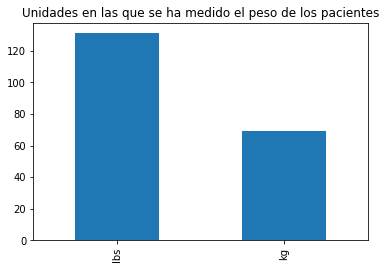

In [ ]:
data['WeightUnits'].value_counts().plot.bar(title="Unidades en las que se ha medido el peso de los pacientes")

Por tanto, tenemos dos tipos de unidades utilizadas a la hora de medir el peso de los pacientes, por lo que lo adecuado sería tener las mismas unidades para todos.

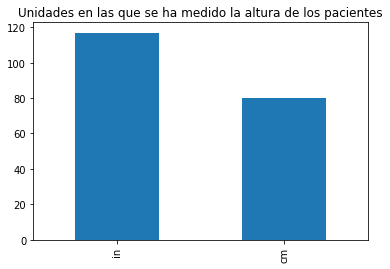

In [ ]:
data['HeightUnits'].value_counts().plot.bar(title="Unidades en las que se ha medido la altura de los pacientes")

De nuevo hay dos tipos de unidades para la medida de la altura, por lo que lo más adecuado sería tener la misma unidad para todos los pacientes

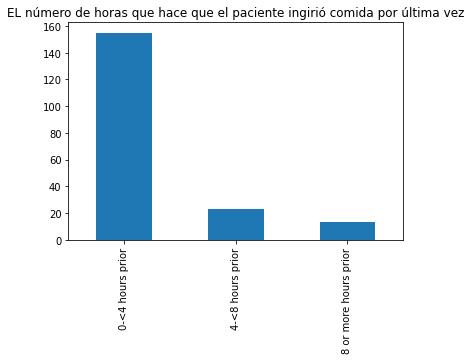

In [ ]:
data['LastFoodIntakeHrs'].value_counts().plot.bar(title="EL número de horas que hace que el paciente ingirió comida por última vez")

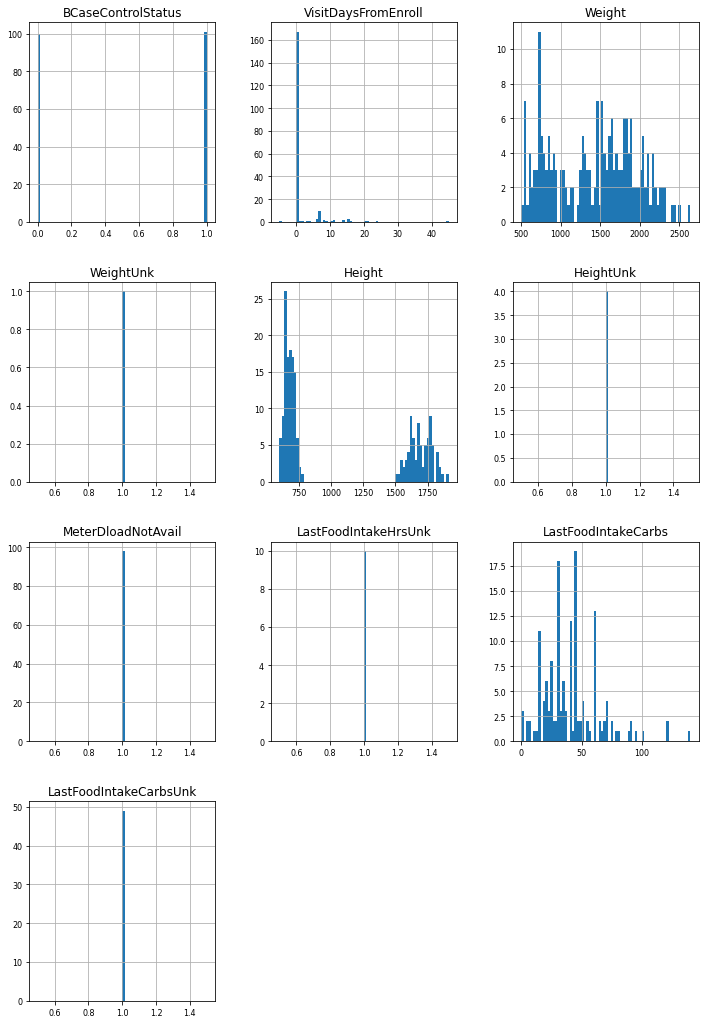

In [ ]:
# Histogram
data.hist(figsize=(12, 18), bins=70, xlabelsize=8, ylabelsize=8); 

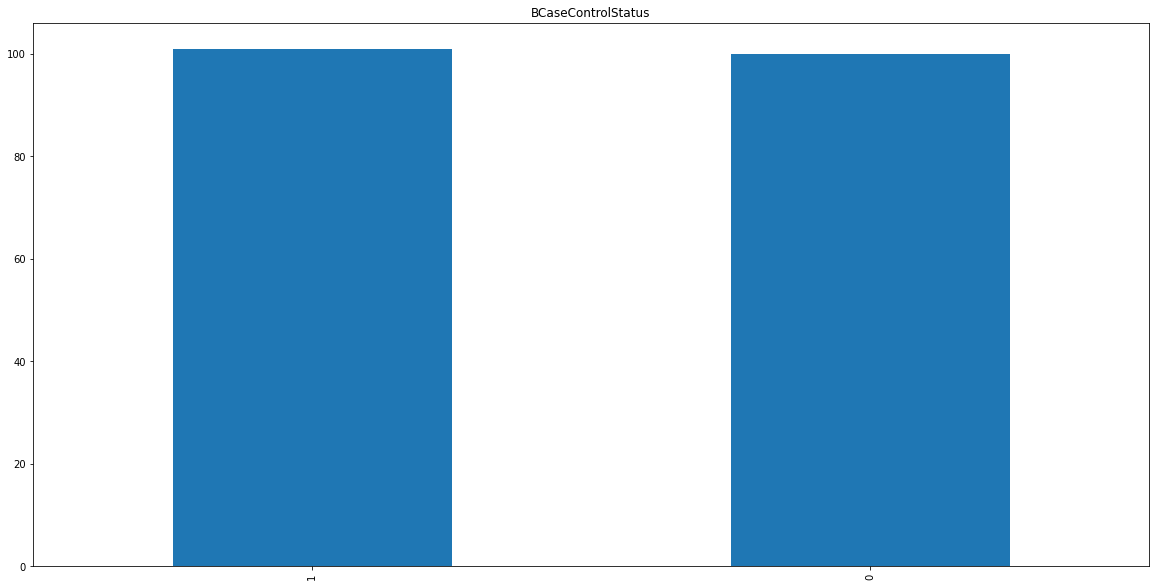

In [ ]:
data['BCaseControlStatus'].value_counts().plot.bar(title="BCaseControlStatus")

Vemos que el número de pacientes control y caso están balanceados

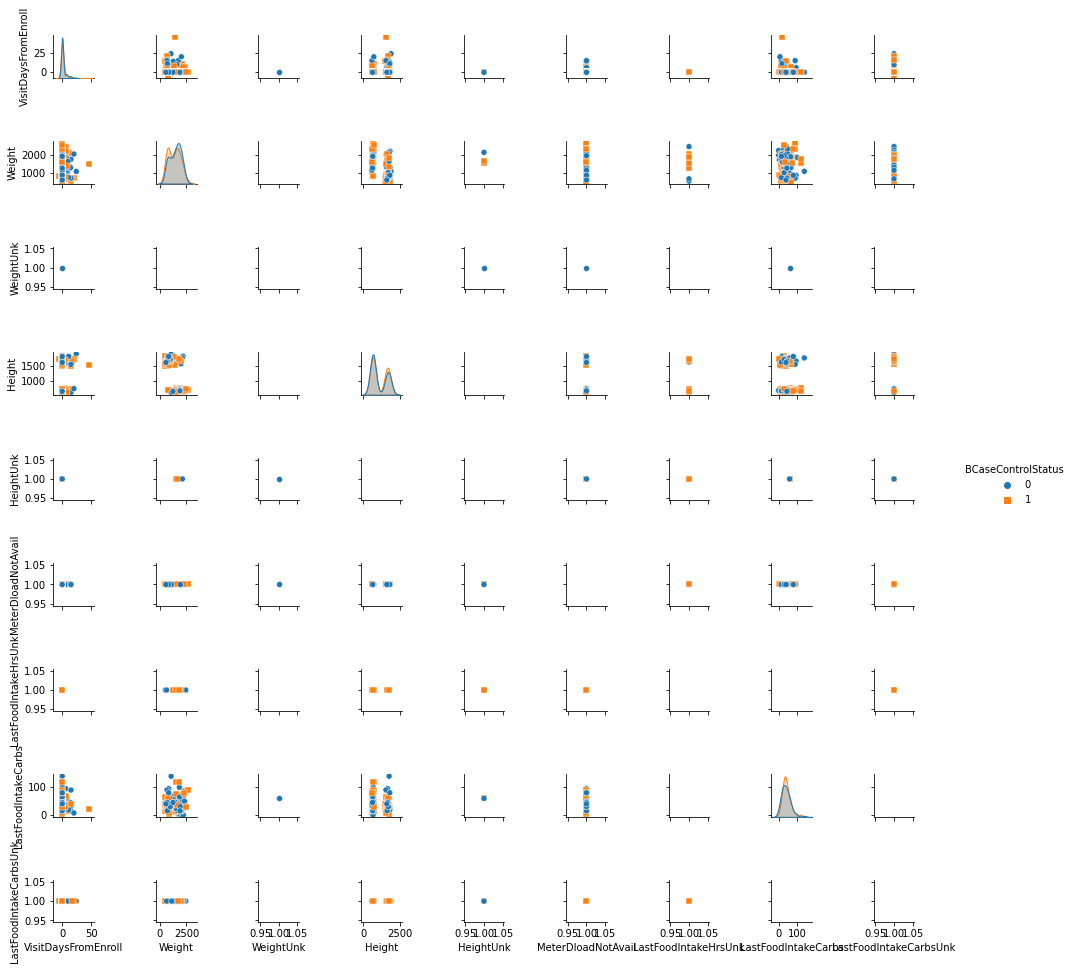

In [ ]:
sns.pairplot(data, hue = 'BCaseControlStatus', markers=["o", "s"], height=1.5)

BCaseControlStatus


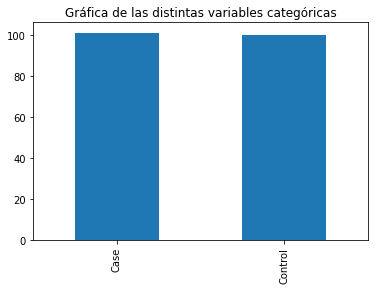

WeightUnits


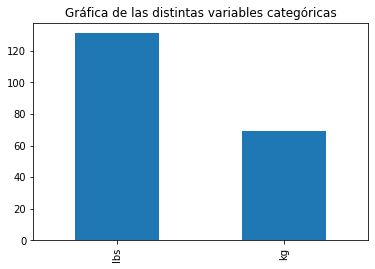

HeightUnits


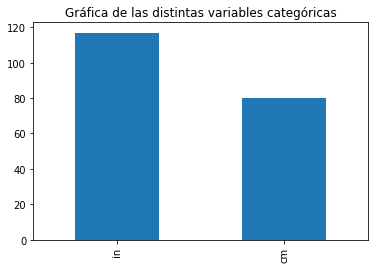

NumMeterCheckDayMeter


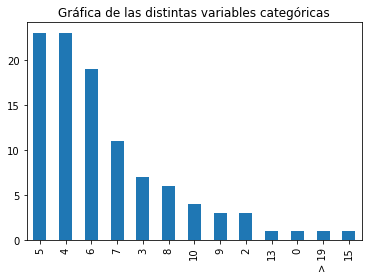

LastFoodIntakeHrs


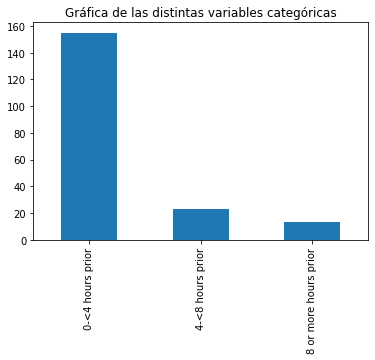

In [ ]:
for i in data:
  if data[i].dtypes=='object':
    data[i].value_counts().plot.bar(title='Gráfica de las distintas variables categóricas')
    print(i)
    plt.show()

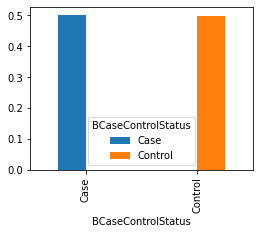

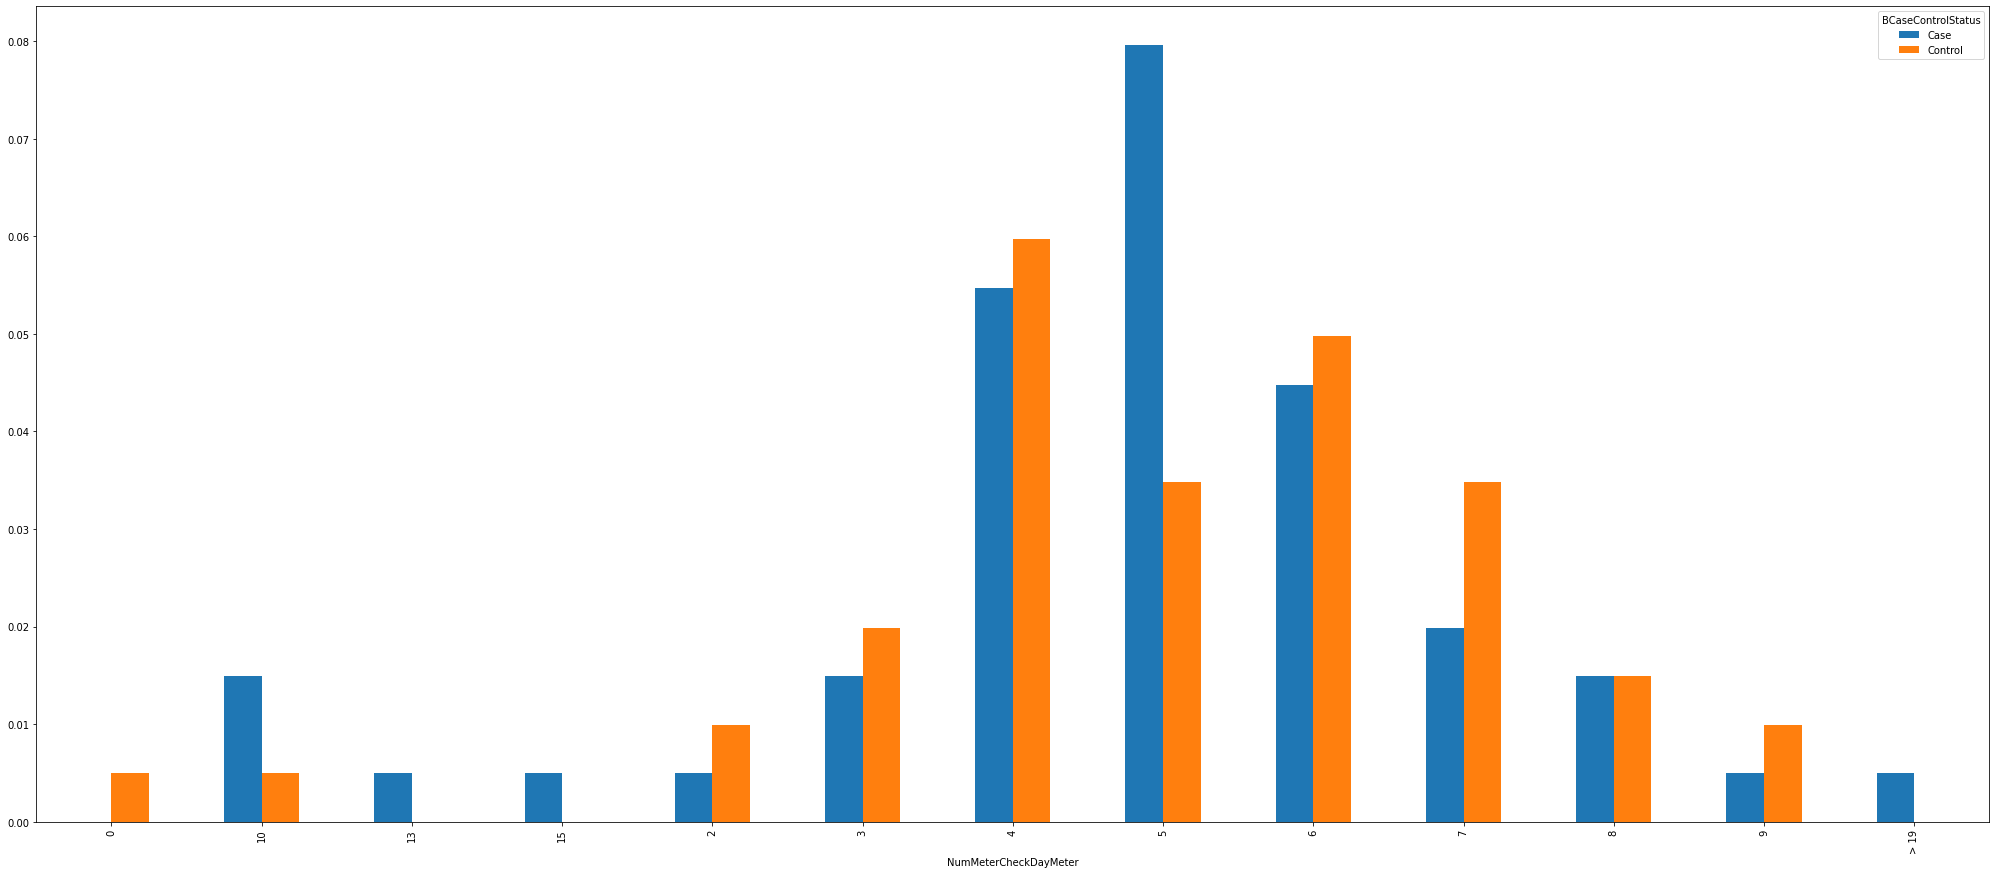

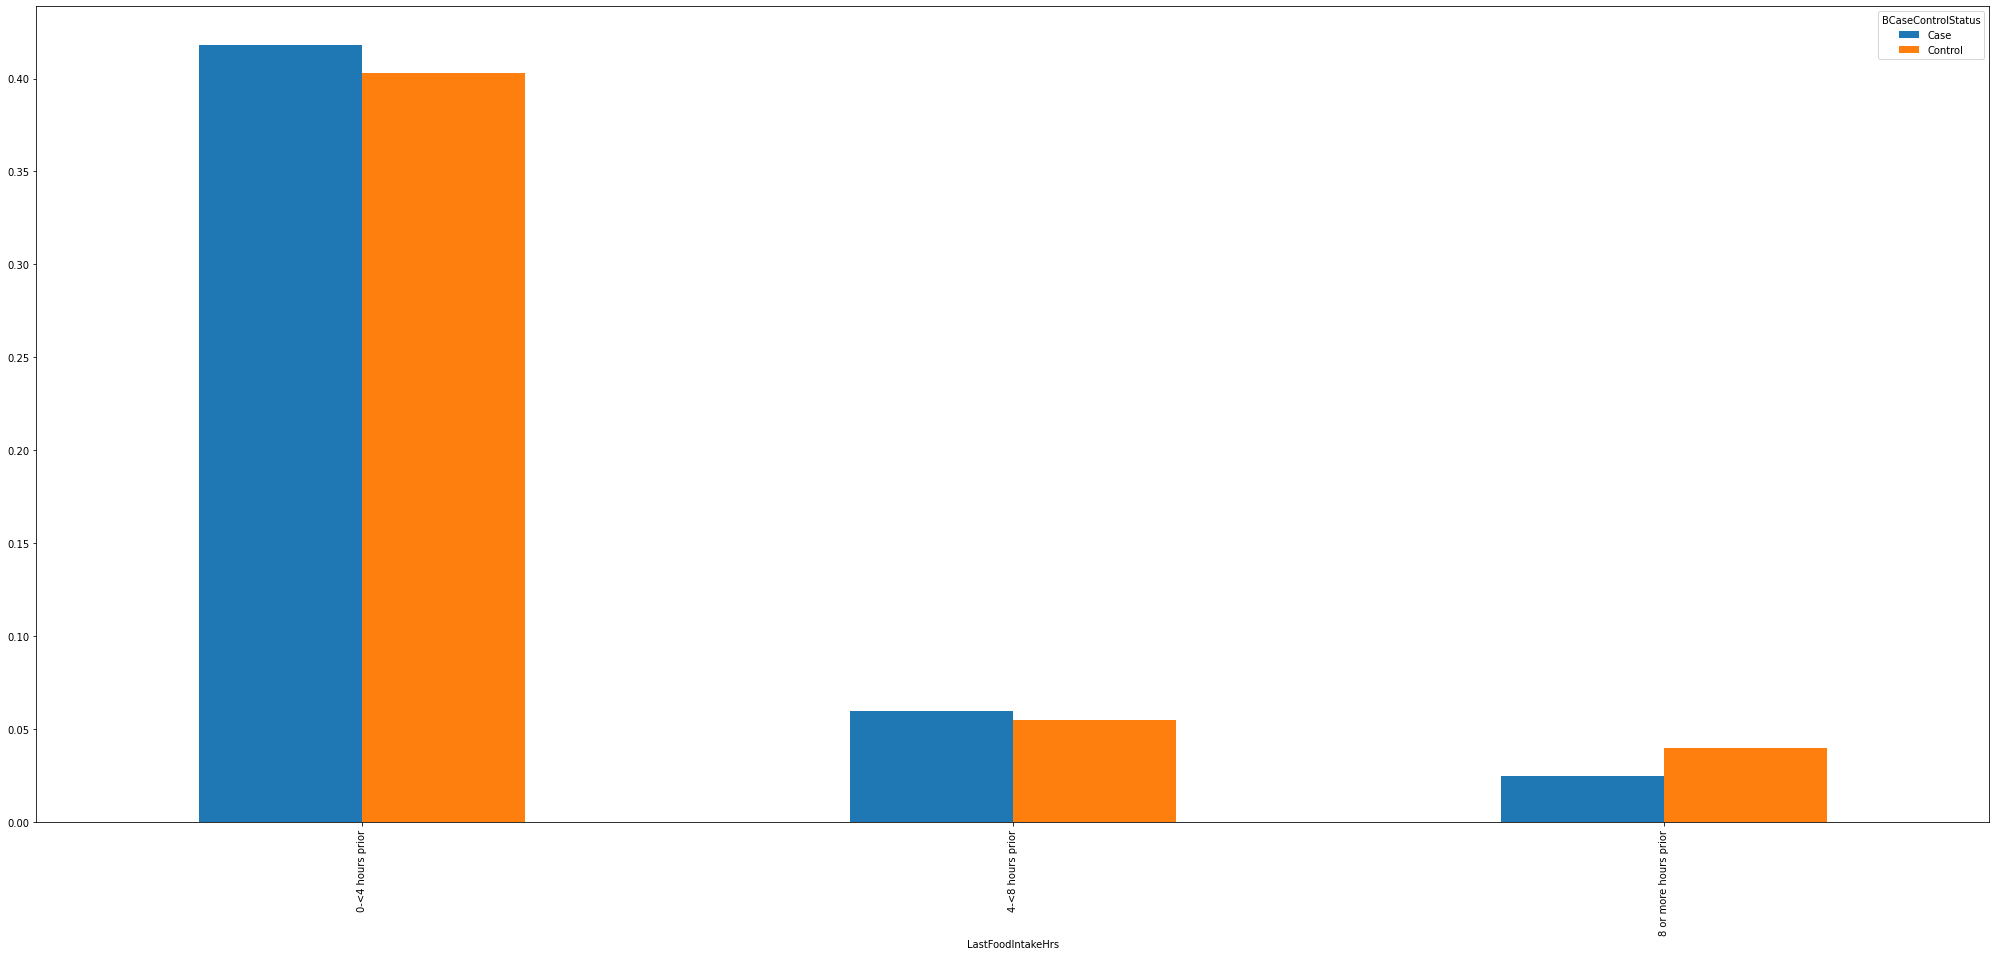

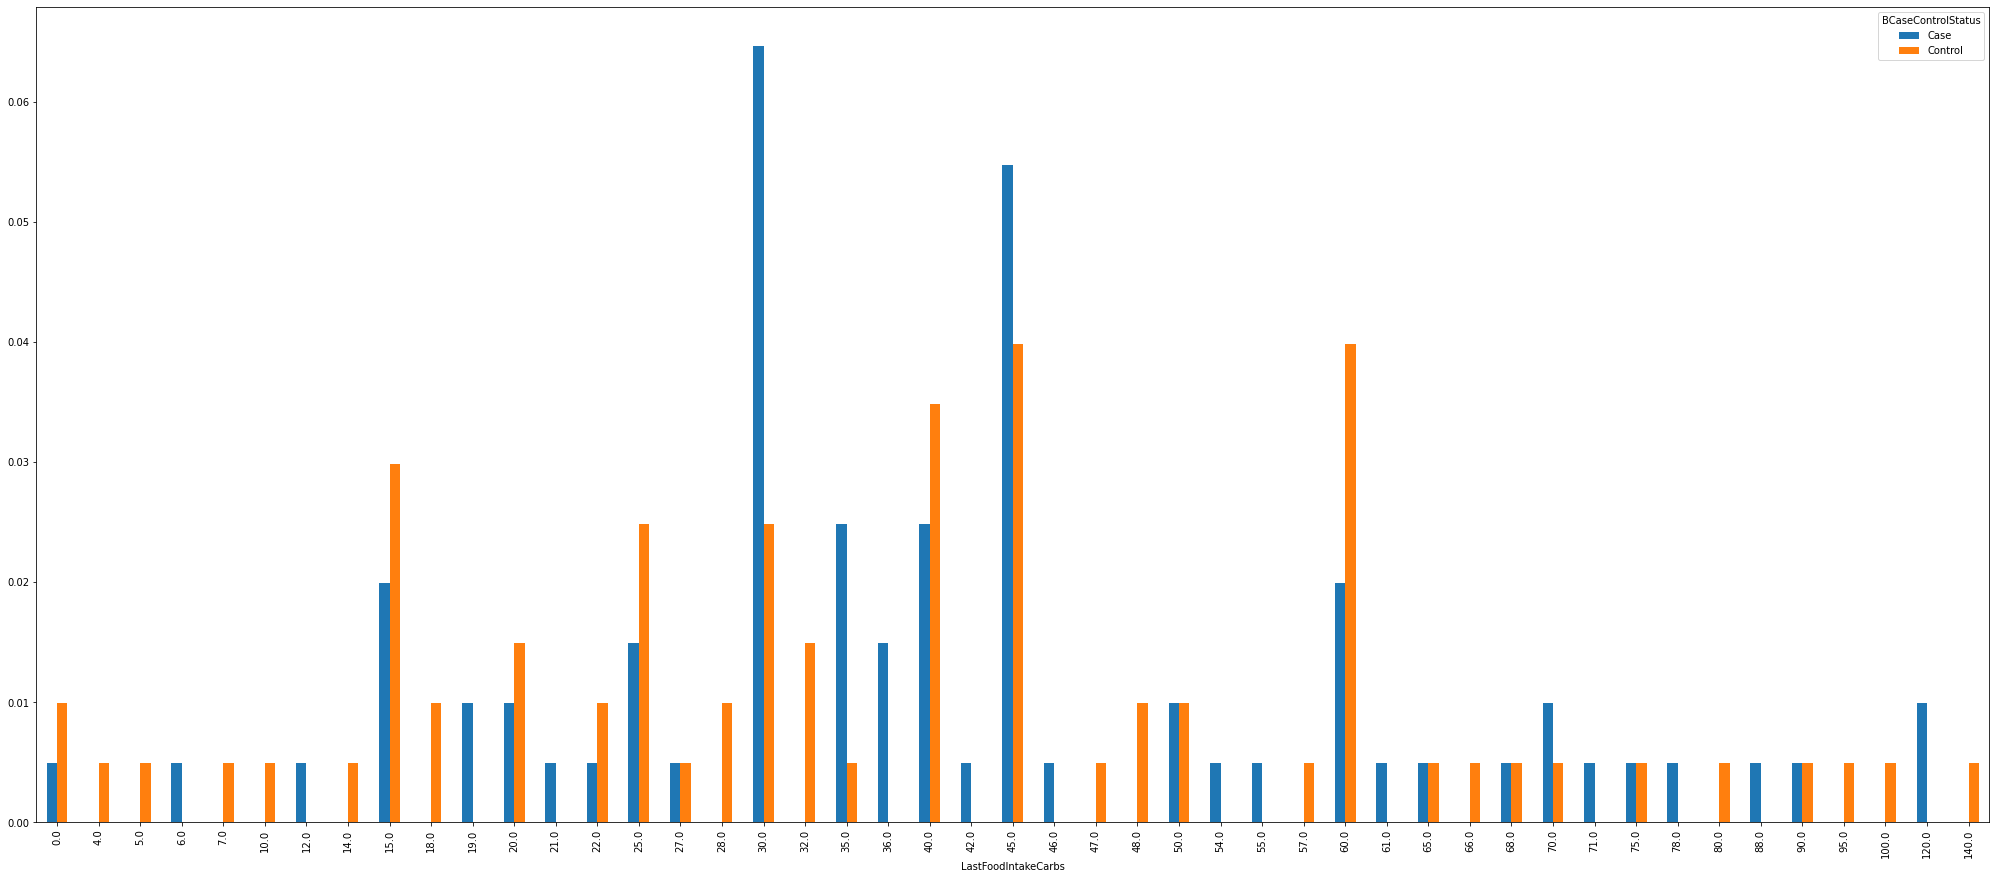

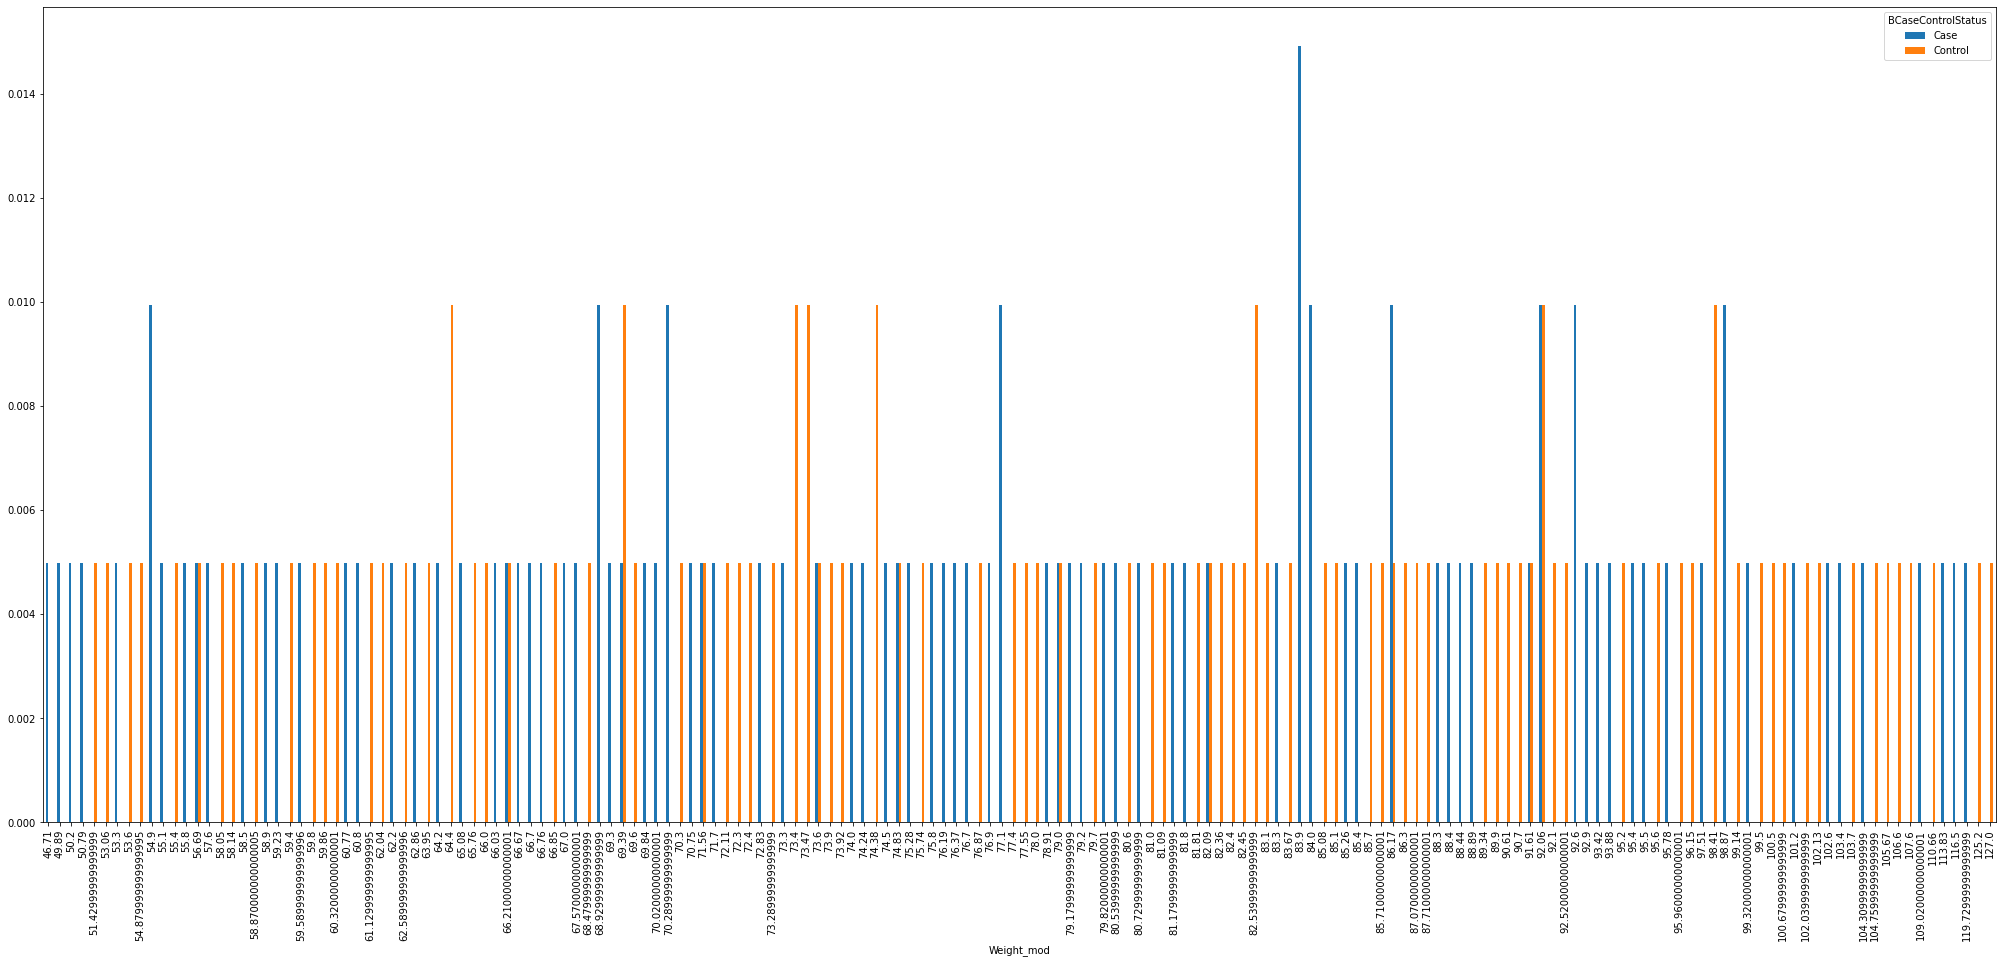

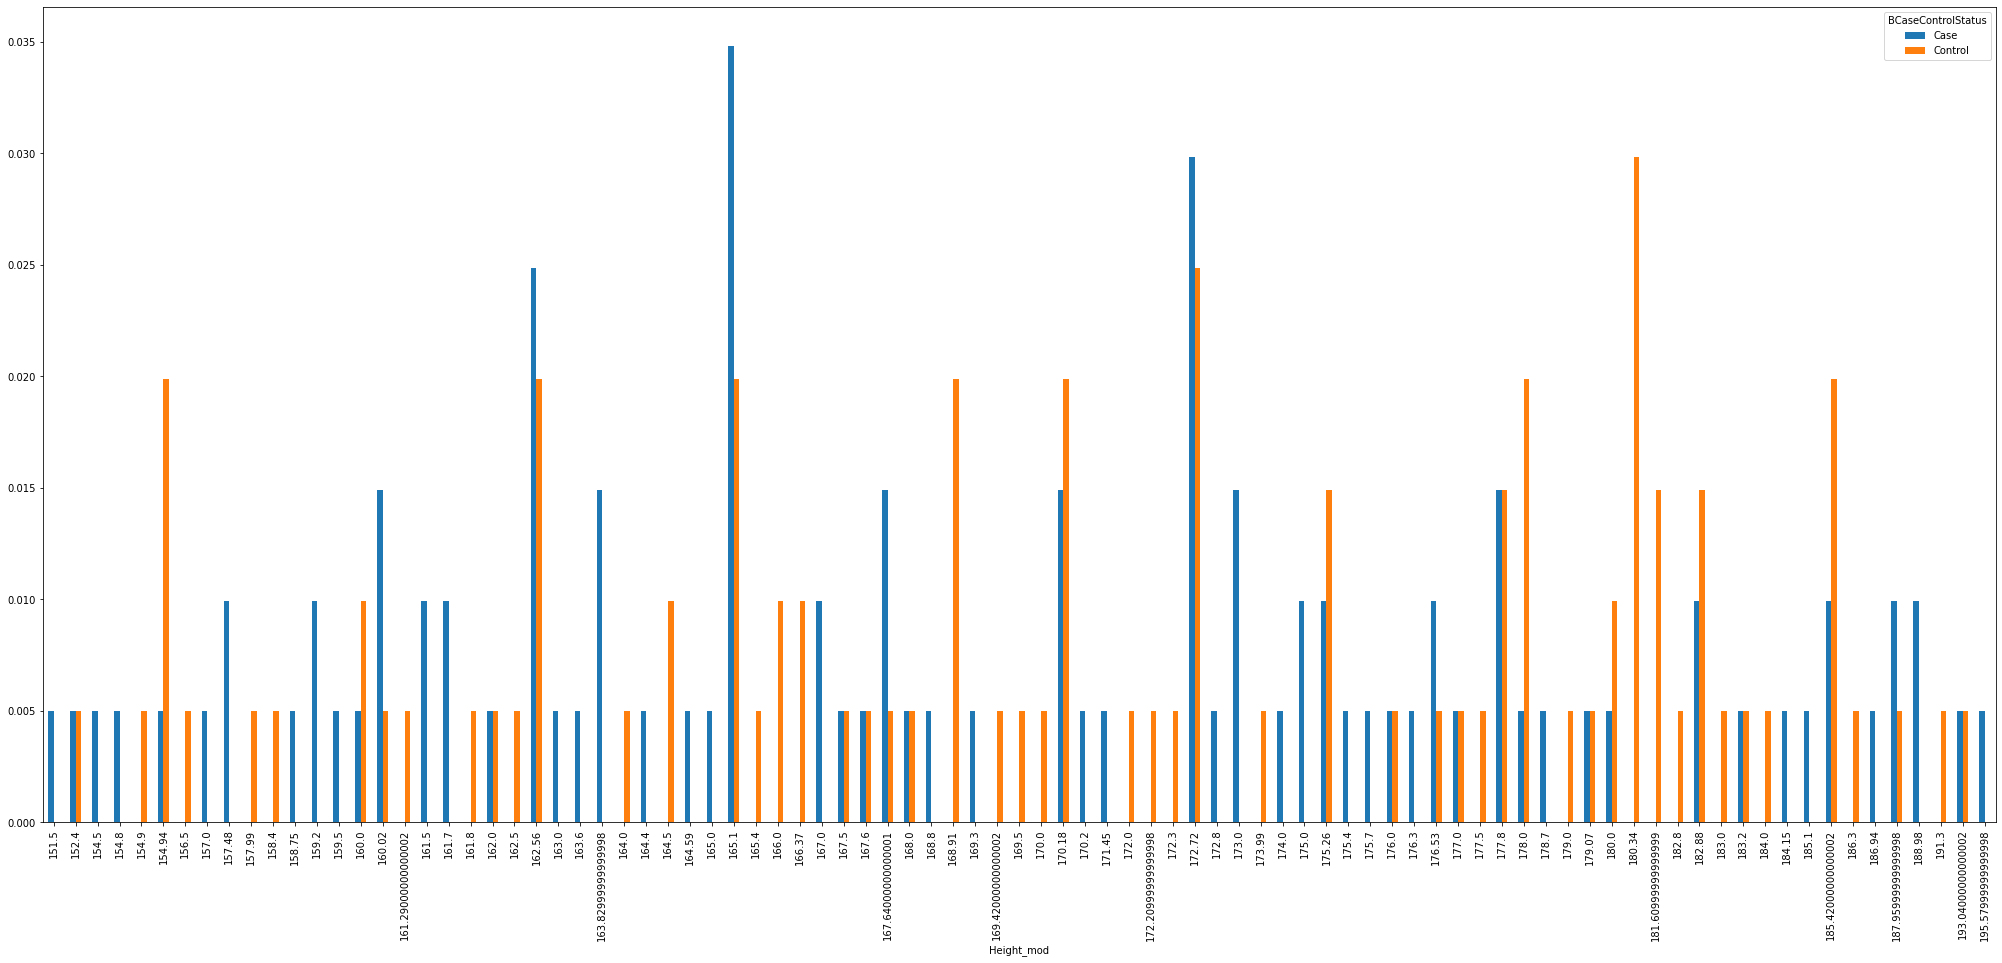

In [ ]:
for i in data:
  # if data[i].dtypes!='object':
  plot=pd.crosstab(index=data[i], columns=data['BCaseControlStatus']).apply(lambda r : r/data.shape[0], axis=1).plot(kind='bar')
  plt.rcParams["figure.figsize"] = (35, 15)

In [ ]:
  pd.crosstab(index=data['NumMeterCheckDayMeter'], columns=data['BCaseControlStatus']).apply(lambda r : r/data.shape[0], axis=1).plot(kind='bar')
  plt.rcParams["figure.figsize"] = (4, 3)
  plt.legend([],[], frameon=False)
  # plt.tight_layout()
  plt.xticks(rotation='horizontal')
  plt.xlabel('')
  # plt.set_xlabel('modelos')
  plt.savefig("NumMeterCheckDayMeter.pdf")
  plt.close()

# ***Preprocesado de datos***

In [21]:
data["NumMeterCheckDayMeter"] = data["NumMeterCheckDayMeter"].replace({'>':''}, regex=True)


In [22]:
data.dtypes

BCaseControlStatus          int64
VisitDaysFromEnroll         int64
Weight                    float64
WeightUnits                object
WeightUnk                 float64
Height                    float64
HeightUnits                object
HeightUnk                 float64
NumMeterCheckDayMeter      object
MeterDloadNotAvail        float64
LastFoodIntakeHrs          object
LastFoodIntakeHrsUnk      float64
LastFoodIntakeCarbs       float64
LastFoodIntakeCarbsUnk    float64
dtype: object

In [23]:
data['NumMeterCheckDayMeter']=data['NumMeterCheckDayMeter'].astype(str).astype(float)

In [24]:
data.dtypes

BCaseControlStatus          int64
VisitDaysFromEnroll         int64
Weight                    float64
WeightUnits                object
WeightUnk                 float64
Height                    float64
HeightUnits                object
HeightUnk                 float64
NumMeterCheckDayMeter     float64
MeterDloadNotAvail        float64
LastFoodIntakeHrs          object
LastFoodIntakeHrsUnk      float64
LastFoodIntakeCarbs       float64
LastFoodIntakeCarbsUnk    float64
dtype: object

A continuación, vamos a tratar las columnas de peso y altura para que todos los pacientes presenten las misma unidades de medida, para ello pasaremos los lbs a kg y los in a cm, de tal manera que reemplazaremos los kg por el número 1, los lbs por el número 2.205, y a continuación dividiremos la columna del peso por los valores de unidades sustituidos obteniendo así una columna con las unidades correspondiente. De igual manera, con la altura sustituyendo los cm por 1 y los in por 2.54 y en este caso multiplicaremos ambas columnas

In [25]:
data['WeightUnits']=data['WeightUnits'].replace(['kg'], 1).replace(['lbs'], 2.205)
data['HeightUnits']=data['HeightUnits'].replace(['cm'], 1).replace(['in'], 2.54)


In [26]:
data.head()

BCaseControlStatus  VisitDaysFromEnroll  Weight  WeightUnits  WeightUnk  \
0                   1                    7  1780.0        2.205        NaN   
1                   0                    0  1818.0        2.205        NaN   
2                   1                    0  2180.0        2.205        NaN   
3                   0                    0  2186.0        2.205        NaN   
4                   1                   11  2112.0        2.205        NaN   

   Height  HeightUnits  HeightUnk  NumMeterCheckDayMeter  MeterDloadNotAvail  \
0  1630.0         1.00        NaN                    NaN                 1.0   
1   710.0         2.54        NaN                    NaN                 1.0   
2   744.0         2.54        NaN                    NaN                 1.0   
3  1840.0         1.00        NaN                    NaN                 1.0   
4   744.0         2.54        NaN                    NaN                 1.0   

  LastFoodIntakeHrs  LastFoodIntakeHrsUnk  LastFoodIntakeCarbs  \
0  0-<4 hours prior                   NaN                 36.0   
1  0-<4 hours prior                   NaN                  NaN   
2  0-<4 hours prior                   NaN                  NaN   
3  0-<4 hours prior                   NaN                  NaN   
4  0-<4 hours prior                   NaN                  NaN   

   LastFoodIntakeCarbsUnk  
0                     NaN  
1                     1.0  
2                     1.0  
3                     1.0  
4                     1.0

In [27]:

data['Weight_mod']=data['Weight']/data['WeightUnits']

In [28]:
data.head()

BCaseControlStatus  VisitDaysFromEnroll  Weight  WeightUnits  WeightUnk  \
0                   1                    7  1780.0        2.205        NaN   
1                   0                    0  1818.0        2.205        NaN   
2                   1                    0  2180.0        2.205        NaN   
3                   0                    0  2186.0        2.205        NaN   
4                   1                   11  2112.0        2.205        NaN   

   Height  HeightUnits  HeightUnk  NumMeterCheckDayMeter  MeterDloadNotAvail  \
0  1630.0         1.00        NaN                    NaN                 1.0   
1   710.0         2.54        NaN                    NaN                 1.0   
2   744.0         2.54        NaN                    NaN                 1.0   
3  1840.0         1.00        NaN                    NaN                 1.0   
4   744.0         2.54        NaN                    NaN                 1.0   

  LastFoodIntakeHrs  LastFoodIntakeHrsUnk  LastFoodIntakeCarbs  \
0  0-<4 hours prior                   NaN                 36.0   
1  0-<4 hours prior                   NaN                  NaN   
2  0-<4 hours prior                   NaN                  NaN   
3  0-<4 hours prior                   NaN                  NaN   
4  0-<4 hours prior                   NaN                  NaN   

   LastFoodIntakeCarbsUnk  Weight_mod  
0                     NaN  807.256236  
1                     1.0  824.489796  
2                     1.0  988.662132  
3                     1.0  991.383220  
4                     1.0  957.823129

In [29]:
data['Height_mod']=data['Height']*data['HeightUnits']

In [30]:
data.head()

BCaseControlStatus  VisitDaysFromEnroll  Weight  WeightUnits  WeightUnk  \
0                   1                    7  1780.0        2.205        NaN   
1                   0                    0  1818.0        2.205        NaN   
2                   1                    0  2180.0        2.205        NaN   
3                   0                    0  2186.0        2.205        NaN   
4                   1                   11  2112.0        2.205        NaN   

   Height  HeightUnits  HeightUnk  NumMeterCheckDayMeter  MeterDloadNotAvail  \
0  1630.0         1.00        NaN                    NaN                 1.0   
1   710.0         2.54        NaN                    NaN                 1.0   
2   744.0         2.54        NaN                    NaN                 1.0   
3  1840.0         1.00        NaN                    NaN                 1.0   
4   744.0         2.54        NaN                    NaN                 1.0   

  LastFoodIntakeHrs  LastFoodIntakeHrsUnk  LastFoodIntakeCarbs  \
0  0-<4 hours prior                   NaN                 36.0   
1  0-<4 hours prior                   NaN                  NaN   
2  0-<4 hours prior                   NaN                  NaN   
3  0-<4 hours prior                   NaN                  NaN   
4  0-<4 hours prior                   NaN                  NaN   

   LastFoodIntakeCarbsUnk  Weight_mod  Height_mod  
0                     NaN  807.256236     1630.00  
1                     1.0  824.489796     1803.40  
2                     1.0  988.662132     1889.76  
3                     1.0  991.383220     1840.00  
4                     1.0  957.823129     1889.76

Una vez está todo en las mismas unidades, eliminaremos las columnas de Weight, WeightUnits, Height y HeightUnits

In [31]:
data.drop(['Weight'], axis=1, inplace=True)
data.drop(['WeightUnits'], axis=1, inplace=True)
data.drop(['Height'], axis=1, inplace=True)
data.drop(['HeightUnits'], axis=1, inplace=True)

In [32]:
data.head()

BCaseControlStatus  VisitDaysFromEnroll  WeightUnk  HeightUnk  \
0                   1                    7        NaN        NaN   
1                   0                    0        NaN        NaN   
2                   1                    0        NaN        NaN   
3                   0                    0        NaN        NaN   
4                   1                   11        NaN        NaN   

   NumMeterCheckDayMeter  MeterDloadNotAvail LastFoodIntakeHrs  \
0                    NaN                 1.0  0-<4 hours prior   
1                    NaN                 1.0  0-<4 hours prior   
2                    NaN                 1.0  0-<4 hours prior   
3                    NaN                 1.0  0-<4 hours prior   
4                    NaN                 1.0  0-<4 hours prior   

   LastFoodIntakeHrsUnk  LastFoodIntakeCarbs  LastFoodIntakeCarbsUnk  \
0                   NaN                 36.0                     NaN   
1                   NaN                  NaN                     1.0   
2                   NaN                  NaN                     1.0   
3                   NaN                  NaN                     1.0   
4                   NaN                  NaN                     1.0   

   Weight_mod  Height_mod  
0  807.256236     1630.00  
1  824.489796     1803.40  
2  988.662132     1889.76  
3  991.383220     1840.00  
4  957.823129     1889.76

In [33]:
data['Weight_mod']=round(data['Weight_mod'],1)
data['Height_mod']=round(data['Height_mod'],1)

In [34]:
data['Weight_mod']=data['Weight_mod']/10
data['Height_mod']=data['Height_mod']/10

In [35]:
data.head()

BCaseControlStatus  VisitDaysFromEnroll  WeightUnk  HeightUnk  \
0                   1                    7        NaN        NaN   
1                   0                    0        NaN        NaN   
2                   1                    0        NaN        NaN   
3                   0                    0        NaN        NaN   
4                   1                   11        NaN        NaN   

   NumMeterCheckDayMeter  MeterDloadNotAvail LastFoodIntakeHrs  \
0                    NaN                 1.0  0-<4 hours prior   
1                    NaN                 1.0  0-<4 hours prior   
2                    NaN                 1.0  0-<4 hours prior   
3                    NaN                 1.0  0-<4 hours prior   
4                    NaN                 1.0  0-<4 hours prior   

   LastFoodIntakeHrsUnk  LastFoodIntakeCarbs  LastFoodIntakeCarbsUnk  \
0                   NaN                 36.0                     NaN   
1                   NaN                  NaN                     1.0   
2                   NaN                  NaN                     1.0   
3                   NaN                  NaN                     1.0   
4                   NaN                  NaN                     1.0   

   Weight_mod  Height_mod  
0       80.73      163.00  
1       82.45      180.34  
2       98.87      188.98  
3       99.14      184.00  
4       95.78      188.98

In [36]:
data['Height_mod'].max()

195.57999999999998

# ***Valores perdidos***

In [ ]:
(data == 0).sum(axis=0)

BCaseControlStatus        100
VisitDaysFromEnroll       167
WeightUnk                   0
HeightUnk                   0
NumMeterCheckDayMeter       1
MeterDloadNotAvail          0
LastFoodIntakeHrs           0
LastFoodIntakeHrsUnk        0
LastFoodIntakeCarbs         3
LastFoodIntakeCarbsUnk      0
Weight_mod                  0
Height_mod                  0
dtype: int64

Los ceros que aparecen pueden tener sentido, ya que el paciente por ejemplo, ha podido consumir 0 carbohidratos antes de hacerse la prueba del c-péptido.

In [ ]:
data.isna().sum()

BCaseControlStatus          0
VisitDaysFromEnroll         0
WeightUnk                 200
HeightUnk                 197
NumMeterCheckDayMeter      98
MeterDloadNotAvail        103
LastFoodIntakeHrs          10
LastFoodIntakeHrsUnk      191
LastFoodIntakeCarbs        49
LastFoodIntakeCarbsUnk    152
Weight_mod                  1
Height_mod                  4
dtype: int64

In [ ]:
!pip install missingno




In [ ]:
import missingno as msno

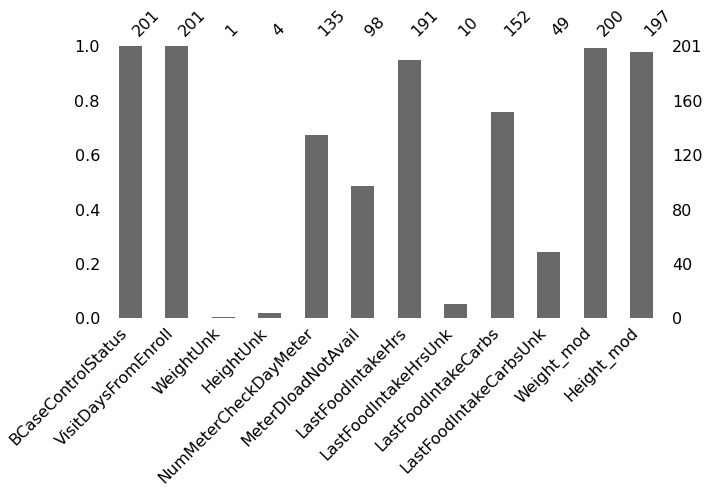

In [ ]:
msno.bar(data, figsize=(10,5))

Vemos que muchas de las variables prácticamente tienen valores nulos, y es justo en las variables acabadas en unk. Esto es porque la variable normal presenta los datos necesarios del paciente y la otra es para los pacientes que se desconoce su información, entonces lo más adecuado es eliminarlas, y que esos pacientes que desconocemos su información se queden con valores nulos en la variable normal, para que así luego puedan ser reemplazados por la media o moda, según el caso una vez que dividamos en entrenamiento y test.

In [37]:
data.drop(['WeightUnk'], axis=1, inplace=True)
data.drop(['HeightUnk'], axis=1, inplace=True)
data.drop(['MeterDloadNotAvail'], axis=1, inplace=True)
data.drop(['LastFoodIntakeHrsUnk'], axis=1, inplace=True)
data.drop(['LastFoodIntakeCarbsUnk'], axis=1, inplace=True)
data.drop(['VisitDaysFromEnroll'], axis=1, inplace=True)

In [38]:
data.isna().sum()

BCaseControlStatus        0
NumMeterCheckDayMeter    98
LastFoodIntakeHrs        10
LastFoodIntakeCarbs      49
Weight_mod                1
Height_mod                4
dtype: int64

Graficamos a continuación a partir de un mapa de color como se están comportando esos valores NaN en las distintas variables y pacientes:

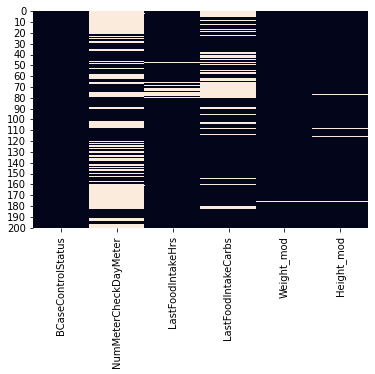

In [ ]:
import seaborn as sns

# Identificamos los missing values visualmente
sns.heatmap(data.isnull(), cbar=False)

In [ ]:
msno.bar(data)

NameError: ignored

In [ ]:
data.isna().sum()

BCaseControlStatus        0
NumMeterCheckDayMeter    98
LastFoodIntakeHrs        10
LastFoodIntakeCarbs      49
Weight_mod                1
Height_mod                4
dtype: int64

Vemos que aun así tenemos muchos valores perdidos en muchas de las variables, ya sea porque el paciente no se ha podido medir o porque no se ha podido realizar cierta prueba por algún error.

In [ ]:
data.head()

BCaseControlStatus  NumMeterCheckDayMeter LastFoodIntakeHrs  \
0                   1                    NaN  0-<4 hours prior   
1                   0                    NaN  0-<4 hours prior   
2                   1                    NaN  0-<4 hours prior   
3                   0                    NaN  0-<4 hours prior   
4                   1                    NaN  0-<4 hours prior   

   LastFoodIntakeCarbs  Weight_mod  Height_mod  
0                 36.0       80.73      163.00  
1                  NaN       82.45      180.34  
2                  NaN       98.87      188.98  
3                  NaN       99.14      184.00  
4                  NaN       95.78      188.98

# ***Outliers***

Para ver si la base de datos presenta o no outliers, me ayudaré a partir de la visualización de los diagramas de cajas:

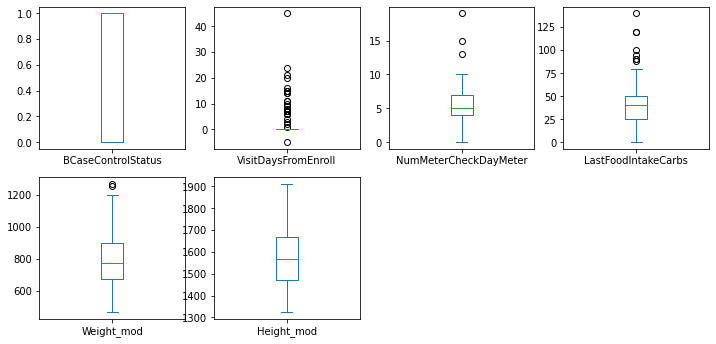

In [ ]:
data.plot(kind='box',subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

A la vista de los resultados, podemos concluir que los valores atípicos que aparece podrían ser realmente puntuaciones obtenidas por los pacientes, y sernos de utilidad a la hora del diseño del modelo.

# ***Matriz de correlación***

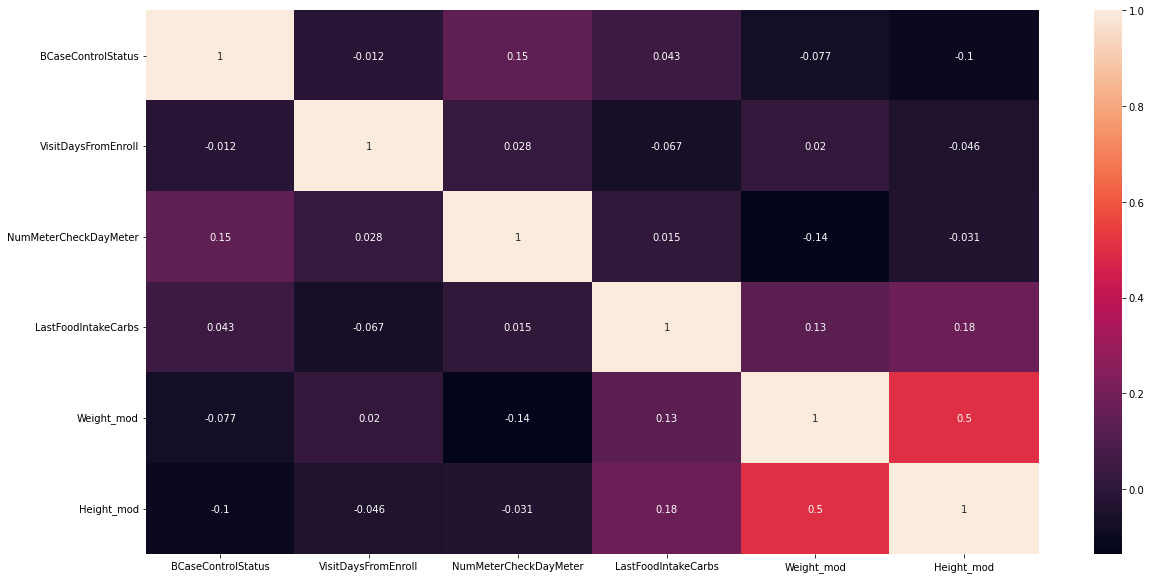

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# ***División en train y test***

# ***Validación cruzada***

In [40]:
from statistics import mode
from sklearn.impute import SimpleImputer

# from statistics import multimode

data["LastFoodIntakeHrs"].replace(np.nan, mode(data["LastFoodIntakeHrs"]), inplace=True)
# data["NumMeterCheckDayMeter"].replace(np.nan, mode(data["NumMeterCheckDayMeter"]), inplace=True)



In [ ]:

data["NumMeterCheckDayMeter"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
196      5
197      4
198    NaN
199    NaN
200    NaN
Name: NumMeterCheckDayMeter, Length: 201, dtype: object

In [45]:
data["NumMeterCheckDayMeter"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
196    5.0
197    4.0
198    NaN
199    NaN
200    NaN
Name: NumMeterCheckDayMeter, Length: 201, dtype: float64

Entonces, a continuación, aplicamos one-hot encoding:

In [47]:
from sklearn.preprocessing import OneHotEncoder

def var_categ(variable):
  global data
  enc = OneHotEncoder(handle_unknown='ignore')
  enc_data = pd.DataFrame(enc.fit_transform(data[[variable]]).toarray())
  data[variable].value_counts() # Identifity categories
  enc_data.describe()
  #Solo incluye categorías que tengan datos
  #aunque no tengan datos
  data = pd.concat([data,pd.get_dummies(data[variable], prefix=variable)],axis=1)

In [48]:
var_categ("LastFoodIntakeHrs")

In [49]:
data.head()

BCaseControlStatus  NumMeterCheckDayMeter LastFoodIntakeHrs  \
0                   1                    NaN  0-<4 hours prior   
1                   0                    NaN  0-<4 hours prior   
2                   1                    NaN  0-<4 hours prior   
3                   0                    NaN  0-<4 hours prior   
4                   1                    NaN  0-<4 hours prior   

   LastFoodIntakeCarbs  Weight_mod  Height_mod  \
0                 36.0       80.73      163.00   
1                  NaN       82.45      180.34   
2                  NaN       98.87      188.98   
3                  NaN       99.14      184.00   
4                  NaN       95.78      188.98   

   LastFoodIntakeHrs_0-<4 hours prior  LastFoodIntakeHrs_4-<8 hours prior  \
0                                   1                                   0   
1                                   1                                   0   
2                                   1                                   0   
3                                   1                                   0   
4                                   1                                   0   

   LastFoodIntakeHrs_8 or more hours prior  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0

In [50]:
data.drop(['LastFoodIntakeHrs'], axis=1, inplace=True)


In [51]:
data.head()

BCaseControlStatus  NumMeterCheckDayMeter  LastFoodIntakeCarbs  Weight_mod  \
0                   1                    NaN                 36.0       80.73   
1                   0                    NaN                  NaN       82.45   
2                   1                    NaN                  NaN       98.87   
3                   0                    NaN                  NaN       99.14   
4                   1                    NaN                  NaN       95.78   

   Height_mod  LastFoodIntakeHrs_0-<4 hours prior  \
0      163.00                                   1   
1      180.34                                   1   
2      188.98                                   1   
3      184.00                                   1   
4      188.98                                   1   

   LastFoodIntakeHrs_4-<8 hours prior  LastFoodIntakeHrs_8 or more hours prior  
0                                   0                                        0  
1                                   0                                        0  
2                                   0                                        0  
3                                   0                                        0  
4                                   0                                        0

In [52]:
data

BCaseControlStatus  NumMeterCheckDayMeter  LastFoodIntakeCarbs  \
0                     1                    NaN                 36.0   
1                     0                    NaN                  NaN   
2                     1                    NaN                  NaN   
3                     0                    NaN                  NaN   
4                     1                    NaN                  NaN   
..                  ...                    ...                  ...   
196                   1                    5.0                 30.0   
197                   0                    4.0                 45.0   
198                   0                    NaN                 45.0   
199                   0                    NaN                 80.0   
200                   0                    NaN                 40.0   

     Weight_mod  Height_mod  LastFoodIntakeHrs_0-<4 hours prior  \
0         80.73      163.00                                   1   
1         82.45      180.34                                   1   
2         98.87      188.98                                   1   
3         99.14      184.00                                   1   
4         95.78      188.98                                   1   
..          ...         ...                                 ...   
196      113.83      185.42                                   1   
197       56.69      165.10                                   1   
198       70.30      167.60                                   1   
199       85.70      182.80                                   1   
200       59.40      162.50                                   1   

     LastFoodIntakeHrs_4-<8 hours prior  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
..                                  ...   
196                                   0   
197                                   0   
198                                   0   
199                                   0   
200                                   0   

     LastFoodIntakeHrs_8 or more hours prior  
0                                          0  
1                                          0  
2                                          0  
3                                          0  
4                                          0  
..                                       ...  
196                                        0  
197                                        0  
198                                        0  
199                                        0  
200                                        0  

[201 rows x 8 columns]

Ahora, ya volvemos a dividir en entrenamiento y test:

In [54]:
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y= data["BCaseControlStatus"]

X.shape, Y.shape

((201, 7), (201,))

In [55]:
X.columns

Index(['NumMeterCheckDayMeter', 'LastFoodIntakeCarbs', 'Weight_mod',
       'Height_mod', 'LastFoodIntakeHrs_0-<4 hours prior',
       'LastFoodIntakeHrs_4-<8 hours prior',
       'LastFoodIntakeHrs_8 or more hours prior'],
      dtype='object')

In [56]:
from sklearn.svm import SVC

In [148]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

def regresion_logistica(X_train, X_test, Y_train, Y_test,semilla):
  logreg= LogisticRegression(solver='liblinear',random_state=semilla)
  parameters = {"C":[1e-8,1e-7,1e-6,1e-5,1e-4,1,10,20, 30,40,50,100],"penalty":["l1"]}# l1 lasso l2 ridge
  valor_C=np.array([1e-8,1e-4,1,10,20,30,40,50,100])
  log_regression=GridSearchCV(logreg, parameters, scoring='accuracy', cv=5, return_train_score=True)

  log_regression.fit(X_train, Y_train) #Entrenamos

  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
  roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])


# 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
  log_regression.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  regre_clasif = log_regression.best_estimator_
  modelo_regresion = regre_clasif.fit(X_train, Y_train)

  y_output_regresion = modelo_regresion.predict(X_test)
  print(accuracy_score(Y_test, y_output_regresion))
  print(confusion_matrix(Y_test, y_output_regresion))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_regresion).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_regresion)
  Accuracy = accuracy_score(Y_test, y_output_regresion)
  Precision=precision_score(Y_test, y_output_regresion)
  f1=f1_score(Y_test, y_output_regresion)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_regresion)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)




In [58]:
from sklearn.tree import DecisionTreeClassifier
# Comenzamos importando los paquetes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.neural_network import MLPRegressor

def decisionTree(X_train, X_test, Y_train, Y_test,semilla):

  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,8), 'min_samples_leaf': range(5,50)}
  profundidad_grid = np.array(range(1,8))

  # X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2, random_state=2)
  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=semilla), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
  grid_arbol_clasif.fit(X_train, Y_train)
  print(grid_arbol_clasif.best_params_)

  # perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  # perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  # plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  # plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  # plt.xlabel('Profundidad',fontsize=14)
  # plt.ylabel('ROC-AUC',fontsize=14)
  # plt.legend()
  # plt.show()

  print("Mejor ROC-AUC en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))

  # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
  grid_arbol_clasif.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  Arbol_clasif_all = grid_arbol_clasif.best_estimator_
  modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)

  y_output_arbol = modelo_arbol_clasif.predict(X_test)
  print(accuracy_score(Y_test, y_output_arbol))
  print(confusion_matrix(Y_test, y_output_arbol))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_arbol).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_arbol)
  Accuracy = accuracy_score(Y_test, y_output_arbol)
  Precision=precision_score(Y_test, y_output_arbol)
  f1=f1_score(Y_test, y_output_arbol)
  print("Sensibilidad, Accuracy, Especifididad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [59]:
def knn (X_train,X_test,Y_train,Y_test):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid = param_grid, scoring = 'accuracy', cv=3, return_train_score=True)
  grid_knn.fit(X_train, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel('roc_auc',fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

  # 2. Consulta de los valores de los hiper-parámetros utilizados en la creación del árbol
  grid_knn.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  kNN_clasif_all = grid_knn.best_estimator_
  modelo_knn_clasif2 = kNN_clasif_all.fit(X_train, Y_train)

  y_output_knn2 = modelo_knn_clasif2.predict(X_test)
  print(accuracy_score(Y_test, y_output_knn2))
  print(confusion_matrix(Y_test, y_output_knn2))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_knn2).ravel()
  Especificidad = tn / (tn + fp)

  Recall= recall_score(Y_test, y_output_knn2)
  Accuracy = accuracy_score(Y_test, y_output_knn2)
  Precision=precision_score(Y_test, y_output_knn2)
  f1=f1_score(Y_test, y_output_knn2)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],
           'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [60]:
def svc (X_train,X_test,Y_train,Y_test,semilla):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
  svc=SVC(decision_function_shape='ovo',random_state=semilla)
  parameters = {'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

  svc=GridSearchCV(svc, parameters, scoring='accuracy', cv=5, return_train_score=True)

  svc.fit(X_train, Y_train) #Entrenamos

  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
  roc_svc_val = np.array(svc.cv_results_['mean_test_score'])

  # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))

  # 2. Consulta de los valores de los hiper-parámetros 
  svc.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  svc_classif = svc.best_estimator_
  modelo_svc = svc_classif.fit(X_train, Y_train)

  y_output_svc = modelo_svc.predict(X_test)
  print(accuracy_score(Y_test, y_output_svc))
  print(confusion_matrix(Y_test, y_output_svc))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_svc)
  Accuracy = accuracy_score(Y_test, y_output_svc)
  Precision=precision_score(Y_test, y_output_svc)
  f1=f1_score(Y_test, y_output_svc)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [61]:
def svc_lineal (X_train,X_test,Y_train,Y_test,semilla):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 
  svc=SVC(decision_function_shape='ovo',random_state=semilla)
  parameters = {'kernel': ['linear'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                      'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

  svc=GridSearchCV(svc, parameters, scoring='accuracy', cv=5, return_train_score=True)

  svc.fit(X_train, Y_train) #Entrenamos

  # #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  roc_svc_train = np.array(svc.cv_results_['mean_train_score']) 
  roc_svc_val = np.array(svc.cv_results_['mean_test_score'])

  # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))

  # 2. Consulta de los valores de los hiper-parámetros 
  svc.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  svc_classif = svc.best_estimator_
  modelo_svc = svc_classif.fit(X_train, Y_train)

  y_output_svc = modelo_svc.predict(X_test)
  print(accuracy_score(Y_test, y_output_svc))
  print(confusion_matrix(Y_test, y_output_svc))
  tn, fp, fn, tp = confusion_matrix(Y_test, y_output_svc).ravel()
  Especificidad = tn / (tn + fp)
  Recall= recall_score(Y_test, y_output_svc)
  Accuracy = accuracy_score(Y_test, y_output_svc)
  Precision=precision_score(Y_test, y_output_svc)
  f1=f1_score(Y_test, y_output_svc)
  print("Sensibilidad, Accuracy, Especificidad, f1-score",Recall, Accuracy,Especificidad,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_svc)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Especificidad, f1, roc_auc)

In [62]:
from sklearn.neural_network import MLPClassifier

# 1. Extracción de las dos características de interés para realizar el diseño
def MLP(X_train,X_test,Y_train,Y_test,semilla):

  # 4. Configuración del MLP
  param_grid = {'hidden_layer_sizes': range(2,152,10)}
  neuronas_ocultas_grid = np.array(range(2,152,10))

  grid_MLP = GridSearchCV(MLPClassifier(max_iter = 10000, random_state=semilla, activation='tanh'), param_grid = param_grid, scoring = 'accuracy', cv=5, return_train_score=True)
  grid_MLP.fit(X_train, Y_train)


  acc_MLP_train = np.array(grid_MLP.cv_results_['mean_train_score'])
  acc_MLP_val = np.array(grid_MLP.cv_results_['mean_test_score'])
    # Mostramos el mejor valor del parámetro y el score
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_MLP.best_params_))
  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_MLP.best_score_))
        
  # 2. Consulta de los valores de los hiper-parámetros 
  grid_MLP.get_params()

  # 3. Se entrena el modelo con los mejores valores de los hiperparámetros y se obtienen las prestaciones en la partición de test
  MLP_classif = grid_MLP.best_estimator_
  modelo_MLP = MLP_classif.fit(X_train, Y_train)

  y_output_mlp = modelo_MLP.predict(X_test)
  print(accuracy_score(Y_test, y_output_mlp))
  print(confusion_matrix(Y_test, y_output_mlp))

  Recall= recall_score(Y_test, y_output_mlp)
  Accuracy = accuracy_score(Y_test, y_output_mlp)
  Precision=precision_score(Y_test, y_output_mlp)
  f1=f1_score(Y_test, y_output_mlp)
  print("Sensibilidad, Accuracy, precision, f1-score",Recall, Accuracy,Precision,f1)

  fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_mlp)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return (Recall, Accuracy, Precision, f1, roc_auc)      


In [128]:
list_x_train = []
list_y_train = []
list_x_test = []
list_y_test = []

#LISTAS PARA STANDARD SCALER
recall_reg_std = []
accuracy_reg_std = []
precision_reg_std=[]
f1_reg_std=[]
roc_reg_std= []

recall_arbol_std = []
accuracy_arbol_std = []
precision_arbol_std=[]
f1_arbol_std=[]
roc_arbol_std= []

recall_knn_std = []
accuracy_knn_std = []
precision_knn_std=[]
f1_knn_std=[]
roc_knn_std= []

recall_svc_std = []
accuracy_svc_std = []
precision_svc_std=[]
f1_svc_std=[]
roc_svc_std= []

recall_svc_lin_std = []
accuracy_svc_lin_std = []
precision_svc_lin_std=[]
f1_svc_lin_std=[]
roc_svc_lin_std= []

#LISTAS PARA MIN-MAX

recall_reg_scaler = []
accuracy_reg_scaler = []
precision_reg_scaler=[]
f1_reg_scaler=[]
roc_reg_scaler= []

recall_arbol_scaler = []
accuracy_arbol_scaler = []
precision_arbol_scaler=[]
f1_arbol_scaler=[]
roc_arbol_scaler= []

recall_knn_scaler = []
accuracy_knn_scaler = []
precision_knn_scaler=[]
f1_knn_scaler=[]
roc_knn_scaler= []

recall_svc_scaler = []
accuracy_svc_scaler = []
precision_svc_scaler=[]
f1_svc_scaler=[]
roc_svc_scaler= []

recall_svc_lin_scaler = []
accuracy_svc_lin_scaler = []
precision_svc_lin_scaler=[]
f1_svc_lin_scaler=[]
roc_svc_lin_scaler= []

recall_mlp_lin_scaler = []
accuracy_mlp_lin_scaler = []
precision_mlp_lin_scaler=[]
f1_mlp_lin_scaler=[]
roc_mlp_lin_scaler= []

for i in range(0, 5):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify= Y, test_size=0.2, random_state=i)
  print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

  list_x_train.append(X_train)
  list_y_train.append(Y_train)
  list_y_test.append(Y_test)
  list_x_test.append(X_test)

  


(160, 7) (160,) (41, 7) (41,)
(160, 7) (160,) (41, 7) (41,)
(160, 7) (160,) (41, 7) (41,)
(160, 7) (160,) (41, 7) (41,)
(160, 7) (160,) (41, 7) (41,)


# ***PRIMERA PARTICIÓN***

In [129]:
X_train_0=list_x_train[0]
Y_train_0=list_y_train[0]
X_test_0=list_x_test[0]
Y_test_0=list_y_test[0]

In [130]:
X_train_0

NumMeterCheckDayMeter  LastFoodIntakeCarbs  Weight_mod  Height_mod  \
26                     NaN                 60.0      102.13      175.26   
1                      NaN                  NaN       82.45      180.34   
162                    NaN                 40.0       59.80      165.40   
25                     4.0                 35.0       81.81      176.53   
94                     5.0                 19.0       49.89      160.02   
..                     ...                  ...         ...         ...   
53                     NaN                 25.0       90.70      158.40   
115                    6.0                100.0       83.67      177.80   
178                    NaN                 30.0       99.50      172.30   
99                     7.0                  5.0       75.74      162.56   
119                    5.0                 15.0       62.86      158.75   

     LastFoodIntakeHrs_0-<4 hours prior  LastFoodIntakeHrs_4-<8 hours prior  \
26                                    0                                   1   
1                                     1                                   0   
162                                   1                                   0   
25                                    1                                   0   
94                                    1                                   0   
..                                  ...                                 ...   
53                                    0                                   1   
115                                   0                                   1   
178                                   1                                   0   
99                                    1                                   0   
119                                   1                                   0   

     LastFoodIntakeHrs_8 or more hours prior  
26                                         0  
1                                          0  
162                                        0  
25                                         0  
94                                         0  
..                                       ...  
53                                         0  
115                                        0  
178                                        0  
99                                         0  
119                                        0  

[160 rows x 7 columns]

In [131]:
X_train_0.isna().sum()

NumMeterCheckDayMeter                      80
LastFoodIntakeCarbs                        38
Weight_mod                                  1
Height_mod                                  4
LastFoodIntakeHrs_0-<4 hours prior          0
LastFoodIntakeHrs_4-<8 hours prior          0
LastFoodIntakeHrs_8 or more hours prior     0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [132]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_0, Y_train_0, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [133]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=1, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_0)

# transform the dataset
X_train_0 = imputer.transform(X_train_0)

# print total missing
print('Missing: %d' % sum(isnan(X_train_0).flatten()))

X_test_0=imputer.transform(X_test_0)
print('Missing: %d' % sum(isnan(X_test_0).flatten()))


Missing: 0
Missing: 0


In [134]:
X_train_numerical0=X_train_0[:,:4]
X_train_categorical0=X_train_0[:,4:]
X_test_numerical0=X_test_0[:,:4]
X_test_categorical0=X_test_0[:,4:]

In [135]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical0)
X_std_train_numerical = std_all.transform(X_train_numerical0) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical0)

In [136]:
X_train_std_all0=np.c_[X_std_train_numerical,X_train_categorical0]
X_test_std_all0=np.c_[X_std_test_numerical,X_test_categorical0]


In [137]:
X_train_std_all0.shape

(160, 7)

In [138]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical0)
X_scaler_train_numerical = scaler.transform(X_train_numerical0) 
X_scaler_test_numerical=scaler.transform(X_test_numerical0)

In [139]:
#Concatenamos para min-max

X_train_scaler_all0=np.c_[X_scaler_train_numerical,X_train_categorical0]
X_test_scaler_all0=np.c_[X_scaler_test_numerical,X_test_categorical0]


In [140]:
# #CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0,0)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0,0)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0,0)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all0,X_test_std_all0,Y_train_0,Y_test_0,0)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])

0.4146341463414634
[[ 9 11]
 [13  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.38095238095238093 0.4146341463414634 0.45 0.4


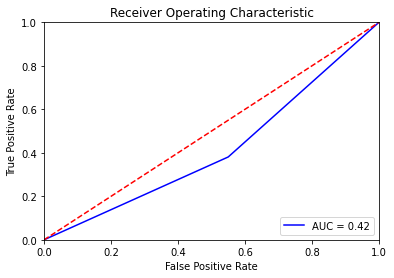

{'max_depth': 7, 'min_samples_leaf': 6}
Mejor ROC-AUC en validación cruzada: 0.625
Mejor valor del hiperparámetro: {'max_depth': 7, 'min_samples_leaf': 6}
0.4878048780487805
[[11  9]
 [12  9]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.42857142857142855 0.4878048780487805 0.55 0.4615384615384615


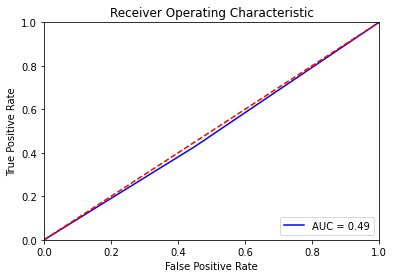

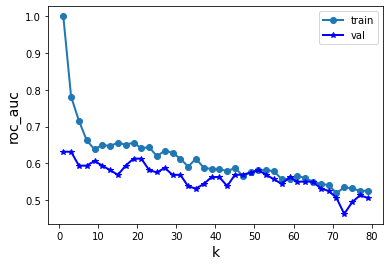

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.631
Valor correspondiente para el hiperparámetro: {'n_neighbors': 1}
0.5853658536585366
[[12  8]
 [ 9 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5714285714285714 0.5853658536585366 0.6 0.5853658536585366


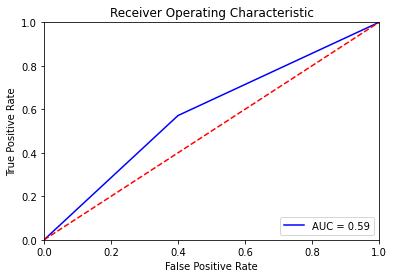

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.43902439024390244
[[ 7 13]
 [10 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5238095238095238 0.43902439024390244 0.35 0.4888888888888889


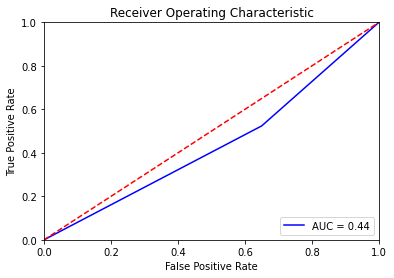

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
0.43902439024390244
[[ 9 11]
 [12  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.42857142857142855 0.43902439024390244 0.45 0.4390243902439024


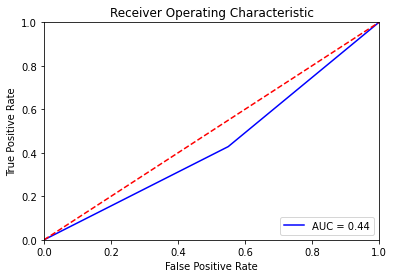

In [141]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all0,X_test_scaler_all0,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# ***Segunda partición***

In [142]:
X_train_1=list_x_train[1]
Y_train_1=list_y_train[1]
X_test_1=list_x_test[1]
Y_test_1=list_y_test[1]

In [143]:
X_train_1.isna().sum()

NumMeterCheckDayMeter                      73
LastFoodIntakeCarbs                        39
Weight_mod                                  1
Height_mod                                  4
LastFoodIntakeHrs_0-<4 hours prior          0
LastFoodIntakeHrs_4-<8 hours prior          0
LastFoodIntakeHrs_8 or more hours prior     0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [80]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_1, Y_train_1, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [81]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=9, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_1)

# transform the dataset
X_train_1 = imputer.transform(X_train_1)

# print total missing
print('Missing: %d' % sum(isnan(X_train_1).flatten()))

X_test_1=imputer.transform(X_test_1)
print('Missing: %d' % sum(isnan(X_test_1).flatten()))


Missing: 0
Missing: 0


In [82]:
X_train_numerical1=X_train_1[:,:4]
X_train_categorical1=X_train_1[:,4:]
X_test_numerical1=X_test_1[:,:4]
X_test_categorical1=X_test_1[:,4:]

In [83]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical1)
X_std_train_numerical = std_all.transform(X_train_numerical1) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical1)

In [84]:
X_train_std_all1=np.c_[X_std_train_numerical,X_train_categorical1]
X_test_std_all1=np.c_[X_std_test_numerical,X_test_categorical1]


In [85]:
X_train_std_all1.shape

(160, 7)

In [86]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical1)
X_scaler_train_numerical = scaler.transform(X_train_numerical1) 
X_scaler_test_numerical=scaler.transform(X_test_numerical1)

In [87]:
#Concatenamos para min-max

X_train_scaler_all1=np.c_[X_scaler_train_numerical,X_train_categorical1]
X_test_scaler_all1=np.c_[X_scaler_test_numerical,X_test_categorical1]


A continuación, aplicacmos los modelos:

In [88]:
#CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1,1)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1,1)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1,1)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all1,X_test_std_all1,Y_train_1,Y_test_1,1)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])

0.43902439024390244
[[ 6 14]
 [ 9 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5714285714285714 0.43902439024390244 0.3 0.5106382978723405


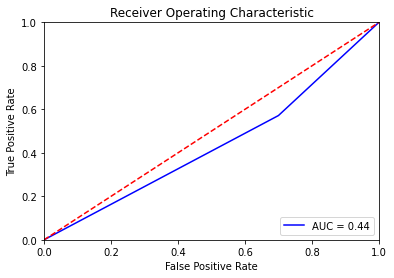

{'max_depth': 4, 'min_samples_leaf': 11}
Mejor ROC-AUC en validación cruzada: 0.556
Mejor valor del hiperparámetro: {'max_depth': 4, 'min_samples_leaf': 11}
0.5853658536585366
[[10 10]
 [ 7 14]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.6666666666666666 0.5853658536585366 0.5 0.6222222222222222


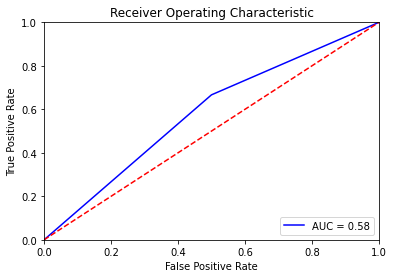

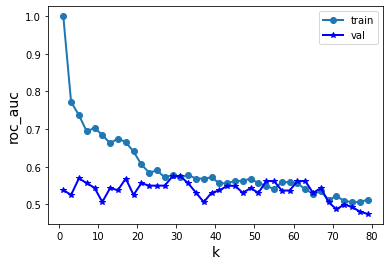

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
Valor correspondiente para el hiperparámetro: {'n_neighbors': 29}
0.5365853658536586
[[ 7 13]
 [ 6 15]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7142857142857143 0.5365853658536586 0.35 0.6122448979591837


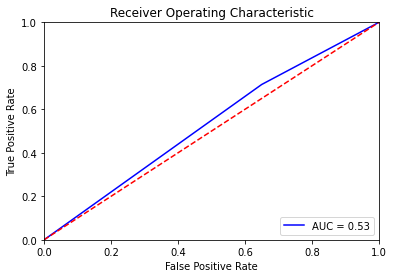

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.43902439024390244
[[ 6 14]
 [ 9 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5714285714285714 0.43902439024390244 0.3 0.5106382978723405


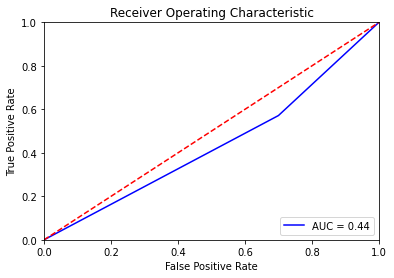

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.43902439024390244
[[ 7 13]
 [10 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5238095238095238 0.43902439024390244 0.35 0.4888888888888889


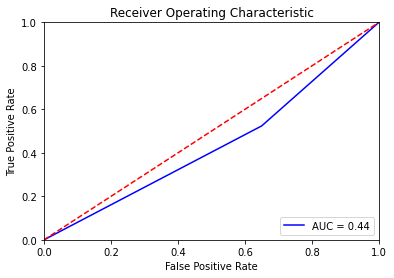

In [144]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all1,X_test_scaler_all1,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# ***Tercera partición***

In [90]:
X_train_2=list_x_train[2]
Y_train_2=list_y_train[2]
X_test_2=list_x_test[2]
Y_test_2=list_y_test[2]

In [91]:
X_train_2.isna().sum()

NumMeterCheckDayMeter                      76
LastFoodIntakeCarbs                        37
Weight_mod                                  0
Height_mod                                  2
LastFoodIntakeHrs_0-<4 hours prior          0
LastFoodIntakeHrs_4-<8 hours prior          0
LastFoodIntakeHrs_8 or more hours prior     0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [92]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_2, Y_train_2, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [93]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_2)

# transform the dataset
X_train_2 = imputer.transform(X_train_2)

# print total missing
print('Missing: %d' % sum(isnan(X_train_2).flatten()))

X_test_2=imputer.transform(X_test_2)
print('Missing: %d' % sum(isnan(X_test_2).flatten()))


Missing: 0
Missing: 0


In [94]:
X_train_numerical2=X_train_2[:,:4]
X_train_categorical2=X_train_2[:,4:]
X_test_numerical2=X_test_2[:,:4]
X_test_categorical2=X_test_2[:,4:]

In [95]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical2)
X_std_train_numerical = std_all.transform(X_train_numerical2) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical2)

In [96]:
X_train_std_all2=np.c_[X_std_train_numerical,X_train_categorical2]
X_test_std_all2=np.c_[X_std_test_numerical,X_test_categorical2]


In [97]:
X_train_std_all2.shape

(160, 7)

In [98]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical2)
X_scaler_train_numerical = scaler.transform(X_train_numerical2) 
X_scaler_test_numerical=scaler.transform(X_test_numerical2)

In [99]:
#Concatenamos para min-max

X_train_scaler_all2=np.c_[X_scaler_train_numerical,X_train_categorical2]
X_test_scaler_all2=np.c_[X_scaler_test_numerical,X_test_categorical2]


A continuación, aplicacmos los modelos:

In [100]:
#CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2,2)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2,2)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2,2)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all2,X_test_std_all2,Y_train_2,Y_test_2,2)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])


0.5365853658536586
[[13  7]
 [12  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.42857142857142855 0.5365853658536586 0.65 0.4864864864864864


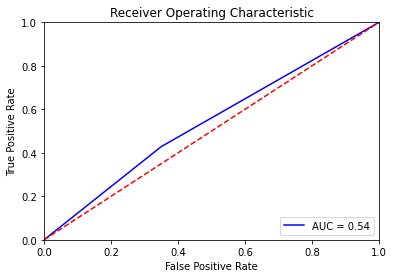

{'max_depth': 6, 'min_samples_leaf': 6}
Mejor ROC-AUC en validación cruzada: 0.625
Mejor valor del hiperparámetro: {'max_depth': 6, 'min_samples_leaf': 6}
0.4146341463414634
[[ 7 13]
 [11 10]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.47619047619047616 0.4146341463414634 0.35 0.4545454545454545


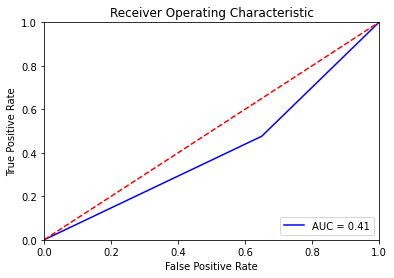

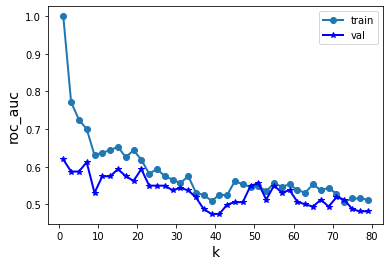

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.619
Valor correspondiente para el hiperparámetro: {'n_neighbors': 1}
0.5365853658536586
[[ 9 11]
 [ 8 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6190476190476191 0.5365853658536586 0.45 0.5777777777777778


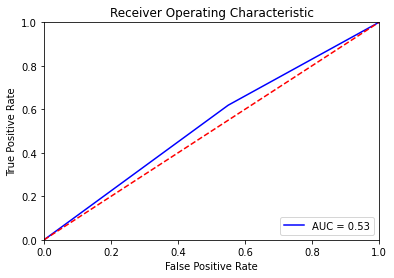

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.512
0.5609756097560976
[[12  8]
 [10 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5238095238095238 0.5609756097560976 0.6 0.5500000000000002


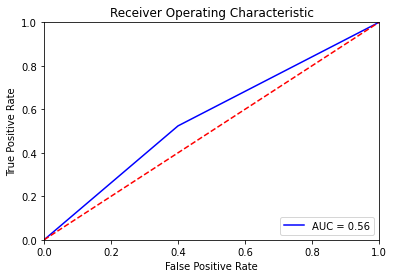

Valor correspondiente para el hiperparámetro: {'C': 25, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.5121951219512195
[[12  8]
 [12  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.42857142857142855 0.5121951219512195 0.6 0.4736842105263158


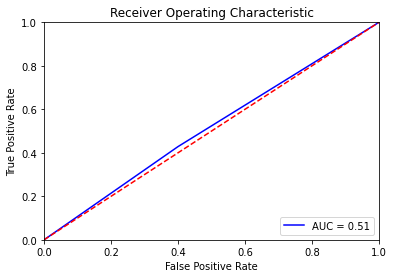

In [145]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all2,X_test_scaler_all2,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# ***Cuarta partición***

In [102]:
X_train_3=list_x_train[3]
Y_train_3=list_y_train[3]
X_test_3=list_x_test[3]
Y_test_3=list_y_test[3]

In [103]:
X_train_3.isna().sum()

NumMeterCheckDayMeter                      80
LastFoodIntakeCarbs                        36
Weight_mod                                  1
Height_mod                                  4
LastFoodIntakeHrs_0-<4 hours prior          0
LastFoodIntakeHrs_4-<8 hours prior          0
LastFoodIntakeHrs_8 or more hours prior     0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [104]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_3, Y_train_3, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [105]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=1, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_3)

# transform the dataset
X_train_3 = imputer.transform(X_train_3)

# print total missing
print('Missing: %d' % sum(isnan(X_train_3).flatten()))

X_test_3=imputer.transform(X_test_3)
print('Missing: %d' % sum(isnan(X_test_3).flatten()))


Missing: 0
Missing: 0


In [106]:
X_train_numerical3=X_train_3[:,:4]
X_train_categorical3=X_train_3[:,4:]
X_test_numerical3=X_test_3[:,:4]
X_test_categorical3=X_test_3[:,4:]

In [107]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical3)
X_std_train_numerical = std_all.transform(X_train_numerical3) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical3)

In [108]:
X_train_std_all3=np.c_[X_std_train_numerical,X_train_categorical3]
X_test_std_all3=np.c_[X_std_test_numerical,X_test_categorical3]


In [109]:
X_train_std_all3.shape

(160, 7)

In [110]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical3)
X_scaler_train_numerical = scaler.transform(X_train_numerical3) 
X_scaler_test_numerical=scaler.transform(X_test_numerical3)

In [111]:
#Concatenamos para min-max

X_train_scaler_all3=np.c_[X_scaler_train_numerical,X_train_categorical3]
X_test_scaler_all3=np.c_[X_scaler_test_numerical,X_test_categorical3]


A continuación, aplicacmos los modelos:

In [112]:
#CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3,3)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3,3)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3,3)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all3,X_test_std_all3,Y_train_3,Y_test_3,3)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(s[4])


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.500
0.4878048780487805
[[20  0]
 [21  0]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.0 0.4878048780487805 1.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


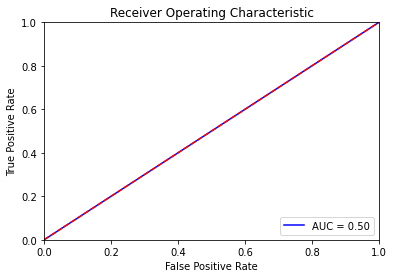

{'max_depth': 6, 'min_samples_leaf': 5}
Mejor ROC-AUC en validación cruzada: 0.532
Mejor valor del hiperparámetro: {'max_depth': 6, 'min_samples_leaf': 5}
0.7560975609756098
[[14  6]
 [ 4 17]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.8095238095238095 0.7560975609756098 0.7 0.7727272727272727


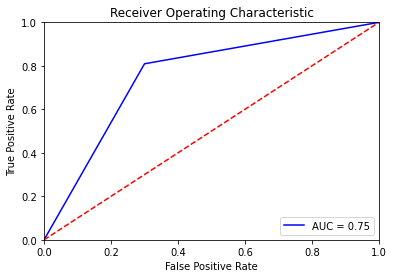

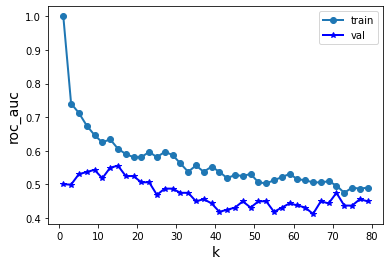

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
Valor correspondiente para el hiperparámetro: {'n_neighbors': 15}
0.5121951219512195
[[15  5]
 [15  6]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.2857142857142857 0.5121951219512195 0.75 0.37499999999999994


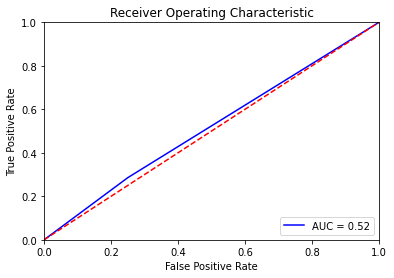

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.487
0.4146341463414634
[[ 2 18]
 [ 6 15]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7142857142857143 0.4146341463414634 0.1 0.5555555555555556


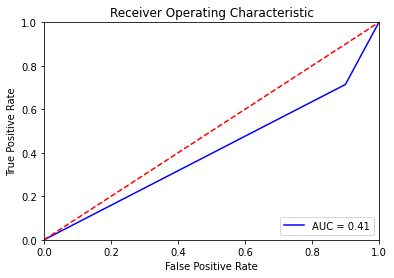

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.494
0.4146341463414634
[[ 2 18]
 [ 6 15]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7142857142857143 0.4146341463414634 0.1 0.5555555555555556


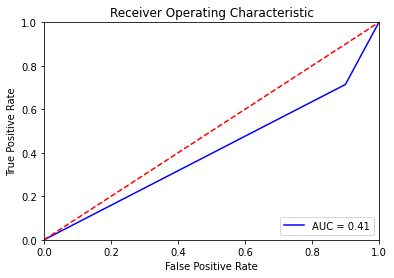

In [151]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all3,X_test_scaler_all3,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

# ***Quinta partición***

In [114]:
X_train_4=list_x_train[4]
Y_train_4=list_y_train[4]
X_test_4=list_x_test[4]
Y_test_4=list_y_test[4]

In [115]:
X_train_4.isna().sum()

NumMeterCheckDayMeter                      80
LastFoodIntakeCarbs                        40
Weight_mod                                  1
Height_mod                                  3
LastFoodIntakeHrs_0-<4 hours prior          0
LastFoodIntakeHrs_4-<8 hours prior          0
LastFoodIntakeHrs_8 or more hours prior     0
dtype: int64

Debemos imputar los valores nulos con knn_imputer:

In [116]:

# from numpy import mean
# from numpy import std
# from pandas import read_csv
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot

# # evaluate each strategy on the dataset
# results = list()
# strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
# for s in strategies:
# 	# create the modeling pipeline
# 	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
# 	# evaluate the model
# 	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
# 	scores = cross_val_score(pipeline, X_train_4, Y_train_4, scoring='accuracy', cv=cv, n_jobs=-1)
# 	# store results
# 	results.append(scores)
# 	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=strategies, showmeans=True)
# pyplot.show()

In [117]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_4)

# transform the dataset
X_train_4 = imputer.transform(X_train_4)

# print total missing
print('Missing: %d' % sum(isnan(X_train_4).flatten()))

X_test_4=imputer.transform(X_test_4)
print('Missing: %d' % sum(isnan(X_test_4).flatten()))


Missing: 0
Missing: 0


In [118]:
X_train_numerical4=X_train_4[:,:4]
X_train_categorical4=X_train_4[:,4:]
X_test_numerical4=X_test_4[:,:4]
X_test_categorical4=X_test_4[:,4:]

In [119]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

std_all = preprocessing.StandardScaler().fit(X_train_numerical4)
X_std_train_numerical = std_all.transform(X_train_numerical4) #Tendriamos todas las características estandarizadas
X_std_test_numerical = std_all.transform(X_test_numerical4)

In [120]:
X_train_std_all4=np.c_[X_std_train_numerical,X_train_categorical4]
X_test_std_all4=np.c_[X_std_test_numerical,X_test_categorical4]


In [121]:
X_train_std_all4.shape

(160, 7)

In [122]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical4)
X_scaler_train_numerical = scaler.transform(X_train_numerical4) 
X_scaler_test_numerical=scaler.transform(X_test_numerical4)

In [123]:
#Concatenamos para min-max

X_train_scaler_all4=np.c_[X_scaler_train_numerical,X_train_categorical4]
X_test_scaler_all4=np.c_[X_scaler_test_numerical,X_test_categorical4]


A continuación, aplicacmos los modelos:

In [124]:
#CON VARIABLES NORMALIZADAS CON STANDARD SCALER

# r=regresion_logistica(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4,4)
# recall_reg_std.append(r[0])
# accuracy_reg_std.append(r[1])
# precision_reg_std.append(r[2])
# f1_reg_std.append(r[3])
# roc_reg_std.append(r[4])

# a=decisionTree(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4,4)
# recall_arbol_std.append(a[0])
# accuracy_arbol_std.append(a[1])
# precision_arbol_std.append(a[2])
# f1_arbol_std.append(a[3])
# roc_arbol_std.append(a[4])

# k=knn(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4)
# recall_knn_std.append(k[0])
# accuracy_knn_std.append(k[1])
# precision_knn_std.append(k[2])
# f1_knn_std.append(k[3])
# roc_knn_std.append(k[4])

# s=svc(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4,4)
# recall_svc_std.append(s[0])
# accuracy_svc_std.append(s[1])
# precision_svc_std.append(s[2])
# f1_svc_std.append(s[3])
# roc_svc_std.append(s[4])

# sl=svc_lineal(X_train_std_all4,X_test_std_all4,Y_train_4,Y_test_4,4)
# recall_svc_lin_std.append(sl[0])
# accuracy_svc_lin_std.append(sl[1])
# precision_svc_lin_std.append(sl[2])
# f1_svc_lin_std.append(sl[3])
# roc_svc_lin_std.append(sl[4])

0.5853658536585366
[[ 8 12]
 [ 5 16]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7619047619047619 0.5853658536585366 0.4 0.6530612244897959


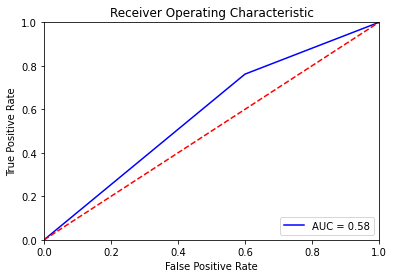

{'max_depth': 5, 'min_samples_leaf': 5}
Mejor ROC-AUC en validación cruzada: 0.519
Mejor valor del hiperparámetro: {'max_depth': 5, 'min_samples_leaf': 5}
0.6097560975609756
[[ 6 14]
 [ 2 19]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.9047619047619048 0.6097560975609756 0.3 0.7037037037037038


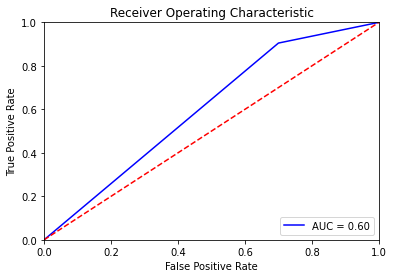

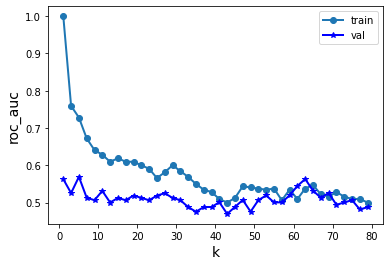

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.6585365853658537
[[14  6]
 [ 8 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6190476190476191 0.6585365853658537 0.7 0.6500000000000001


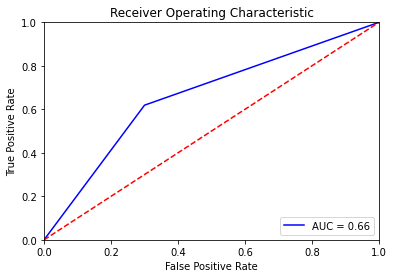

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.5609756097560976
[[ 8 12]
 [ 6 15]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7142857142857143 0.5609756097560976 0.4 0.6250000000000001


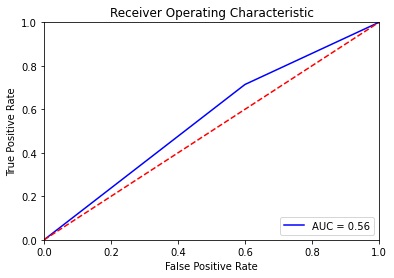

Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.5609756097560976
[[ 8 12]
 [ 6 15]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7142857142857143 0.5609756097560976 0.4 0.6250000000000001


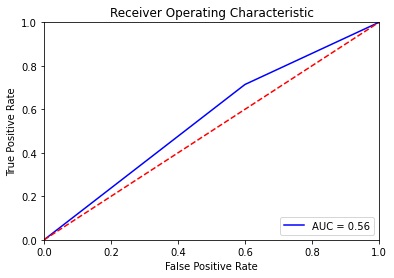

In [147]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_scaler_all4,X_test_scaler_all4,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:
#PARA MIN MAX

In [ ]:

model_scaler=['LASSO', 'DT','KNN','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler), np.mean(accuracy_knn_scaler), np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0       LASSO  0.512195  0.072353
1          DT  0.570732  0.116052
2         KNN  0.565854  0.052083
3  Radial SVM  0.492683  0.077743
4  Linear SVM  0.473171  0.054756

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# plt.rcParams["figure.figsize"] = (4, 3)
plt.savefig("{}.pdf".format("medchart_acc"))
plt.close()

# plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# # plt.rcParams["figure.figsize"] = (4, 3)
# plt.savefig("{}.pdf".format("Att_auc"))
# plt.close()

In [ ]:
model2_scaler=['LASSO', 'DT','KNN','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


In [ ]:
df_roc_scaler

model      mean       std
0       LASSO  0.511905  0.072699
1          DT  0.568571  0.115314
2         KNN  0.565952  0.052135
3  Radial SVM  0.488333  0.077841
4  Linear SVM  0.470952  0.055750

In [ ]:
#RECALL
model_scaler3=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler3=[np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)]
std_scaler3=[np.std(recall_reg_scaler), np.std(recall_arbol_scaler),np.std(recall_knn_scaler),np.std(recall_svc_scaler),np.std(recall_svc_lin_scaler)]

df_recall_scaler= pd.DataFrame()
df_recall_scaler['model'] = None
df_recall_scaler['mean'] = None
df_recall_scaler['std'] = None


df_recall_scaler['model'] = model_scaler3
df_recall_scaler['mean'] = mean_scaler3
df_recall_scaler['std'] = std_scaler3

In [ ]:
df_recall_scaler

model      mean       std
0       LASSO  0.523810  0.134687
1          DT  0.657143  0.184182
2         KNN  0.561905  0.145686
3  Radial SVM  0.666667  0.104328
4  Linear SVM  0.561905  0.129187

In [ ]:
model_scaler4=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler4=[np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)]
std_scaler4=[np.std(precision_reg_scaler), np.std(precision_arbol_scaler),np.std(precision_knn_scaler),np.std(precision_svc_scaler),np.std(precision_svc_lin_scaler)]

df_especificidad_scaler= pd.DataFrame()
df_especificidad_scaler['model'] = None
df_especificidad_scaler['mean'] = None
df_especificidad_scaler['std'] = None


df_especificidad_scaler['model'] = model_scaler4
df_especificidad_scaler['mean'] = mean_scaler4
df_especificidad_scaler['std'] = std_scaler4

In [ ]:
df_especificidad_scaler


model  mean       std
0       LASSO  0.50  0.151658
1          DT  0.48  0.143527
2         KNN  0.57  0.150333
3  Radial SVM  0.31  0.111355
4  Linear SVM  0.38  0.163095

# ***VALIDACIÓN CRUZADA Y FEATURE SELECTION***

# ***Boostrap***

In [ ]:
data2=data.rename(columns={"BCaseControlStatus":"label"})

In [ ]:
def compute_boostrap(df_data, v_column_names, label_name, generic_name, percentage_resampling=0.8, repetitions=30, flag_save_importance=False):

    list_variable_importance = []

    for i in range(len(v_column_names)):
        list_variable_importance.append(bootstrap_ci(df_data, v_column_names[i], (1 / percentage_resampling),
                                                     label_name, repetitions=repetitions))

    m_variable_importance = np.array(list_variable_importance)
    m_variable_importance = m_variable_importance.reshape(m_variable_importance.shape[0], 2)

    m_var_importance_bootstrap = np.c_[v_column_names, m_variable_importance]
    df_var_importance_bootstrap = pd.DataFrame(m_var_importance_bootstrap, columns=['var_name', 'ci_lower', 'ci_upper'])

    if flag_save_importance:
        df_var_importance_bootstrap.to_csv('df_var_importance_boostrap_{}.csv'.format(generic_name))


def bootstrap_ci(df_data, variable, div, classes, repetitions=3000, alpha=0.05, random_state=np.arange(1, 30000, 10)):
    """
    Compute bootstrap method with confidence interval
    :param df_data: a dataframe that includes observations of the two sample (df models)
    :param variable: a column_name of the column that includes observations (sens, espec,acc,precision,auc)
    :param div:
    :param classes: a column_name of the column that includes classes (This column should contain two different group names: dt and lasso, dt and svm, svm and lasso)
    :param repetitions: the number of times you want the bootstrapping to repeat. Default is 1000.
    :param alpha: likelihood that the true population parameter lies outside the confidence interval. Default is 0.05.
    :param random_state: enable users to set their own random_state, default is None
    :return:
    """
    df = df_data[[variable, classes]]
    bootstrap_sample_size = len(df)

    proportion_diffs = []
    print("sample size: ", int(bootstrap_sample_size/div))

    for i in range(repetitions):

        bootstrap_sample = df.sample(n=int(bootstrap_sample_size/div), replace=False, random_state=random_state[i])

        print(bootstrap_sample)

        label_0 = (bootstrap_sample[(bootstrap_sample[classes] == 0)])
        mean_label_0 = label_0[variable].mean()
        label_1 = (bootstrap_sample[(bootstrap_sample[classes] == 1)])
        mean_label_1 = label_1[variable].mean()

        proportion_diff = mean_label_1 - mean_label_0
        proportion_diffs.append(proportion_diff)

        df_proportions = pd.DataFrame(proportion_diffs)

    out = []

    for tt in range(len(df_proportions.columns)):

        left = np.percentile(df_proportions[tt], alpha / 2 * 100)
        right = np.percentile(df_proportions[tt], 100 - alpha / 2 * 100)
        out.append([round(left, 2), round(right, 2)])

    return out

In [ ]:
compute_boostrap(data2,X.columns, 'label', 'importance_bootstrap', flag_save_importance=True)




sample size:  160
     VisitDaysFromEnroll  label
97                     0      1
117                    0      1
59                     0      1
35                     0      1
165                    0      1
..                   ...    ...
24                     0      1
3                      0      0
170                    0      1
49                     0      1
149                   11      0

[160 rows x 2 columns]
     VisitDaysFromEnroll  label
175                    0      0
33                     0      1
200                    0      0
187                    0      0
22                     0      0
..                   ...    ...
185                    0      0
168                    0      1
7                      7      1
142                    0      1
44                     0      0

[160 rows x 2 columns]
     VisitDaysFromEnroll  label
117                    0      1
9                      0      1
17                     7      0
20                     6      0
125   

# ***PRIMERA PARTICIÓN***

In [ ]:
X_train_0=list_x_train[0]
Y_train_0=list_y_train[0]
X_test_0=list_x_test[0]
Y_test_0=list_y_test[0]

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=1, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_0)

# transform the dataset
X_train_0= imputer.transform(X_train_0)

# print total missing
print('Missing: %d' % sum(isnan(X_train_0).flatten()))

X_test_0=imputer.transform(X_test_0)
print('Missing: %d' % sum(isnan(X_test_0).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical0=X_train_0[:,:5]
X_train_categorical0=X_train_0[:,5:]
X_test_numerical0=X_test_0[:,:5]
X_test_categorical0=X_test_0[:,5:]

In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical0)
X_scaler_train_numerical = scaler.transform(X_train_numerical0) 
X_scaler_test_numerical=scaler.transform(X_test_numerical0)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all0=np.c_[X_scaler_train_numerical,X_train_categorical0]
X_test_scaler_all0=np.c_[X_scaler_test_numerical,X_test_categorical0]


In [ ]:
X_train_scaler_all0.shape

(160, 7)

A continuación, hacemos selección de características:

# ***Métodos *embedded****

Ranking de Características:
1. Característica 4 (0.272902)
2. Característica 3 (0.256507)
3. Característica 2 (0.210574)
4. Característica 1 (0.150642)
5. Característica 0 (0.066433)
6. Característica 5 (0.016520)
7. Característica 6 (0.014410)
8. Característica 7 (0.012013)


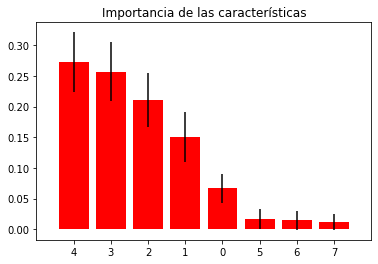

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all0, Y_train_0)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all0.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all0.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all0.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all0.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
* MoCALang2	
* MoCADelRec

# ***Método filter***

In [ ]:
X

NumMeterCheckDayMeter  LastFoodIntakeCarbs  Weight_mod  Height_mod  \
0                      NaN                 36.0       80.73      163.00   
1                      NaN                  NaN       82.45      180.34   
2                      NaN                  NaN       98.87      188.98   
3                      NaN                  NaN       99.14      184.00   
4                      NaN                  NaN       95.78      188.98   
..                     ...                  ...         ...         ...   
196                    5.0                 30.0      113.83      185.42   
197                    4.0                 45.0       56.69      165.10   
198                    NaN                 45.0       70.30      167.60   
199                    NaN                 80.0       85.70      182.80   
200                    NaN                 40.0       59.40      162.50   

     LastFoodIntakeHrs_0-<4 hours prior  LastFoodIntakeHrs_4-<8 hours prior  \
0                                     1                                   0   
1                                     1                                   0   
2                                     1                                   0   
3                                     1                                   0   
4                                     1                                   0   
..                                  ...                                 ...   
196                                   1                                   0   
197                                   1                                   0   
198                                   1                                   0   
199                                   1                                   0   
200                                   1                                   0   

     LastFoodIntakeHrs_8 or more hours prior  
0                                          0  
1                                          0  
2                                          0  
3                                          0  
4                                          0  
..                                       ...  
196                                        0  
197                                        0  
198                                        0  
199                                        0  
200                                        0  

[201 rows x 7 columns]

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from functools import partial
bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=0), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all0, Y_train_0)
# fit_Chi2 = pd.Series(fit_Chi2.scores_)
# fit_Chi2.sort_values(ascending=False)

# fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
lista_chi=[ [] for i in range(X.shape[1])]


In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

In [ ]:
lista_chi

[[0.0010803073550866849],
 [0.008664476658005738],
 [0.01530658455011391],
 [0.009845110904864951],
 [0.030310105334884874],
 [0.008143435199464477],
 [0.01384753145043538]]

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('VisitDaysFromEnroll', 0.0539655197676532)
('NumMeterCheckDayMeter', 0.13589824288079544)
('LastFoodIntakeCarbs', 0.20243411860955812)
('Weight_mod', 0.27627900954783563)
('Height_mod', 0.2785858744452775)
('LastFoodIntakeHrs_0-<4 hours prior', 0.021381374669035703)
('LastFoodIntakeHrs_4-<8 hours prior', 0.017184097009368526)
('LastFoodIntakeHrs_8 or more hours prior', 0.014271763070475866)
Ranking de Características:
1. Característica 4 (0.278586)
2. Característica 3 (0.276279)
3. Característica 2 (0.202434)
4. Característica 1 (0.135898)
5. Característica 0 (0.053966)
6. Característica 5 (0.021381)
7. Característica 6 (0.017184)
8. Característica 7 (0.014272)


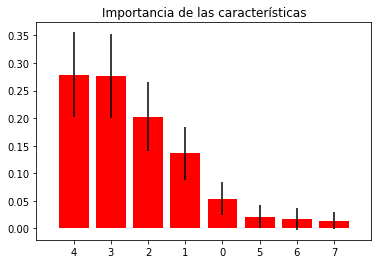

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all0, Y_train_0)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all0.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all0.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all0.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all0.shape[1]])
plt.show()


# ***Segunda partición***

In [ ]:
X_train_1=list_x_train[1]
Y_train_1=list_y_train[1]
X_test_1=list_x_test[1]
Y_test_1=list_y_test[1]


In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=9, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_1)

# transform the dataset
X_train_1 = imputer.transform(X_train_1)

# print total missing
print('Missing: %d' % sum(isnan(X_train_1).flatten()))

X_test_1=imputer.transform(X_test_1)
print('Missing: %d' % sum(isnan(X_test_1).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical1=X_train_1[:,:5]
X_train_categorical1=X_train_1[:,5:]
X_test_numerical1=X_test_1[:,:5]
X_test_categorical1=X_test_1[:,5:]

In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical1)
X_scaler_train_numerical = scaler.transform(X_train_numerical1) 
X_scaler_test_numerical=scaler.transform(X_test_numerical1)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all1=np.c_[X_scaler_train_numerical,X_train_categorical1]
X_test_scaler_all1=np.c_[X_scaler_test_numerical,X_test_categorical1]


# ***Métodos *embedded****

Ranking de Características:
1. Característica 4 (0.253239)
2. Característica 3 (0.239294)
3. Característica 2 (0.210494)
4. Característica 1 (0.201443)
5. Característica 0 (0.058191)
6. Característica 6 (0.015647)
7. Característica 7 (0.011264)
8. Característica 5 (0.010427)


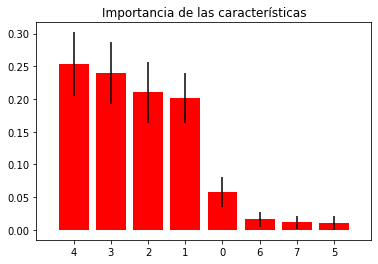

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all1, Y_train_1)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all1.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all1.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all1.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all1.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
- BBGAttitudeScaleCompEnroll	
- HighBGLevTakeAction	
- LowBGLevTakeAction	
- PtCurrA1cGoal

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=1), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all1, Y_train_1)
# fit_Chi2 = pd.Series(fit_Chi2.scores_)
# fit_Chi2.sort_values(ascending=False)

# fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('VisitDaysFromEnroll', 0.047977966445249015)
('NumMeterCheckDayMeter', 0.19533269024501154)
('LastFoodIntakeCarbs', 0.20458231435358948)
('Weight_mod', 0.24629850971548267)
('Height_mod', 0.25213177310979396)
('LastFoodIntakeHrs_0-<4 hours prior', 0.01724800683049959)
('LastFoodIntakeHrs_4-<8 hours prior', 0.01993489006881943)
('LastFoodIntakeHrs_8 or more hours prior', 0.016493849231554367)
Ranking de Características:
1. Característica 4 (0.252132)
2. Característica 3 (0.246299)
3. Característica 2 (0.204582)
4. Característica 1 (0.195333)
5. Característica 0 (0.047978)
6. Característica 6 (0.019935)
7. Característica 5 (0.017248)
8. Característica 7 (0.016494)


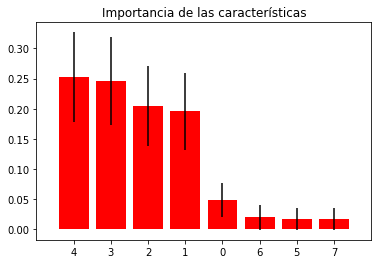

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all1, Y_train_1)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all1.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all1.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all1.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all1.shape[1]])
plt.show()


# ***Tercera partición***

In [ ]:
X_train_2=list_x_train[2]
Y_train_2=list_y_train[2]
X_test_2=list_x_test[2]
Y_test_2=list_y_test[2]

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_2)

# transform the dataset
X_train_2 = imputer.transform(X_train_2)

# print total missing
print('Missing: %d' % sum(isnan(X_train_2).flatten()))

X_test_2=imputer.transform(X_test_2)
print('Missing: %d' % sum(isnan(X_test_2).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical2=X_train_2[:,:5]
X_train_categorical2=X_train_2[:,5:]
X_test_numerical2=X_test_2[:,:5]
X_test_categorical2=X_test_2[:,5:]

In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical2)
X_scaler_train_numerical = scaler.transform(X_train_numerical2) 
X_scaler_test_numerical=scaler.transform(X_test_numerical2)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all2=np.c_[X_scaler_train_numerical,X_train_categorical2]
X_test_scaler_all2=np.c_[X_scaler_test_numerical,X_test_categorical2]


# ***Métodos *embedded****

Ranking de Características:
1. Característica 4 (0.239502)
2. Característica 3 (0.238851)
3. Característica 2 (0.232719)
4. Característica 1 (0.184690)
5. Característica 0 (0.067656)
6. Característica 5 (0.016124)
7. Característica 6 (0.011055)
8. Característica 7 (0.009403)


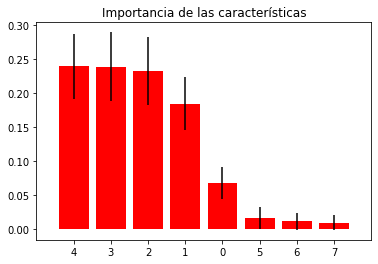

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all2, Y_train_2)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all2.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all2.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all2.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all2.shape[1]])
plt.show()

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=2), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all2, Y_train_2)
# fit_Chi2 = pd.Series(fit_Chi2.scores_)
# fit_Chi2.sort_values(ascending=False)

# fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('VisitDaysFromEnroll', 0.054251634023946255)
('NumMeterCheckDayMeter', 0.15971009206672854)
('LastFoodIntakeCarbs', 0.22677730268317972)
('Weight_mod', 0.2542881278215414)
('Height_mod', 0.26229535525219555)
('LastFoodIntakeHrs_0-<4 hours prior', 0.018268103514349005)
('LastFoodIntakeHrs_4-<8 hours prior', 0.012624203177934041)
('LastFoodIntakeHrs_8 or more hours prior', 0.011785181460125586)
Ranking de Características:
1. Característica 4 (0.262295)
2. Característica 3 (0.254288)
3. Característica 2 (0.226777)
4. Característica 1 (0.159710)
5. Característica 0 (0.054252)
6. Característica 5 (0.018268)
7. Característica 6 (0.012624)
8. Característica 7 (0.011785)


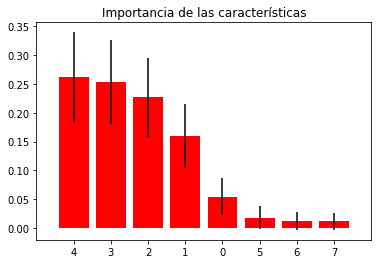

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all2, Y_train_2)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all2.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all2.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all2.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all2.shape[1]])
plt.show()


# ***Cuarta partición***

In [ ]:
X_train_3=list_x_train[3]
Y_train_3=list_y_train[3]
X_test_3=list_x_test[3]
Y_test_3=list_y_test[3]

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=1, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_3)

# transform the dataset
X_train_3 = imputer.transform(X_train_3)

# print total missing
print('Missing: %d' % sum(isnan(X_train_3).flatten()))

X_test_3=imputer.transform(X_test_3)
print('Missing: %d' % sum(isnan(X_test_3).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical3=X_train_3[:,:5]
X_train_categorical3=X_train_3[:,5:]
X_test_numerical3=X_test_3[:,:5]
X_test_categorical3=X_test_3[:,5:]

In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical3)
X_scaler_train_numerical = scaler.transform(X_train_numerical3) 
X_scaler_test_numerical=scaler.transform(X_test_numerical3)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all3=np.c_[X_scaler_train_numerical,X_train_categorical3]
X_test_scaler_all3=np.c_[X_scaler_test_numerical,X_test_categorical3]


# ***Métodos *embedded****

Ranking de Características:
1. Característica 4 (0.274024)
2. Característica 3 (0.263122)
3. Característica 2 (0.211555)
4. Característica 1 (0.151217)
5. Característica 0 (0.071556)
6. Característica 5 (0.011383)
7. Característica 7 (0.009770)
8. Característica 6 (0.007373)


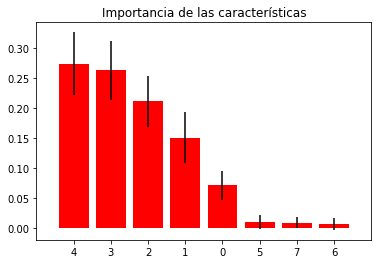

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all3, Y_train_3)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all3.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all3.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all3.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all3.shape[1]])
plt.show()

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=3), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all3, Y_train_3)
# fit_Chi2 = pd.Series(fit_Chi2.scores_)
# fit_Chi2.sort_values(ascending=False)

# fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('VisitDaysFromEnroll', 0.06414277742126777)
('NumMeterCheckDayMeter', 0.13226700068072073)
('LastFoodIntakeCarbs', 0.2029743028723933)
('Weight_mod', 0.2716753973767693)
('Height_mod', 0.2764890324080031)
('LastFoodIntakeHrs_0-<4 hours prior', 0.021978747878023494)
('LastFoodIntakeHrs_4-<8 hours prior', 0.015318189055401176)
('LastFoodIntakeHrs_8 or more hours prior', 0.015154552307420913)
Ranking de Características:
1. Característica 4 (0.276489)
2. Característica 3 (0.271675)
3. Característica 2 (0.202974)
4. Característica 1 (0.132267)
5. Característica 0 (0.064143)
6. Característica 5 (0.021979)
7. Característica 6 (0.015318)
8. Característica 7 (0.015155)


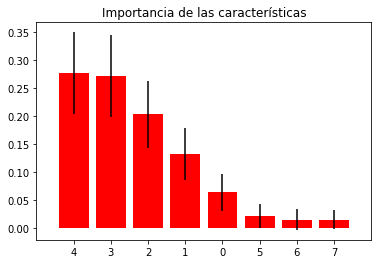

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all3, Y_train_3)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all3.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all3.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all3.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all3.shape[1]])
plt.show()


# ***Quinta partición***

In [ ]:
X_train_4=list_x_train[4]
Y_train_4=list_y_train[4]
X_test_4=list_x_test[4]
Y_test_4=list_y_test[4]

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train_4)

# transform the dataset
X_train_4 = imputer.transform(X_train_4)

# print total missing
print('Missing: %d' % sum(isnan(X_train_4).flatten()))

X_test_4=imputer.transform(X_test_4)
print('Missing: %d' % sum(isnan(X_test_4).flatten()))


Missing: 0
Missing: 0


In [ ]:
X_train_numerical4=X_train_4[:,:5]
X_train_categorical4=X_train_4[:,5:]
X_test_numerical4=X_test_4[:,:5]
X_test_categorical4=X_test_4[:,5:]

In [ ]:
#CON MIN-MAX

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical4)
X_scaler_train_numerical = scaler.transform(X_train_numerical4) 
X_scaler_test_numerical=scaler.transform(X_test_numerical4)

In [ ]:
#Concatenamos para min-max

X_train_scaler_all4=np.c_[X_scaler_train_numerical,X_train_categorical4]
X_test_scaler_all4=np.c_[X_scaler_test_numerical,X_test_categorical4]


# ***Métodos *embedded****

Ranking de Características:
1. Característica 3 (0.242777)
2. Característica 4 (0.236831)
3. Característica 2 (0.223728)
4. Característica 1 (0.199725)
5. Característica 0 (0.065959)
6. Característica 5 (0.011257)
7. Característica 7 (0.010034)
8. Característica 6 (0.009690)


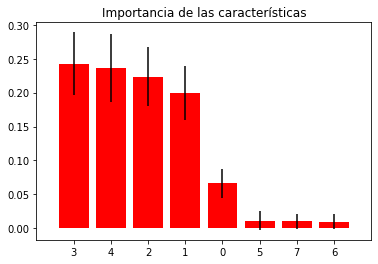

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all4, Y_train_4)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all4.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all4.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all4.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all4.shape[1]])
plt.show()

# ***Método filter***

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from functools import partial
bestfeatures_Chi2 = SelectKBest(score_func=partial(mutual_info_classif,random_state=4), k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_train_scaler_all4, Y_train_4)
# fit_Chi2 = pd.Series(fit_Chi2.scores_)
# fit_Chi2.sort_values(ascending=False)

# fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

In [ ]:
contador=0
for i in fit_Chi2.scores_:
  lista_chi[contador].append(i)
  contador+=1

In [ ]:
for i in range(len(lista_chi)):
  lista_chi[i]=np.mean(lista_chi[i])

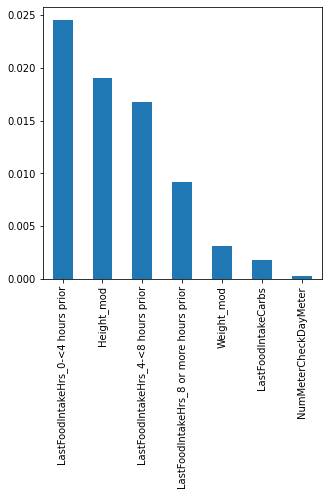

In [ ]:
fit_Chi2 = pd.Series(lista_chi, index=X.columns)
# fit_Chi2.sort_values(ascending=False)

fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))
# gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")
# indices = np.argsort(fit_Chi2)[::-1]

# plt.figure()
# # plt.title("Importancia de las características")
# plt.bar(X.columns, fit_Chi2.scores_),
#         color="r", align="center")
# plt.xticks(rotation='vertical')
# plt.xlim([-1, X_train_scaler_all0.shape[1]])
# plt.rcParams["figure.figsize"] = (5, 5)
# plt.tight_layout()
# plt.savefig("{}.pdf".format("IMutuaAttitudeScale"))
# plt.close()
# plt.show()

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('VisitDaysFromEnroll', 0.05650075629446073)
('NumMeterCheckDayMeter', 0.1768002661374401)
('LastFoodIntakeCarbs', 0.2202585661463968)
('Weight_mod', 0.2506015786533301)
('Height_mod', 0.24972110766786676)
('LastFoodIntakeHrs_0-<4 hours prior', 0.017870218429252866)
('LastFoodIntakeHrs_4-<8 hours prior', 0.013752068679332888)
('LastFoodIntakeHrs_8 or more hours prior', 0.014495437991919841)
Ranking de Características:
1. Característica 3 (0.250602)
2. Característica 4 (0.249721)
3. Característica 2 (0.220259)
4. Característica 1 (0.176800)
5. Característica 0 (0.056501)
6. Característica 5 (0.017870)
7. Característica 7 (0.014495)
8. Característica 6 (0.013752)


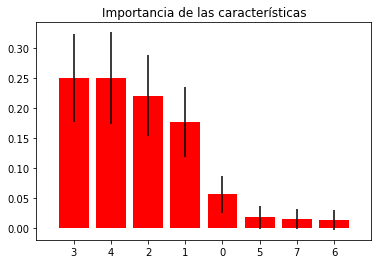

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all4, Y_train_4)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all4.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all4.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all4.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all4.shape[1]])
plt.show()


# ***RESULTADOS CON FS***

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all0[:,[0,1,2,3]]
X_test_ec = X_test_scaler_all0[:,[0,1,2,3]]


Valor correspondiente para el hiperparámetro: {'C': 20, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.43902439024390244
[[ 8 12]
 [11 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.47619047619047616 0.43902439024390244 0.4 0.46511627906976744


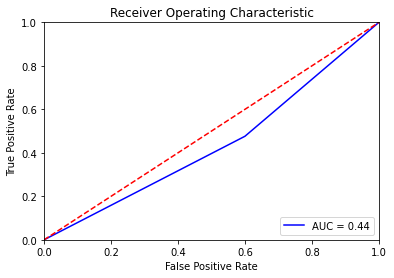

{'max_depth': 3, 'min_samples_leaf': 16}
Mejor ROC-AUC en validación cruzada: 0.619
Mejor valor del hiperparámetro: {'max_depth': 3, 'min_samples_leaf': 16}
0.5121951219512195
[[ 8 12]
 [ 8 13]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.6190476190476191 0.5121951219512195 0.4 0.5652173913043478


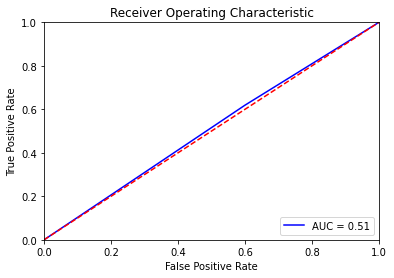

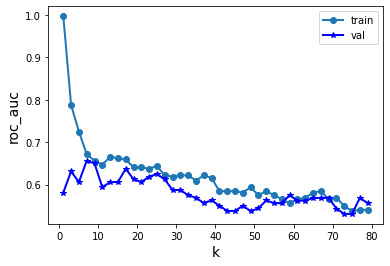

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.656
Valor correspondiente para el hiperparámetro: {'n_neighbors': 7}
0.6097560975609756
[[13  7]
 [ 9 12]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5714285714285714 0.6097560975609756 0.65 0.6


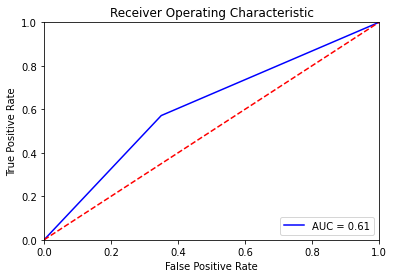

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.619
0.4634146341463415
[[ 6 14]
 [ 8 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6190476190476191 0.4634146341463415 0.3 0.5416666666666666


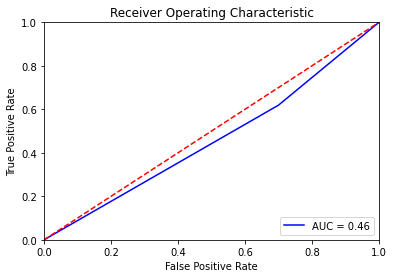

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.619
0.4634146341463415
[[ 6 14]
 [ 8 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6190476190476191 0.4634146341463415 0.3 0.5416666666666666


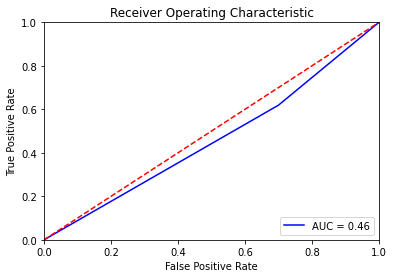

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all1[:,[0,1,2,3]]
X_test_ec = X_test_scaler_all1[:,[0,1,2,3]]


Valor correspondiente para el hiperparámetro: {'C': 50, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.519
0.5853658536585366
[[ 9 11]
 [ 6 15]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7142857142857143 0.5853658536585366 0.45 0.6382978723404256


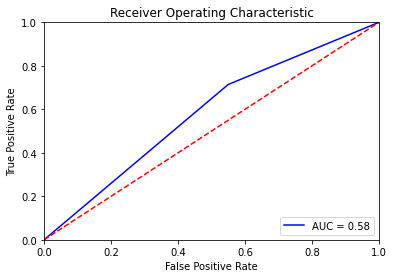

{'max_depth': 4, 'min_samples_leaf': 11}
Mejor ROC-AUC en validación cruzada: 0.556
Mejor valor del hiperparámetro: {'max_depth': 4, 'min_samples_leaf': 11}
0.5853658536585366
[[10 10]
 [ 7 14]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.6666666666666666 0.5853658536585366 0.5 0.6222222222222222


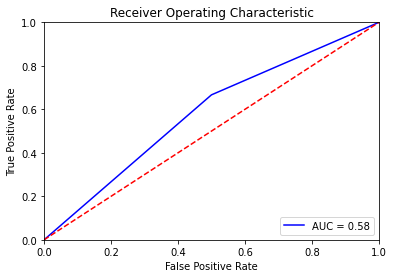

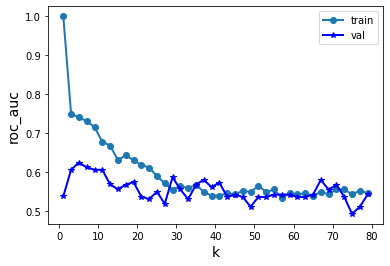

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.625
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.5609756097560976
[[13  7]
 [11 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.47619047619047616 0.5609756097560976 0.65 0.5263157894736842


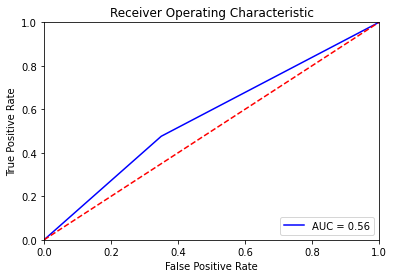

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
0.5609756097560976
[[ 5 15]
 [ 3 18]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.8571428571428571 0.5609756097560976 0.25 0.6666666666666665


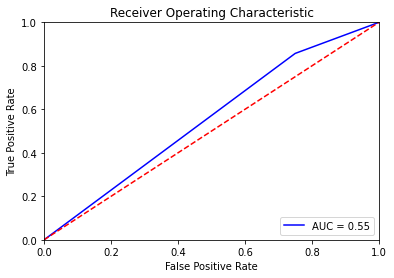

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.581
0.5609756097560976
[[ 5 15]
 [ 3 18]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.8571428571428571 0.5609756097560976 0.25 0.6666666666666665


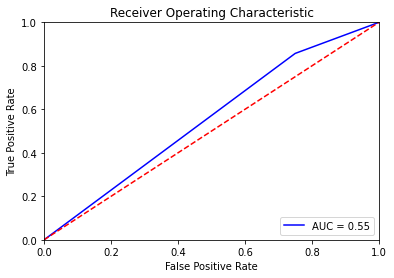

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all2[:,[0,1,2,3]]
X_test_ec = X_test_scaler_all2[:,[0,1,2,3]]


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
0.5853658536585366
[[14  6]
 [11 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.47619047619047616 0.5853658536585366 0.7 0.5405405405405405


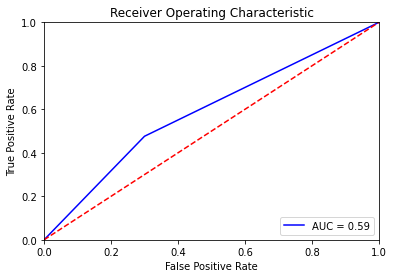

{'max_depth': 6, 'min_samples_leaf': 5}
Mejor ROC-AUC en validación cruzada: 0.625
Mejor valor del hiperparámetro: {'max_depth': 6, 'min_samples_leaf': 5}
0.43902439024390244
[[ 7 13]
 [10 11]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.5238095238095238 0.43902439024390244 0.35 0.4888888888888889


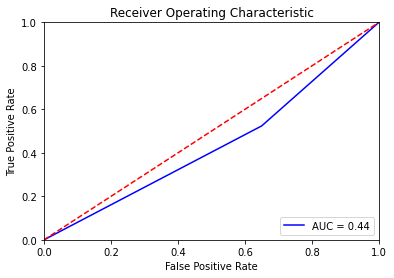

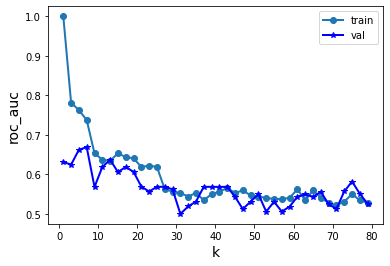

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.669
Valor correspondiente para el hiperparámetro: {'n_neighbors': 7}
0.4878048780487805
[[ 9 11]
 [10 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5238095238095238 0.4878048780487805 0.45 0.5116279069767442


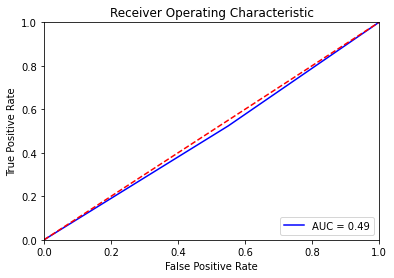

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.575
0.5121951219512195
[[13  7]
 [13  8]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.38095238095238093 0.5121951219512195 0.65 0.4444444444444444


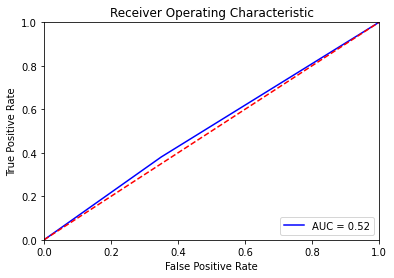

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
0.5365853658536586
[[13  7]
 [12  9]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.42857142857142855 0.5365853658536586 0.65 0.4864864864864864


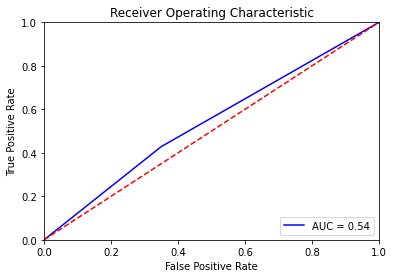

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])


In [149]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all3[:,[0,1,2,3]]
X_test_ec = X_test_scaler_all3[:,[0,1,2,3]]


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.500
0.4878048780487805
[[20  0]
 [21  0]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.0 0.4878048780487805 1.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


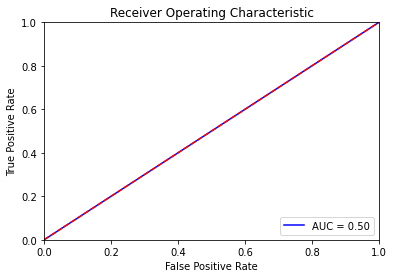

{'max_depth': 6, 'min_samples_leaf': 5}
Mejor ROC-AUC en validación cruzada: 0.569
Mejor valor del hiperparámetro: {'max_depth': 6, 'min_samples_leaf': 5}
0.6341463414634146
[[14  6]
 [ 9 12]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.5714285714285714 0.6341463414634146 0.7 0.6153846153846153


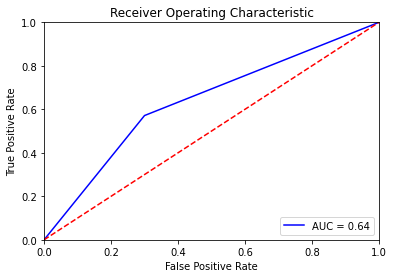

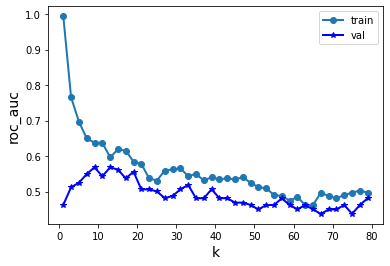

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.568
Valor correspondiente para el hiperparámetro: {'n_neighbors': 9}
0.7317073170731707
[[17  3]
 [ 8 13]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.6190476190476191 0.7317073170731707 0.85 0.7027027027027026


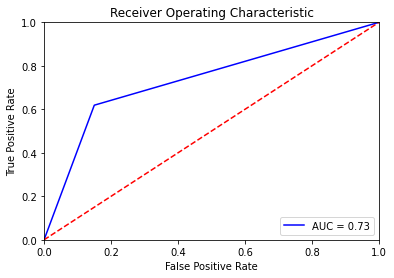

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.481
0.6585365853658537
[[16  4]
 [10 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5238095238095238 0.6585365853658537 0.8 0.611111111111111


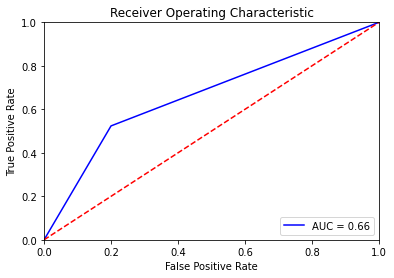

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.494
0.6341463414634146
[[16  4]
 [11 10]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.47619047619047616 0.6341463414634146 0.8 0.5714285714285714


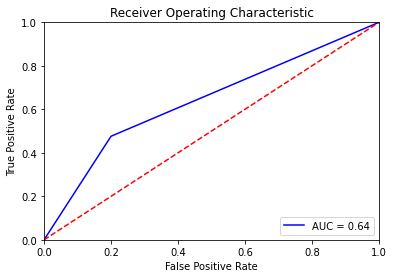

In [150]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])



In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all4[:,[0,1,2,3]]
X_test_ec = X_test_scaler_all4[:,[0,1,2,3]]


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.512
0.5365853658536586
[[11  9]
 [10 11]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.5238095238095238 0.5365853658536586 0.55 0.5365853658536585


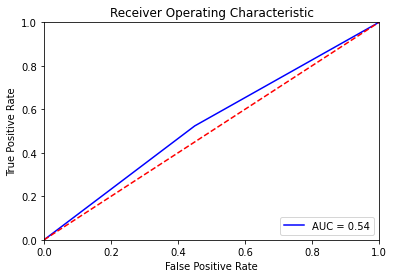

{'max_depth': 2, 'min_samples_leaf': 33}
Mejor ROC-AUC en validación cruzada: 0.512
Mejor valor del hiperparámetro: {'max_depth': 2, 'min_samples_leaf': 33}
0.5609756097560976
[[17  3]
 [15  6]]
Sensibilidad, Accuracy, Especifididad, f1-score 0.2857142857142857 0.5609756097560976 0.85 0.4


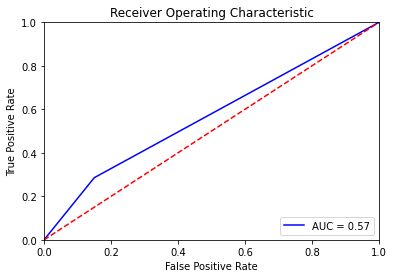

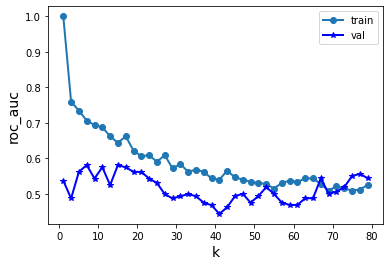

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.581
Valor correspondiente para el hiperparámetro: {'n_neighbors': 15}
0.6829268292682927
[[13  7]
 [ 6 15]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7142857142857143 0.6829268292682927 0.65 0.6976744186046512


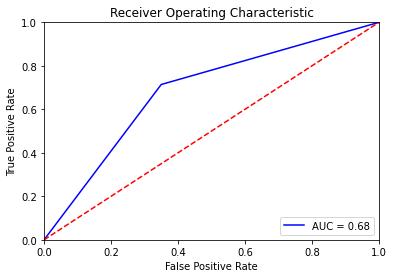

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.6341463414634146
[[11  9]
 [ 6 15]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.7142857142857143 0.6341463414634146 0.55 0.6666666666666666


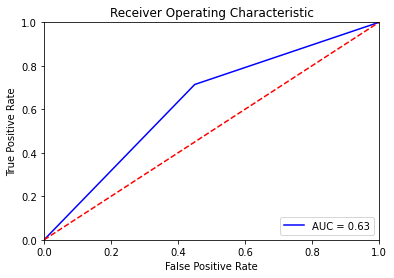

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.6341463414634146
[[ 9 11]
 [ 4 17]]
Sensibilidad, Accuracy, Especificidad, f1-score 0.8095238095238095 0.6341463414634146 0.45 0.6938775510204083


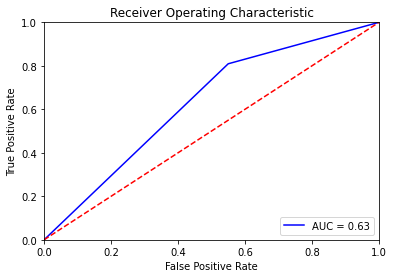

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(sl[4])


In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:

model_scaler=['LASSO', 'DT','KNN','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler), np.mean(accuracy_knn_scaler), np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0       LASSO  0.526829  0.056887
1          DT  0.546341  0.066528
2         KNN  0.614634  0.086439
3  Radial SVM  0.531707  0.060535
4  Linear SVM  0.565854  0.064346

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# plt.rcParams["figure.figsize"] = (4, 3)
plt.savefig("{}.pdf".format("medchart_FS_acc"))
plt.close()

# plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)
# # plt.rcParams["figure.figsize"] = (4, 3)
# plt.savefig("{}.pdf".format("Att_auc"))
# plt.close()

In [ ]:
model2_scaler=['LASSO', 'DT','KNN','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


In [ ]:
df_roc_scaler

model      mean       std
0       LASSO  0.529048  0.055648
1          DT  0.546667  0.068044
2         KNN  0.615476  0.087079
3  Radial SVM  0.532143  0.058384
4  Linear SVM  0.564048  0.065497

In [ ]:
#RECALL
model_scaler3=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler3=[np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)]
std_scaler3=[np.std(recall_reg_scaler), np.std(recall_arbol_scaler),np.std(recall_knn_scaler),np.std(recall_svc_scaler),np.std(recall_svc_lin_scaler)]

df_recall_scaler= pd.DataFrame()
df_recall_scaler['model'] = None
df_recall_scaler['mean'] = None
df_recall_scaler['std'] = None


df_recall_scaler['model'] = model_scaler3
df_recall_scaler['mean'] = mean_scaler3
df_recall_scaler['std'] = std_scaler3

In [ ]:
df_recall_scaler

model      mean       std
0       LASSO  0.438095  0.235991
1          DT  0.533333  0.132651
2         KNN  0.580952  0.081927
3  Radial SVM  0.514286  0.300264
4  Linear SVM  0.638095  0.171957

In [ ]:
model_scaler4=['LASSO', 'DT', 'KNN','Radial SVM', 'Linear SVM']
mean_scaler4=[np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)]
std_scaler4=[np.std(precision_reg_scaler), np.std(precision_arbol_scaler),np.std(precision_knn_scaler),np.std(precision_svc_scaler),np.std(precision_svc_lin_scaler)]

df_especificidad_scaler= pd.DataFrame()
df_especificidad_scaler['model'] = None
df_especificidad_scaler['mean'] = None
df_especificidad_scaler['std'] = None


df_especificidad_scaler['model'] = model_scaler4
df_especificidad_scaler['mean'] = mean_scaler4
df_especificidad_scaler['std'] = std_scaler4

In [ ]:
df_especificidad_scaler


model  mean       std
0       LASSO  0.62  0.215870
1          DT  0.56  0.188149
2         KNN  0.65  0.126491
3  Radial SVM  0.55  0.270185
4  Linear SVM  0.49  0.208327

# ***A PARTIR DE AQUÍ: PRUEBAS VARIAS***

# ***PARA BOOTSTRAP ESCOGEMOS LAS SIGUIENTES CARACTERÍSTICAS***

In [ ]:
recall_reg_scaler = []
accuracy_reg_scaler = []
precision_reg_scaler=[]
f1_reg_scaler=[]
roc_reg_scaler= []

recall_arbol_scaler = []
accuracy_arbol_scaler = []
precision_arbol_scaler=[]
f1_arbol_scaler=[]
roc_arbol_scaler= []

recall_knn_scaler = []
accuracy_knn_scaler = []
precision_knn_scaler=[]
f1_knn_scaler=[]
roc_knn_scaler= []

recall_svc_scaler = []
accuracy_svc_scaler = []
precision_svc_scaler=[]
f1_svc_scaler=[]
roc_svc_scaler= []

recall_svc_lin_scaler = []
accuracy_svc_lin_scaler = []
precision_svc_lin_scaler=[]
f1_svc_lin_scaler=[]
roc_svc_lin_scaler= []

recall_mlp_lin_scaler = []
accuracy_mlp_lin_scaler = []
precision_mlp_lin_scaler=[]
f1_mlp_lin_scaler=[]
roc_mlp_lin_scaler= []

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all0[:,[0,2,3]]
X_test_ec = X_test_scaler_all0[:,[0,2,3]]


Valor correspondiente para el hiperparámetro: {'C': 100, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.512
0.5609756097560976
[[14  6]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.5609756097560976 0.6 0.5


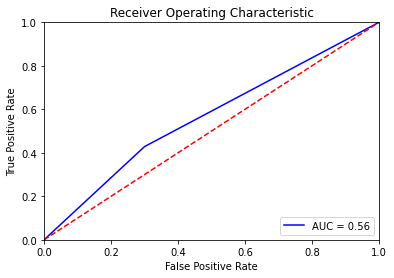

{'max_depth': 10, 'min_samples_leaf': 3}
Mejor ROC-AUC en validación cruzada: 0.550
Mejor valor del hiperparámetro: {'max_depth': 10, 'min_samples_leaf': 3}
0.6341463414634146
[[10 10]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.6341463414634146 0.6153846153846154 0.6808510638297872


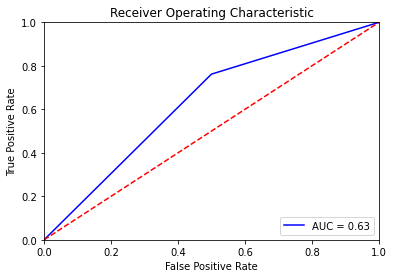

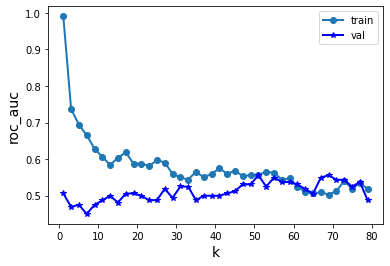

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
Valor correspondiente para el hiperparámetro: {'n_neighbors': 69}
0.6097560975609756
[[11  9]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.6097560975609756 0.6086956521739131 0.6363636363636365


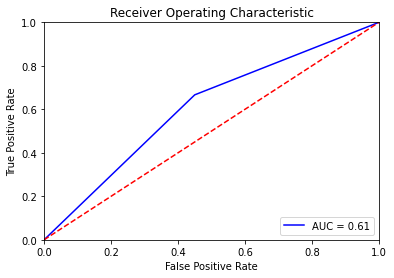

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
0.6097560975609756
[[16  4]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.6097560975609756 0.6923076923076923 0.5294117647058824


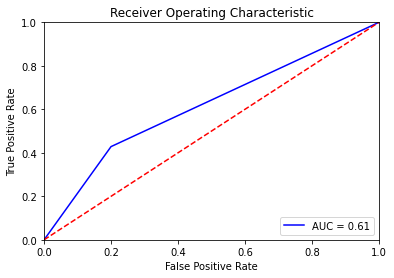

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.512
0.6097560975609756
[[16  4]
 [12  9]]
Sensibilidad, Accuracy, precision, f1-score 0.42857142857142855 0.6097560975609756 0.6923076923076923 0.5294117647058824


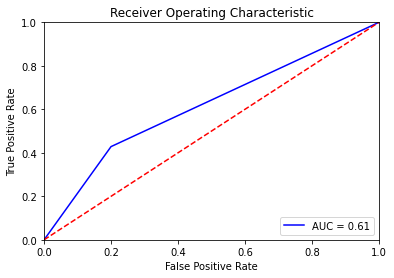

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_0,Y_test_0)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

# mlp=MLP(X_train_ec,X_test_ec,Y_train_0,Y_test_0,0)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all1[:,[0,2,3]]
X_test_ec = X_test_scaler_all1[:,[0,2,3]]

Valor correspondiente para el hiperparámetro: {'C': 0.0001, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.519
0.4878048780487805
[[19  1]
 [20  1]]
Sensibilidad, Accuracy, precision, f1-score 0.047619047619047616 0.4878048780487805 0.5 0.08695652173913042


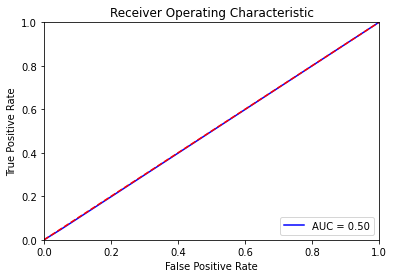

{'max_depth': 7, 'min_samples_leaf': 5}
Mejor ROC-AUC en validación cruzada: 0.556
Mejor valor del hiperparámetro: {'max_depth': 7, 'min_samples_leaf': 5}
0.5853658536585366
[[ 8 12]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5853658536585366 0.5714285714285714 0.6530612244897959


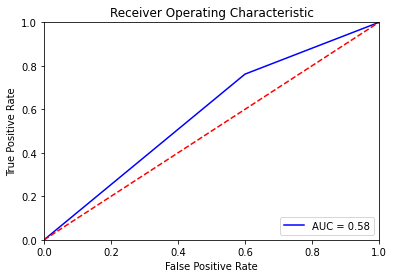

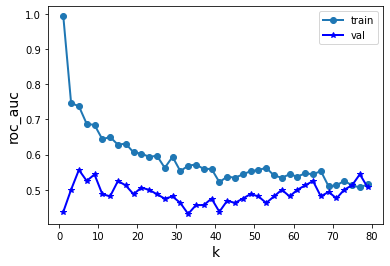

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
Valor correspondiente para el hiperparámetro: {'n_neighbors': 5}
0.6097560975609756
[[14  6]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.6097560975609756 0.6470588235294118 0.5789473684210527


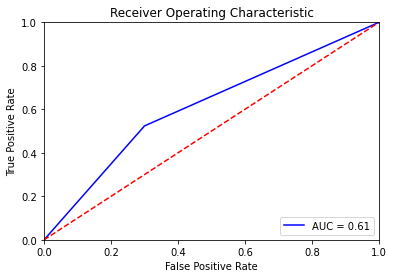

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.519
0.5121951219512195
[[19  1]
 [19  2]]
Sensibilidad, Accuracy, precision, f1-score 0.09523809523809523 0.5121951219512195 0.6666666666666666 0.16666666666666666


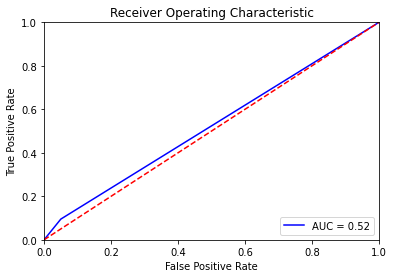

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.494
0.6341463414634146
[[ 8 12]
 [ 3 18]]
Sensibilidad, Accuracy, precision, f1-score 0.8571428571428571 0.6341463414634146 0.6 0.7058823529411764


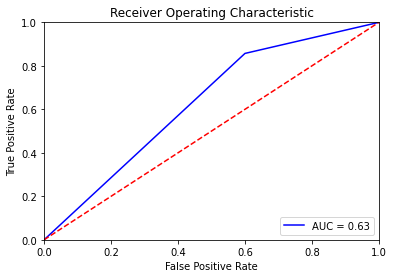

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_1,Y_test_1)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

# mlp=MLP(X_train_ec,X_test_ec,Y_train_1,Y_test_1,1)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all2[:,[0,2,3]]
X_test_ec = X_test_scaler_all2[:,[0,2,3]]


Valor correspondiente para el hiperparámetro: {'C': 1, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
0.4146341463414634
[[ 6 14]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.4146341463414634 0.44 0.4782608695652174


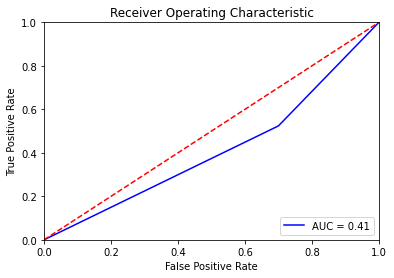

{'max_depth': 1, 'min_samples_leaf': 6}
Mejor ROC-AUC en validación cruzada: 0.581
Mejor valor del hiperparámetro: {'max_depth': 1, 'min_samples_leaf': 6}
0.43902439024390244
[[ 0 20]
 [ 3 18]]
Sensibilidad, Accuracy, precision, f1-score 0.8571428571428571 0.43902439024390244 0.47368421052631576 0.6101694915254237


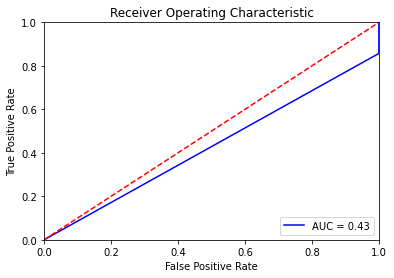

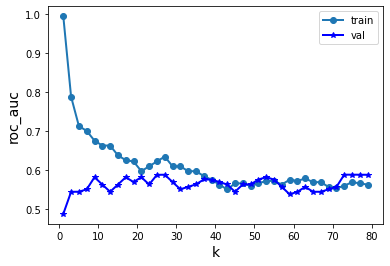

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.588
Valor correspondiente para el hiperparámetro: {'n_neighbors': 73}
0.43902439024390244
[[ 6 14]
 [ 9 12]]
Sensibilidad, Accuracy, precision, f1-score 0.5714285714285714 0.43902439024390244 0.46153846153846156 0.5106382978723405


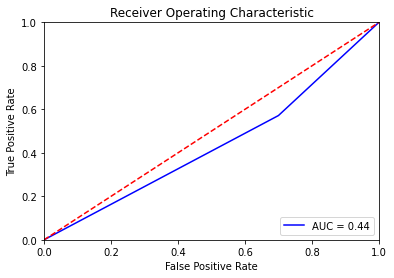

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5121951219512195
[[ 6 14]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.5121951219512195 0.5172413793103449 0.6000000000000001


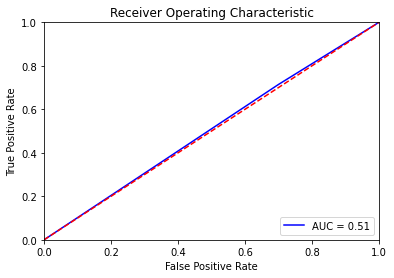

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.600
0.5365853658536586
[[ 6 14]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.5365853658536586 0.5333333333333333 0.6274509803921569


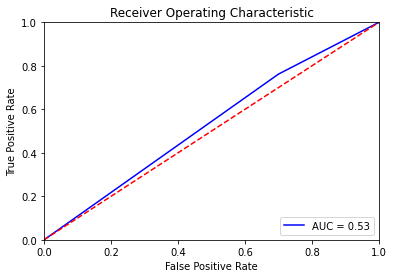

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_2,Y_test_2)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

# mlp=MLP(X_train_ec,X_test_ec,Y_train_2,Y_test_2,2)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])


In [ ]:
X.columns

Index(['VisitDaysFromEnroll', 'NumMeterCheckDayMeter', 'LastFoodIntakeCarbs',
       'Weight_mod', 'Height_mod', 'LastFoodIntakeHrs_0-<4 hours prior',
       'LastFoodIntakeHrs_4-<8 hours prior',
       'LastFoodIntakeHrs_8 or more hours prior'],
      dtype='object')

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all3[:,[0,2,3]]
X_test_ec = X_test_scaler_all3[:,[0,2,3]]


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.4634146341463415
[[18  2]
 [20  1]]
Sensibilidad, Accuracy, precision, f1-score 0.047619047619047616 0.4634146341463415 0.3333333333333333 0.08333333333333333


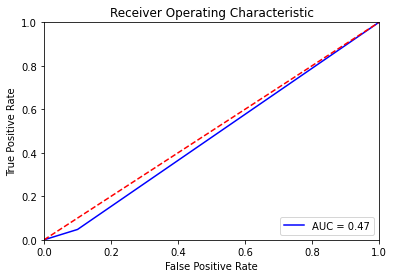

{'max_depth': 7, 'min_samples_leaf': 5}
Mejor ROC-AUC en validación cruzada: 0.544
Mejor valor del hiperparámetro: {'max_depth': 7, 'min_samples_leaf': 5}
0.4146341463414634
[[11  9]
 [15  6]]
Sensibilidad, Accuracy, precision, f1-score 0.2857142857142857 0.4146341463414634 0.4 0.3333333333333333


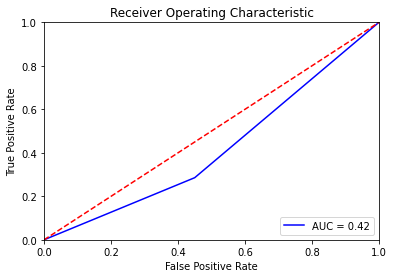

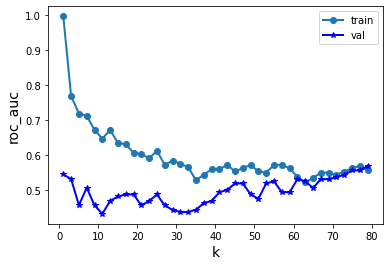

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.569
Valor correspondiente para el hiperparámetro: {'n_neighbors': 79}
0.4146341463414634
[[11  9]
 [15  6]]
Sensibilidad, Accuracy, precision, f1-score 0.2857142857142857 0.4146341463414634 0.4 0.3333333333333333


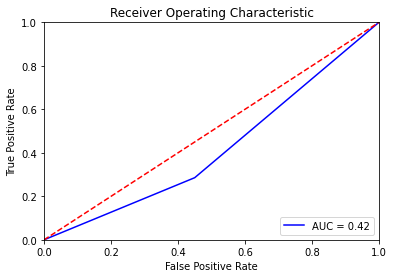

Valor correspondiente para el hiperparámetro: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
0.4634146341463415
[[11  9]
 [13  8]]
Sensibilidad, Accuracy, precision, f1-score 0.38095238095238093 0.4634146341463415 0.47058823529411764 0.42105263157894735


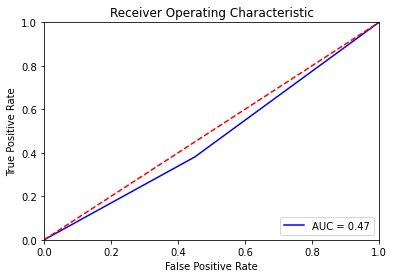

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.6585365853658537
[[ 9 11]
 [ 3 18]]
Sensibilidad, Accuracy, precision, f1-score 0.8571428571428571 0.6585365853658537 0.6206896551724138 0.7200000000000001


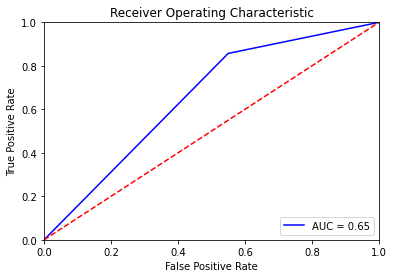

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_3,Y_test_3)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])

# mlp=MLP(X_train_ec,X_test_ec,Y_train_3,Y_test_3,3)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all4[:,[0,2,3]]
X_test_ec = X_test_scaler_all4[:,[0,2,3]]


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.5609756097560976
[[10 10]
 [ 8 13]]
Sensibilidad, Accuracy, precision, f1-score 0.6190476190476191 0.5609756097560976 0.5652173913043478 0.5909090909090909


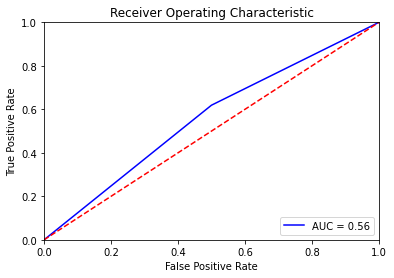

{'max_depth': 4, 'min_samples_leaf': 7}
Mejor ROC-AUC en validación cruzada: 0.488
Mejor valor del hiperparámetro: {'max_depth': 4, 'min_samples_leaf': 7}
0.4634146341463415
[[ 5 15]
 [ 7 14]]
Sensibilidad, Accuracy, precision, f1-score 0.6666666666666666 0.4634146341463415 0.4827586206896552 0.56


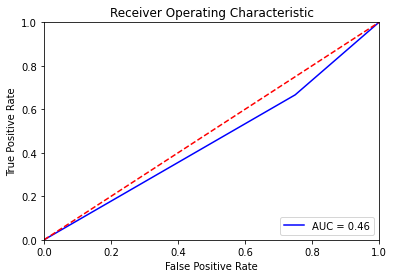

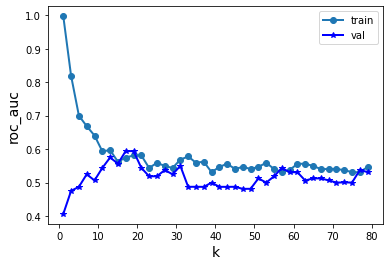

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.594
Valor correspondiente para el hiperparámetro: {'n_neighbors': 17}
0.5121951219512195
[[10 10]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.5121951219512195 0.5238095238095238 0.5238095238095238


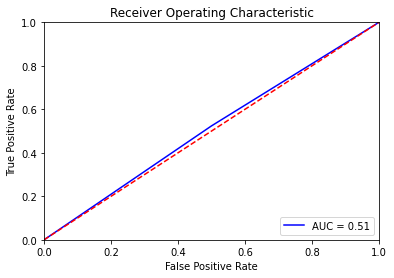

Valor correspondiente para el hiperparámetro: {'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
0.5853658536585366
[[11  9]
 [ 8 13]]
Sensibilidad, Accuracy, precision, f1-score 0.6190476190476191 0.5853658536585366 0.5909090909090909 0.6046511627906977


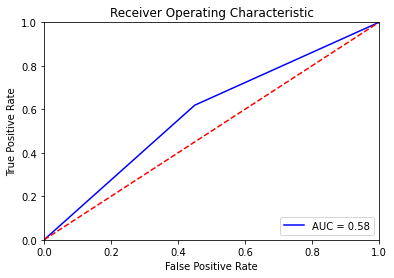

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.531
0.5609756097560976
[[ 6 14]
 [ 4 17]]
Sensibilidad, Accuracy, precision, f1-score 0.8095238095238095 0.5609756097560976 0.5483870967741935 0.6538461538461537


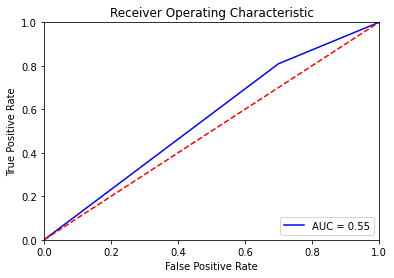

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_reg_scaler.append(r[0])
accuracy_reg_scaler.append(r[1])
precision_reg_scaler.append(r[2])
f1_reg_scaler.append(r[3])
roc_reg_scaler.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_arbol_scaler.append(a[0])
accuracy_arbol_scaler.append(a[1])
precision_arbol_scaler.append(a[2])
f1_arbol_scaler.append(a[3])
roc_arbol_scaler.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train_4,Y_test_4)
recall_knn_scaler.append(k[0])
accuracy_knn_scaler.append(k[1])
precision_knn_scaler.append(k[2])
f1_knn_scaler.append(k[3])
roc_knn_scaler.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_scaler.append(s[0])
accuracy_svc_scaler.append(s[1])
precision_svc_scaler.append(s[2])
f1_svc_scaler.append(s[3])
roc_svc_scaler.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
recall_svc_lin_scaler.append(sl[0])
accuracy_svc_lin_scaler.append(sl[1])
precision_svc_lin_scaler.append(sl[2])
f1_svc_lin_scaler.append(sl[3])
roc_svc_lin_scaler.append(s[4])


# mlp=MLP(X_train_ec,X_test_ec,Y_train_4,Y_test_4,4)
# recall_mlp_lin_scaler.append(sl[0])
# accuracy_mlp_lin_scaler.append(sl[1])
# precision_mlp_lin_scaler.append(sl[2])
# f1_mlp_lin_scaler.append(sl[3])
# roc_mlp_lin_scaler.append(s[4])

In [ ]:
def plot_mean_std_metric(df_metrics, lims, metric_name='accuracy', title_figure='mean_std_plot', flag_save_figure=False):

    fig, ax = plt.subplots(1, 1, figsize=(6.5, 4.5))

    ax.plot(df_metrics['mean'], df_metrics['model'], ls='', marker='o', color='#8000FF')

    ax.hlines(df_metrics['model'], df_metrics['mean'] - df_metrics['std'], df_metrics['mean'] + df_metrics['std'],
              label='', lw=2, color='#8000FF', ls='-')

    ax.grid(axis='x', ls='-')
    ax.grid(axis='y', ls=':', lw=1, alpha=0.5)
    ax.set(
        xlabel=metric_name,
        xlim=lims,
        title=title_figure
    )

    fig.tight_layout()

    if flag_save_figure:
        fig.savefig(title_figure, dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [ ]:
#PARA MIN MAX

In [ ]:

model_scaler=['LASSO', 'DT','Radial SVM', 'Linear SVM']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0       LASSO  0.497561  0.056887
1          DT  0.507317  0.086439
2  Radial SVM  0.536585  0.053436
3  Linear SVM  0.600000  0.045237

In [ ]:
model2_scaler=['LASSO', 'DT','Radial SVM', 'Linear SVM']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


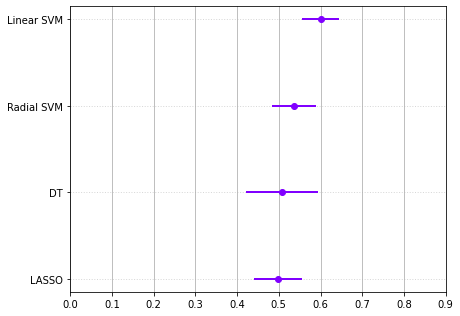

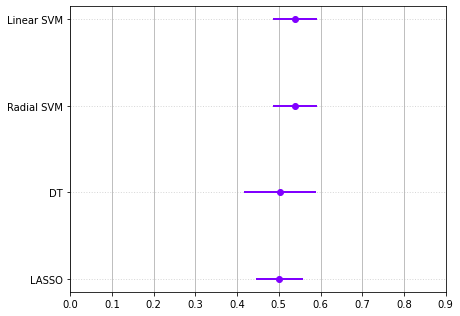

In [ ]:
#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)

plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='',title_figure='', flag_save_figure=True)


In [ ]:

model_scaler=['regresión_logistica', 'árbol', 'knn','svc','svc_lineal','mlp']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler),np.mean(accuracy_mlp_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler),np.std(accuracy_mlp_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler


In [ ]:
df_acc_scaler

model      mean       std
0  regresión_logistica  0.487805  0.055618
1                árbol  0.531707  0.039024
2                  knn  0.585366  0.055618
3                  svc  0.517073  0.107317
4           svc_lineal  0.517073  0.056467
5                  mlp  0.517073  0.056467

In [ ]:
model2_scaler=['regresión_logistica', 'árbol', 'knn','svc', 'svc_lineal','mlp']
mean2_scaler=[np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler),np.mean(roc_mlp_lin_scaler)]
std2_scaler=[np.std(roc_reg_scaler), np.std(roc_arbol_scaler),np.std(roc_knn_scaler),np.std(roc_svc_scaler),np.std(roc_svc_lin_scaler),np.std(roc_mlp_lin_scaler)]

df_roc_scaler= pd.DataFrame()
df_roc_scaler['model'] = None
df_roc_scaler['mean'] = None
df_roc_scaler['std'] = None


df_roc_scaler['model'] = model2_scaler
df_roc_scaler['mean'] = mean2_scaler
df_roc_scaler['std'] = std2_scaler


In [ ]:
model3_scaler=['regresión_logistica', 'árbol', 'knn','svc', 'svc_lineal','mlp']
mean3_scaler=[np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler),np.mean(recall_mlp_lin_scaler)]
std3_scaler=[np.std(recall_reg_scaler), np.std(recall_arbol_scaler),np.std(recall_knn_scaler),np.std(recall_svc_scaler),np.std(recall_svc_lin_scaler),np.std(recall_mlp_lin_scaler)]

df_recall_scaler= pd.DataFrame()
df_recall_scaler['model'] = None
df_recall_scaler['mean'] = None
df_recall_scaler['std'] = None


df_recall_scaler['model'] = model3_scaler
df_recall_scaler['mean'] = mean3_scaler
df_recall_scaler['std'] = std3_scaler

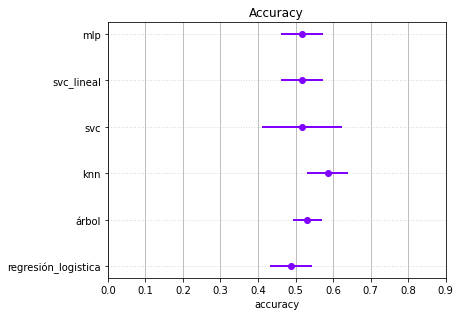

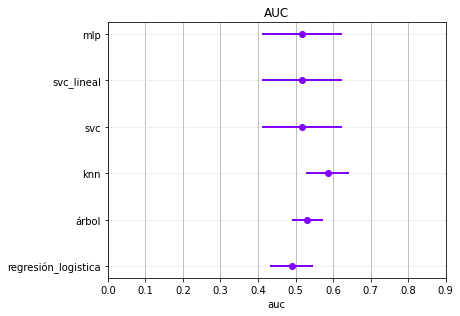

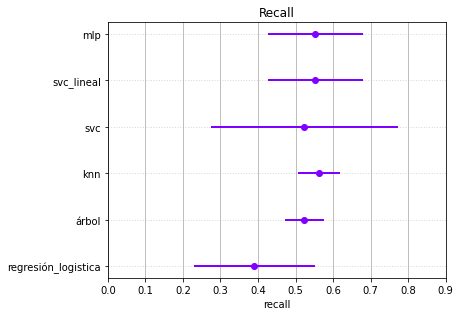

In [ ]:

#PINTAMOS GRÁFICAS PARA VARIABLES NORMALIZADAS CON STANDARD SCALER PARA ACCURACY Y ROC

plot_mean_std_metric(df_acc_scaler, lims=(0, 0.9), metric_name='accuracy',title_figure='Accuracy', flag_save_figure=True)

plot_mean_std_metric(df_roc_scaler, lims=(0, 0.9), metric_name='auc',title_figure='AUC', flag_save_figure=True)

plot_mean_std_metric(df_recall_scaler, lims=(0, 0.9), metric_name='recall',title_figure='Recall', flag_save_figure=True)


In [ ]:
model_scaler=['regresión_logistica', 'árbol', 'knn','svc','svc_lineal']
mean_scaler=[np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)]
std_scaler=[np.std(accuracy_reg_scaler), np.std(accuracy_arbol_scaler),np.std(accuracy_knn_scaler),np.std(accuracy_svc_scaler),np.std(accuracy_svc_lin_scaler)]

df_acc_scaler= pd.DataFrame()
df_acc_scaler['model'] = None
df_acc_scaler['mean'] = None
df_acc_scaler['std'] = None


df_acc_scaler['model'] = model_scaler
df_acc_scaler['mean'] = mean_scaler
df_acc_scaler['std'] = std_scaler

In [ ]:
results = pd.DataFrame()
accuracy_scaler_ec=[]
accuracy_scaler_ec.append([np.mean(accuracy_reg_scaler), np.mean(accuracy_arbol_scaler),np.mean(accuracy_knn_scaler),np.mean(accuracy_svc_scaler),np.mean(accuracy_svc_lin_scaler)])
recall_ec=[]
recall_ec.append([np.mean(recall_reg_scaler), np.mean(recall_arbol_scaler),np.mean(recall_knn_scaler),np.mean(recall_svc_scaler),np.mean(recall_svc_lin_scaler)])
f1_scaler_ec=[]
f1_scaler_ec.append([np.mean(f1_reg_scaler), np.mean(f1_arbol_scaler),np.mean(f1_knn_scaler),np.mean(f1_svc_scaler),np.mean(f1_svc_lin_scaler)])
roc_scaler_ec=[]
roc_scaler_ec.append([np.mean(roc_reg_scaler), np.mean(roc_arbol_scaler),np.mean(roc_knn_scaler),np.mean(roc_svc_scaler),np.mean(roc_svc_lin_scaler)])
precision_scaler_ec=[]
precision_scaler_ec.append([np.mean(precision_reg_scaler), np.mean(precision_arbol_scaler),np.mean(precision_knn_scaler),np.mean(precision_svc_scaler),np.mean(precision_svc_lin_scaler)])

results["Accuracy"]=accuracy_scaler_ec[0]
results["Recall"]=recall_ec[0]
results["F1-score"]=f1_scaler_ec[0]
results["Auc"]=roc_scaler_ec[0]
results["Precision"]=precision_scaler_ec[0]

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.502439  0.342857  0.354367  0.506429   0.492018
árbol                0.507317  0.571429  0.481630  0.505714   0.431765
Knn                  0.521951  0.495238  0.501755  0.522619   0.524075
SVC                  0.526829  0.400000  0.411988  0.530000   0.647566
SVC-lineal           0.600000  0.742857  0.647318  0.530000   0.598944

# ***Feature selection***

In [ ]:
# Creamos x (input) e y (output)
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y = data["BCaseControlStatus"]

X.shape, Y.shape

((201, 8), (201,))

In [ ]:
X

VisitDaysFromEnroll  NumMeterCheckDayMeter  LastFoodIntakeCarbs  \
0                      7                    NaN                 36.0   
1                      0                    NaN                  NaN   
2                      0                    NaN                  NaN   
3                      0                    NaN                  NaN   
4                     11                    NaN                  NaN   
..                   ...                    ...                  ...   
196                    0                    5.0                 30.0   
197                    0                    4.0                 45.0   
198                    0                    NaN                 45.0   
199                    0                    NaN                 80.0   
200                    0                    NaN                 40.0   

     Weight_mod  Height_mod  LastFoodIntakeHrs_0-<4 hours prior  \
0         807.3      1630.0                                   1   
1         824.5      1803.4                                   1   
2         988.7      1889.8                                   1   
3         991.4      1840.0                                   1   
4         957.8      1889.8                                   1   
..          ...         ...                                 ...   
196      1138.3      1854.2                                   1   
197       566.9      1651.0                                   1   
198       703.0      1676.0                                   1   
199       857.0      1828.0                                   1   
200       594.0      1625.0                                   1   

     LastFoodIntakeHrs_4-<8 hours prior  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
..                                  ...   
196                                   0   
197                                   0   
198                                   0   
199                                   0   
200                                   0   

     LastFoodIntakeHrs_8 or more hours prior  
0                                          0  
1                                          0  
2                                          0  
3                                          0  
4                                          0  
..                                       ...  
196                                        0  
197                                        0  
198                                        0  
199                                        0  
200                                        0  

[201 rows x 8 columns]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,stratify=Y,test_size=0.2, random_state=3)

A continuación, imputaremos los valores NaN de las variables categóricas calculando la moda  del conjunto de 
train y aplicacándolos tanto al conjunto de train como al conjunto de test:

In [ ]:
X_train.isna().sum()

VisitDaysFromEnroll                         0
NumMeterCheckDayMeter                      80
LastFoodIntakeCarbs                        36
Weight_mod                                  1
Height_mod                                  4
LastFoodIntakeHrs_0-<4 hours prior          0
LastFoodIntakeHrs_4-<8 hours prior          0
LastFoodIntakeHrs_8 or more hours prior     0
dtype: int64

# ***Sustitución de las variables numéricas a partir de Knn imputer***

>1 0.546 (0.102)
>3 0.525 (0.099)
>5 0.512 (0.092)
>7 0.550 (0.101)
>9 0.523 (0.109)
>15 0.531 (0.116)
>18 0.529 (0.111)
>21 0.517 (0.125)


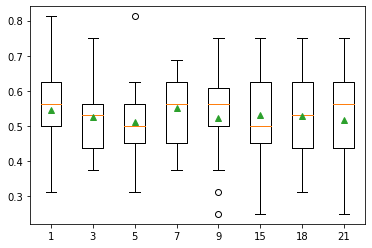

In [ ]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
	scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train)

# transform the dataset
X_train = imputer.transform(X_train)

# print total missing
print('Missing: %d' % sum(isnan(X_train).flatten()))


Missing: 0


In [ ]:
X_test=imputer.transform(X_test)


In [ ]:
print('Missing: %d' % sum(isnan(X_test).flatten()))


Missing: 0


In [ ]:
X_train_numerical=X_train[:,:5]
X_train_categorical=X_train[:,5:]
X_test_numerical=X_test[:,:5]
X_test_categorical=X_test[:,5:]

In [ ]:
#CON MIN-MAX

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X_train_numerical)
X_scaler_train_numerical = scaler.transform(X_train_numerical) 
X_scaler_test_numerical=scaler.transform(X_test_numerical)

In [ ]:
X_train_scaler_all=np.c_[X_scaler_train_numerical,X_train_categorical]
X_test_scaler_all=np.c_[X_scaler_test_numerical,X_test_categorical]


In [ ]:
X_train_scaler_all.shape

(160, 8)

# ***Feature selection***

# ***Métodos *embedded****

Ranking de Características:
1. Característica 4 (0.239436)
2. Característica 3 (0.232251)
3. Característica 1 (0.225621)
4. Característica 2 (0.202293)
5. Característica 0 (0.072868)
6. Característica 5 (0.011555)
7. Característica 7 (0.008946)
8. Característica 6 (0.007031)


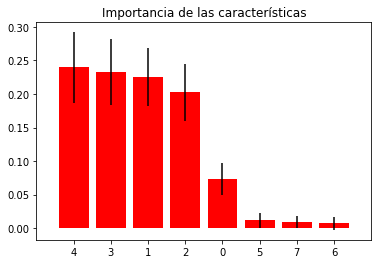

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_scaler_all, Y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all.shape[1]])
plt.show()

CARACTERÍSTICAS MÁS IMPORTANTES:
* NumMeterCheckDayMeter	
*  LastFoodIntakeCarbs
*	Weight_mod	
* Height_mod

In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all[:,[1,2,3,4]]
X_test_ec = X_test_scaler_all[:,[1,2,3,4]]


A continuación, evaluamos los distintos modelos con únicamente las características seleccionadas:

In [ ]:
recall_ec=[]
accuracy_scaler_ec=[]
precision_scaler_ec=[]
f1_scaler_ec=[]
roc_scaler_ec=[]

Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.500
0.4878048780487805
[[20  0]
 [21  0]]
Sensibilidad, Accuracy, precision, f1-score 0.0 0.4878048780487805 0.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


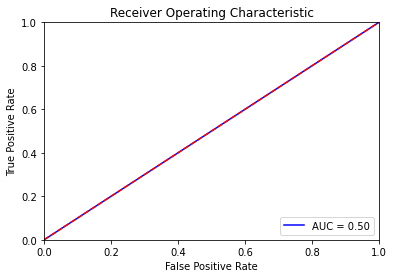

{'max_depth': 6}


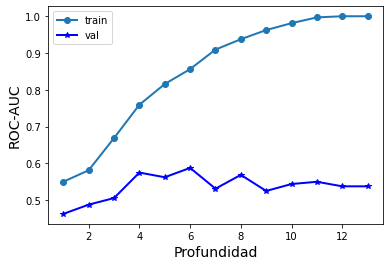

Mejor ROC-AUC en validación cruzada: 0.588
Mejor valor del hiperparámetro: {'max_depth': 6}
0.4878048780487805
[[ 7 13]
 [ 8 13]]
Sensibilidad, Accuracy, precision, f1-score 0.6190476190476191 0.4878048780487805 0.5 0.5531914893617021


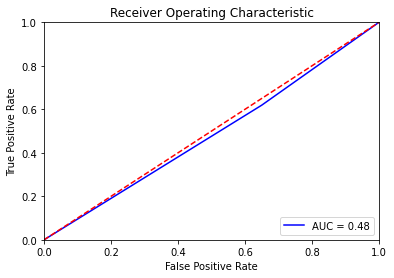

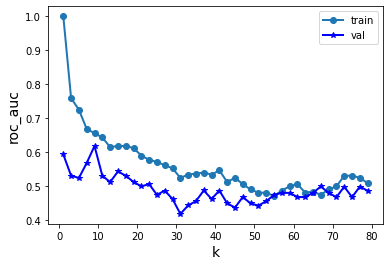

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.619
Valor correspondiente para el hiperparámetro: {'n_neighbors': 9}
0.7560975609756098
[[15  5]
 [ 5 16]]
Sensibilidad, Accuracy, precision, f1-score 0.7619047619047619 0.7560975609756098 0.7619047619047619 0.7619047619047619


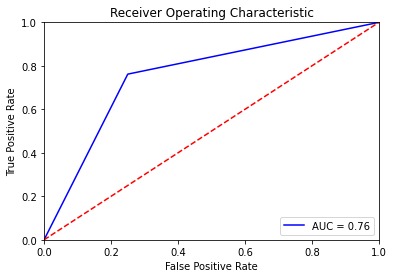

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.494
0.6341463414634146
[[16  4]
 [11 10]]
Sensibilidad, Accuracy, precision, f1-score 0.47619047619047616 0.6341463414634146 0.7142857142857143 0.5714285714285714


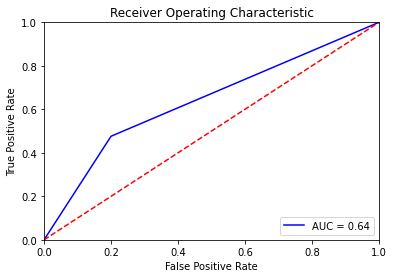

Valor correspondiente para el hiperparámetro: {'C': 1000, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.506
0.6585365853658537
[[16  4]
 [10 11]]
Sensibilidad, Accuracy, precision, f1-score 0.5238095238095238 0.6585365853658537 0.7333333333333333 0.611111111111111


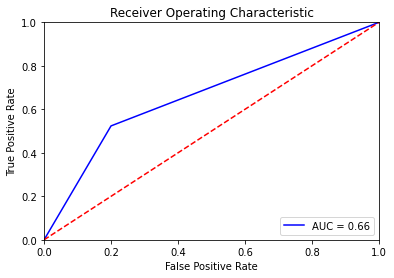

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(r[0])
accuracy_scaler_ec.append(r[1])
precision_scaler_ec.append(r[2])
f1_scaler_ec.append(r[3])
roc_scaler_ec.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(a[0])
accuracy_scaler_ec.append(a[1])
precision_scaler_ec.append(a[2])
f1_scaler_ec.append(a[3])
roc_scaler_ec.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train,Y_test)
recall_ec.append(k[0])
accuracy_scaler_ec.append(k[1])
precision_scaler_ec.append(k[2])
f1_scaler_ec.append(k[3])
roc_scaler_ec.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(s[0])
accuracy_scaler_ec.append(s[1])
precision_scaler_ec.append(s[2])
f1_scaler_ec.append(s[3])
roc_scaler_ec.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(sl[0])
accuracy_scaler_ec.append(sl[1])
precision_scaler_ec.append(sl[2])
f1_scaler_ec.append(sl[3])
roc_scaler_ec.append(s[4])


In [ ]:
results = pd.DataFrame()

results["Accuracy"]=accuracy_scaler_ec
results["Recall"]=recall_ec
results["F1-score"]=f1_scaler_ec
results["Auc"]=roc_scaler_ec
results["Precision"]=precision_scaler_ec

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.487805  0.000000  0.000000  0.500000   0.000000
árbol                0.487805  0.619048  0.553191  0.484524   0.500000
Knn                  0.756098  0.761905  0.761905  0.755952   0.761905
SVC                  0.634146  0.476190  0.571429  0.638095   0.714286
SVC-lineal           0.658537  0.523810  0.611111  0.638095   0.733333

# ***Método filter***

A continuación, a partir de validación cruzada con 3 folds, obtenemos el fold1, fold2 y fold3:

In [ ]:
# Convertimos el objeto dataframe en un array (mayor velocidad de cómputo)
# # array = data.values
X_train_scaler_all=np.array(X_train_scaler_all)
X_test_scaler_all=np.array(X_test_scaler_all)
Y_train=(np.array(Y_train))
Y_test=np.array(Y_test)
# # Separamos en variables de entrada al modelo (8 primeras) y de salida (1 variable) 
# X = array[:,1:59]
# Y = array[:,0]

names=[]
for i in range(19):
  names.append(str(i))
# names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11','f12','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13']
# names = data.columns[1:]
names

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18']

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)  # In this case, k=3, 

for train, val in kf.split(X_train_scaler_all):
  # print("%s %s" % (train, val))
  # print(len(val))
  # print(val)
  if (len(val)==53) and (val[0]==107):
    fold3=list(val)
    print(len(fold3))
    print(fold3)
  if (len(val)==54):
    fold1=list(val)
    print(len(fold1))
    print(fold1)
  if (len(val)==53) and (val[0]==54):
    fold2=list(val)
    print(len(fold2))
    print(fold2)

54
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
53
[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106]
53
[107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]


# ***COMBINACIÓN PRIMERA***


En esta primera combinación utilizaremos fold1 y fold2 para entrenar, y fold3 para validar:

In [ ]:
X_entrenamiento=np.concatenate((X_train_scaler_all[fold1], X_train_scaler_all[fold2]))
Y_entrenamiento=np.concatenate((Y_train[fold1], Y_train[fold2]))
X_val=X_train_scaler_all[fold3]
Y_val=Y_train[fold3]

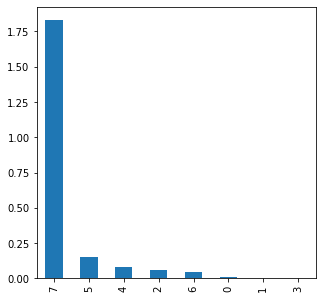

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

bestfeatures_Chi2 = SelectKBest(score_func=chi2, k='all')
fit_Chi2 = bestfeatures_Chi2.fit(X_entrenamiento, Y_entrenamiento)
fit_Chi2 = pd.Series(fit_Chi2.scores_)
fit_Chi2.sort_values(ascending=False)

fit_Chi2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(5,5))
# # df, ax = plt.subplots(figsize=(50, 8))
# plt.title("Chi2 considerando subconjunto X train")

# ***COMBINACIÓN 2***

En esta combinación usaremos fold1 y fold3 para entrenar y usaremos fold 2 para validar:

In [ ]:
X_entrenamiento2=np.concatenate((X_train_scaler_all[fold1], X_train_scaler_all[fold3]))
Y_entrenamiento2=np.concatenate((Y_train[fold1], Y_train[fold3]))
X_val2=X_train_scaler_all[fold2]
Y_val2=Y_train[fold2]

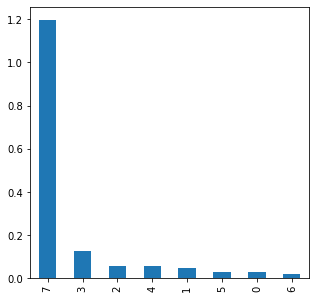

In [ ]:
bestfeatures_Chi2_2 = SelectKBest(score_func=chi2, k='all')
fit_Chi2_2 = bestfeatures_Chi2_2.fit(X_entrenamiento2, Y_entrenamiento2)
fit_Chi2_2 = pd.Series(fit_Chi2_2.scores_)
fit_Chi2_2.sort_values(ascending=False)

fit_Chi2_2.sort_values(ascending=False).plot.bar(figsize=(5, 5))

# # gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2_2.scores_.sort_values})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0,figsize=(50,8))
# plt.title("Estadístico chi cuadrado considerando subconjunto X train")

# ***COMBINACIÓN 3***

En este último caso, utilizaremos el fold 2 y fold3 para entrenar y el fold 1 para validar:

In [ ]:
X_entrenamiento3=np.concatenate((X_train_scaler_all[fold2], X_train_scaler_all[fold3]))
Y_entrenamiento3=np.concatenate((Y_train[fold2], Y_train[fold3]))
X_val3=X_train_scaler_all[fold1]
Y_val3=Y_train[fold1]

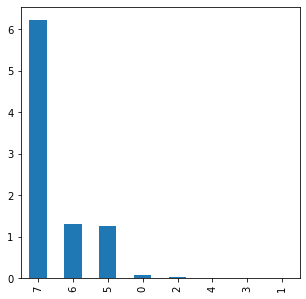

In [ ]:
bestfeatures_Chi2_3 = SelectKBest(score_func=chi2, k='all')
fit_Chi2_3 = bestfeatures_Chi2_3.fit(X_entrenamiento3, Y_entrenamiento3)
fit_Chi2_3 = pd.Series(fit_Chi2_3.scores_)
fit_Chi2_3.sort_values(ascending=False)

fit_Chi2_3.sort_values(ascending=False).plot.bar(figsize=(5, 5))
# gráfico de barras utilizando matplotlib
# df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2_3.scores_})
# ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(50,8))
# plt.title("Estadístico chi cuadrado considerando subconjunto X train")

In [ ]:
X

VisitDaysFromEnroll  NumMeterCheckDayMeter  LastFoodIntakeCarbs  \
0                      7                    NaN                 36.0   
1                      0                    NaN                  NaN   
2                      0                    NaN                  NaN   
3                      0                    NaN                  NaN   
4                     11                    NaN                  NaN   
..                   ...                    ...                  ...   
196                    0                    5.0                 30.0   
197                    0                    4.0                 45.0   
198                    0                    NaN                 45.0   
199                    0                    NaN                 80.0   
200                    0                    NaN                 40.0   

     Weight_mod  Height_mod  LastFoodIntakeHrs_0-<4 hours prior  \
0         807.3      1630.0                                   1   
1         824.5      1803.4                                   1   
2         988.7      1889.8                                   1   
3         991.4      1840.0                                   1   
4         957.8      1889.8                                   1   
..          ...         ...                                 ...   
196      1138.3      1854.2                                   1   
197       566.9      1651.0                                   1   
198       703.0      1676.0                                   1   
199       857.0      1828.0                                   1   
200       594.0      1625.0                                   1   

     LastFoodIntakeHrs_4-<8 hours prior  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
..                                  ...   
196                                   0   
197                                   0   
198                                   0   
199                                   0   
200                                   0   

     LastFoodIntakeHrs_8 or more hours prior  
0                                          0  
1                                          0  
2                                          0  
3                                          0  
4                                          0  
..                                       ...  
196                                        0  
197                                        0  
198                                        0  
199                                        0  
200                                        0  

[201 rows x 8 columns]

* LastFoodIntakeHrs_8 or more hours prior
* LastFoodIntakeHrs_0-<4 hours prior	


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all[:,[7,5]]
X_test_ec = X_test_scaler_all[:,[7,5]]


A continuación, evaluamos los distintos modelos con únicamente las características seleccionadas:

In [ ]:
recall_ec=[]
accuracy_scaler_ec=[]
precision_scaler_ec=[]
f1_scaler_ec=[]
roc_scaler_ec=[]

Valor correspondiente para el hiperparámetro: {'C': 1e-07, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.537
0.4146341463414634
[[ 2 18]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.4146341463414634 0.45454545454545453 0.5555555555555556


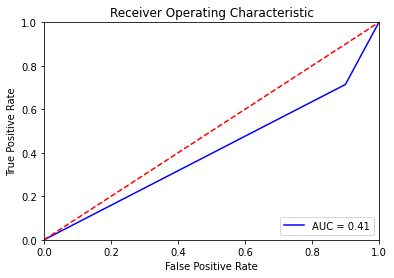

{'max_depth': 2}


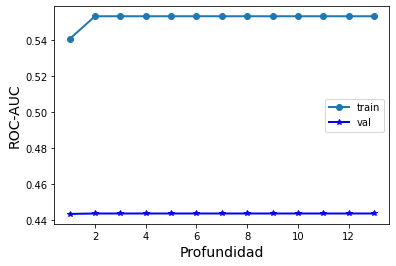

Mejor ROC-AUC en validación cruzada: 0.444
Mejor valor del hiperparámetro: {'max_depth': 2}
0.4146341463414634
[[ 2 18]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.4146341463414634 0.45454545454545453 0.5555555555555556


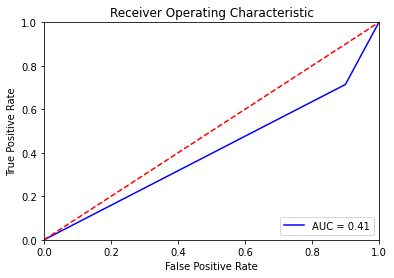

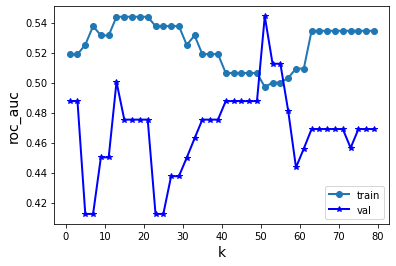

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.544
Valor correspondiente para el hiperparámetro: {'n_neighbors': 51}
0.5121951219512195
[[19  1]
 [19  2]]
Sensibilidad, Accuracy, precision, f1-score 0.09523809523809523 0.5121951219512195 0.6666666666666666 0.16666666666666666


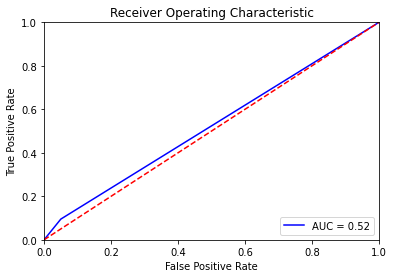

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 1e-05, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
0.4878048780487805
[[ 1 19]
 [ 2 19]]
Sensibilidad, Accuracy, precision, f1-score 0.9047619047619048 0.4878048780487805 0.5 0.6440677966101696


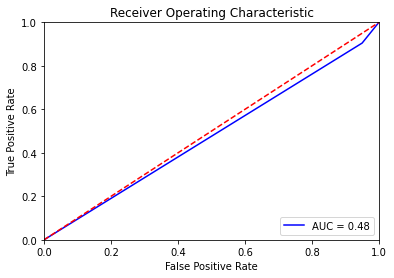

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.519
0.4146341463414634
[[ 2 18]
 [ 6 15]]
Sensibilidad, Accuracy, precision, f1-score 0.7142857142857143 0.4146341463414634 0.45454545454545453 0.5555555555555556


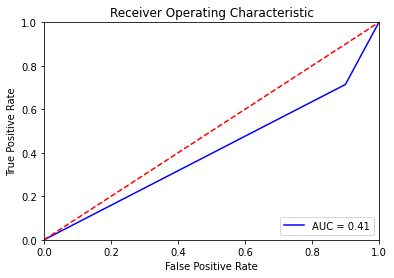

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(r[0])
accuracy_scaler_ec.append(r[1])
precision_scaler_ec.append(r[2])
f1_scaler_ec.append(r[3])
roc_scaler_ec.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(a[0])
accuracy_scaler_ec.append(a[1])
precision_scaler_ec.append(a[2])
f1_scaler_ec.append(a[3])
roc_scaler_ec.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train,Y_test)
recall_ec.append(k[0])
accuracy_scaler_ec.append(k[1])
precision_scaler_ec.append(k[2])
f1_scaler_ec.append(k[3])
roc_scaler_ec.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(s[0])
accuracy_scaler_ec.append(s[1])
precision_scaler_ec.append(s[2])
f1_scaler_ec.append(s[3])
roc_scaler_ec.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(sl[0])
accuracy_scaler_ec.append(sl[1])
precision_scaler_ec.append(sl[2])
f1_scaler_ec.append(sl[3])
roc_scaler_ec.append(s[4])


In [ ]:
results = pd.DataFrame()

results["Accuracy"]=accuracy_scaler_ec
results["Recall"]=recall_ec
results["F1-score"]=f1_scaler_ec
results["Auc"]=roc_scaler_ec
results["Precision"]=precision_scaler_ec

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.414634  0.714286  0.555556  0.407143   0.454545
árbol                0.414634  0.714286  0.555556  0.407143   0.454545
Knn                  0.512195  0.095238  0.166667  0.522619   0.666667
SVC                  0.487805  0.904762  0.644068  0.477381   0.500000
SVC-lineal           0.414634  0.714286  0.555556  0.477381   0.454545

* LastFoodIntakeHrs_8 or more hours prior


In [ ]:
# from sklearn.model_selection import train_test_split, cross_val_score

X_train_ec = X_train_scaler_all[:,[7]]
X_test_ec = X_test_scaler_all[:,[7]]


A continuación, evaluamos los distintos modelos con únicamente las características seleccionadas:

In [ ]:
recall_ec=[]
accuracy_scaler_ec=[]
precision_scaler_ec=[]
f1_scaler_ec=[]
roc_scaler_ec=[]

Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.500
0.4878048780487805
[[20  0]
 [21  0]]
Sensibilidad, Accuracy, precision, f1-score 0.0 0.4878048780487805 0.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


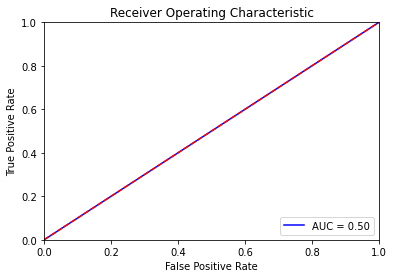

{'max_depth': 1}


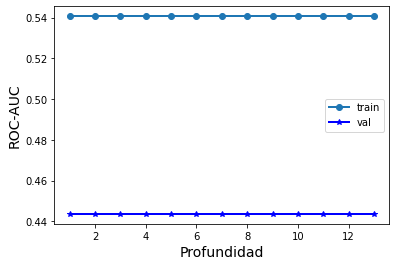

Mejor ROC-AUC en validación cruzada: 0.444
Mejor valor del hiperparámetro: {'max_depth': 1}
0.4878048780487805
[[ 1 19]
 [ 2 19]]
Sensibilidad, Accuracy, precision, f1-score 0.9047619047619048 0.4878048780487805 0.5 0.6440677966101696


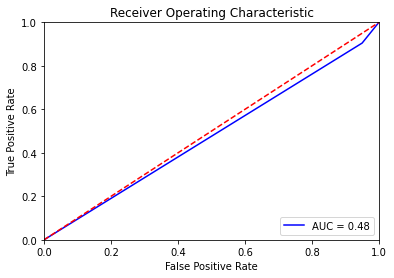

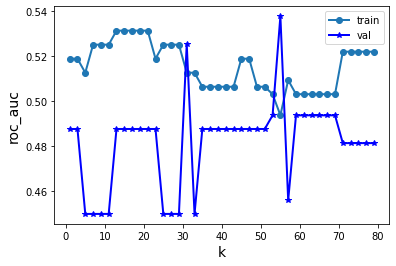

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.538
Valor correspondiente para el hiperparámetro: {'n_neighbors': 55}
0.4878048780487805
[[20  0]
 [21  0]]
Sensibilidad, Accuracy, precision, f1-score 0.0 0.4878048780487805 0.0 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


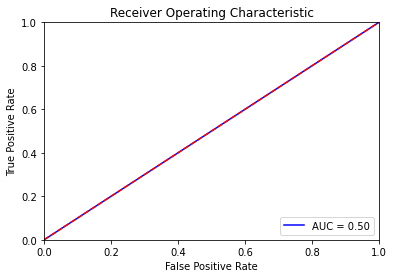

Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
0.4878048780487805
[[ 1 19]
 [ 2 19]]
Sensibilidad, Accuracy, precision, f1-score 0.9047619047619048 0.4878048780487805 0.5 0.6440677966101696


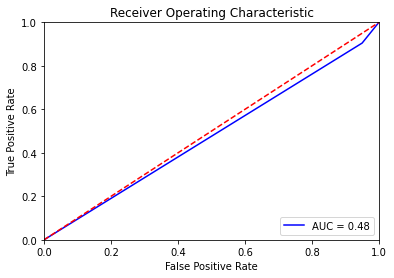

Valor correspondiente para el hiperparámetro: {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.525
0.4878048780487805
[[ 1 19]
 [ 2 19]]
Sensibilidad, Accuracy, precision, f1-score 0.9047619047619048 0.4878048780487805 0.5 0.6440677966101696


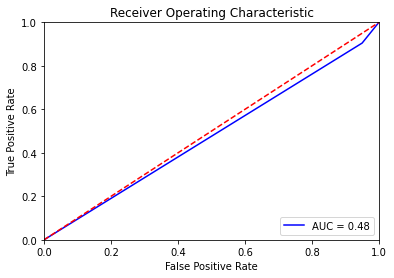

In [ ]:
#VARIABLES NORMALIZADAS CON MIN-MAX

r=regresion_logistica(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(r[0])
accuracy_scaler_ec.append(r[1])
precision_scaler_ec.append(r[2])
f1_scaler_ec.append(r[3])
roc_scaler_ec.append(r[4])

a=decisionTree(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(a[0])
accuracy_scaler_ec.append(a[1])
precision_scaler_ec.append(a[2])
f1_scaler_ec.append(a[3])
roc_scaler_ec.append(a[4])

k=knn(X_train_ec,X_test_ec,Y_train,Y_test)
recall_ec.append(k[0])
accuracy_scaler_ec.append(k[1])
precision_scaler_ec.append(k[2])
f1_scaler_ec.append(k[3])
roc_scaler_ec.append(k[4])

s=svc(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(s[0])
accuracy_scaler_ec.append(s[1])
precision_scaler_ec.append(s[2])
f1_scaler_ec.append(s[3])
roc_scaler_ec.append(s[4])

sl=svc_lineal(X_train_ec,X_test_ec,Y_train,Y_test,3)
recall_ec.append(sl[0])
accuracy_scaler_ec.append(sl[1])
precision_scaler_ec.append(sl[2])
f1_scaler_ec.append(sl[3])
roc_scaler_ec.append(s[4])


In [ ]:
results = pd.DataFrame()

results["Accuracy"]=accuracy_scaler_ec
results["Recall"]=recall_ec
results["F1-score"]=f1_scaler_ec
results["Auc"]=roc_scaler_ec
results["Precision"]=precision_scaler_ec

#results
results["Modelos"] = ["Regresión logística","árbol", "Knn","SVC","SVC-lineal"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc  Precision
Modelos                                                               
Regresión logística  0.487805  0.000000  0.000000  0.500000        0.0
árbol                0.487805  0.904762  0.644068  0.477381        0.5
Knn                  0.487805  0.000000  0.000000  0.500000        0.0
SVC                  0.487805  0.904762  0.644068  0.477381        0.5
SVC-lineal           0.487805  0.904762  0.644068  0.477381        0.5

# ***RANDOM FOREST***

In [ ]:

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


In [ ]:
feat_labels=X.columns

('VisitDaysFromEnroll', 0.06477557402596502)
('NumMeterCheckDayMeter', 0.19957851049703915)
('LastFoodIntakeCarbs', 0.20236267658648127)
('Weight_mod', 0.23531416182307632)
('Height_mod', 0.24399812609630908)
('LastFoodIntakeHrs_0-<4 hours prior', 0.022629495238811106)
('LastFoodIntakeHrs_4-<8 hours prior', 0.01579402260791684)
('LastFoodIntakeHrs_8 or more hours prior', 0.015547433124401386)
Ranking de Características:
1. Característica 4 (0.243998)
2. Característica 3 (0.235314)
3. Característica 2 (0.202363)
4. Característica 1 (0.199579)
5. Característica 0 (0.064776)
6. Característica 5 (0.022629)
7. Característica 6 (0.015794)
8. Característica 7 (0.015547)


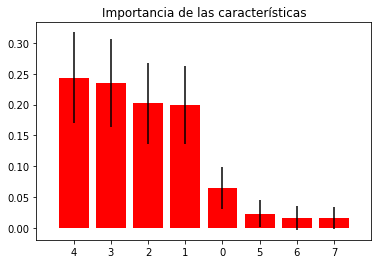

In [ ]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train_scaler_all, Y_train)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_scaler_all.shape[1]):
  print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_scaler_all.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_scaler_all.shape[1]), indices)
plt.xlim([-1, X_train_scaler_all.shape[1]])
plt.show()


In [ ]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(X_train_scaler_all, Y_train)

In [ ]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

HighBGLevTakeAction
PtCurrA1cGoal


# ***CLASIFICACIÓN***

# ***REGRESIÓN LOGÍSTICA CON REGULARIZACIÓN***

In [ ]:
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y= data["BCaseControlStatus"]

X.shape, Y.shape

((201, 6), (201,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [ ]:
print(X_train.shape, X_test.shape)

(160, 6) (41, 6)


In [ ]:
X_train.isna().sum()

VisitDaysFromEnroll       0
NumMeterCheckDayMeter    75
LastFoodIntakeHrs         8
LastFoodIntakeCarbs      41
Weight_mod                1
Height_mod                4
dtype: int64

In [ ]:
X_test.isna().sum()

VisitDaysFromEnroll       0
NumMeterCheckDayMeter    23
LastFoodIntakeHrs         2
LastFoodIntakeCarbs       8
Weight_mod                0
Height_mod                0
dtype: int64

# ***REEMPLAZO DE VALORES NULOS CON KNN***

In [ ]:
from statistics import mode
data["LastFoodIntakeHrs"].replace(np.nan, mode(X_train["LastFoodIntakeHrs"]), inplace=True)


In [ ]:
data.isna().sum()

BCaseControlStatus        0
VisitDaysFromEnroll       0
NumMeterCheckDayMeter    98
LastFoodIntakeHrs         0
LastFoodIntakeCarbs      49
Weight_mod                1
Height_mod                4
dtype: int64

Entonces, a continuación, aplicamos one-hot encoding:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def var_categ(variable):
  global data
  enc = OneHotEncoder(handle_unknown='ignore')
  enc_data = pd.DataFrame(enc.fit_transform(data[[variable]]).toarray())
  data[variable].value_counts() # Identifity categories
  enc_data.describe()
  #Solo incluye categorías que tengan datos
  #aunque no tengan datos
  data = pd.concat([data,pd.get_dummies(data[variable], prefix=variable)],axis=1)

In [ ]:
var_categ("LastFoodIntakeHrs")

In [ ]:
data.head()

BCaseControlStatus  VisitDaysFromEnroll  NumMeterCheckDayMeter  \
0                   1                    7                    NaN   
1                   0                    0                    NaN   
2                   1                    0                    NaN   
3                   0                    0                    NaN   
4                   1                   11                    NaN   

  LastFoodIntakeHrs  LastFoodIntakeCarbs  Weight_mod  Height_mod  \
0  0-<4 hours prior                 36.0  807.256236     1630.00   
1  0-<4 hours prior                  NaN  824.489796     1803.40   
2  0-<4 hours prior                  NaN  988.662132     1889.76   
3  0-<4 hours prior                  NaN  991.383220     1840.00   
4  0-<4 hours prior                  NaN  957.823129     1889.76   

   LastFoodIntakeHrs_0-<4 hours prior  LastFoodIntakeHrs_4-<8 hours prior  \
0                                   1                                   0   
1                                   1                                   0   
2                                   1                                   0   
3                                   1                                   0   
4                                   1                                   0   

   LastFoodIntakeHrs_8 or more hours prior  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0

In [ ]:
data.drop(['LastFoodIntakeHrs'], axis=1, inplace=True)


In [ ]:
data.head()

BCaseControlStatus  VisitDaysFromEnroll  NumMeterCheckDayMeter  \
0                   1                    7                    NaN   
1                   0                    0                    NaN   
2                   1                    0                    NaN   
3                   0                    0                    NaN   
4                   1                   11                    NaN   

   LastFoodIntakeCarbs  Weight_mod  Height_mod  \
0                 36.0  807.256236     1630.00   
1                  NaN  824.489796     1803.40   
2                  NaN  988.662132     1889.76   
3                  NaN  991.383220     1840.00   
4                  NaN  957.823129     1889.76   

   LastFoodIntakeHrs_0-<4 hours prior  LastFoodIntakeHrs_4-<8 hours prior  \
0                                   1                                   0   
1                                   1                                   0   
2                                   1                                   0   
3                                   1                                   0   
4                                   1                                   0   

   LastFoodIntakeHrs_8 or more hours prior  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0

Ahora, ya volvemos a dividir en entrenamiento y test:

In [ ]:
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y= data["BCaseControlStatus"]

X.shape, Y.shape

((201, 8), (201,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

A continuación, trataremos los valores nulos del resto de variables, que ya no son categóricas, a partir de la media y moda del conjunto de entrenamiento y aplicándolo tanto al conjunto de entrenamiento como al conjunto de test:

In [ ]:
X_train.isna().sum()

VisitDaysFromEnroll                         0
NumMeterCheckDayMeter                      75
LastFoodIntakeCarbs                        41
Weight_mod                                  1
Height_mod                                  4
LastFoodIntakeHrs_0-<4 hours prior          0
LastFoodIntakeHrs_4-<8 hours prior          0
LastFoodIntakeHrs_8 or more hours prior     0
dtype: int64

In [ ]:
X_test.isna().sum()

VisitDaysFromEnroll                         0
NumMeterCheckDayMeter                      23
LastFoodIntakeCarbs                         8
Weight_mod                                  0
Height_mod                                  0
LastFoodIntakeHrs_0-<4 hours prior          0
LastFoodIntakeHrs_4-<8 hours prior          0
LastFoodIntakeHrs_8 or more hours prior     0
dtype: int64

>1 0.481 (0.125)
>3 0.515 (0.107)
>5 0.527 (0.118)
>7 0.527 (0.121)
>9 0.569 (0.126)
>15 0.544 (0.105)
>18 0.546 (0.091)
>21 0.540 (0.114)


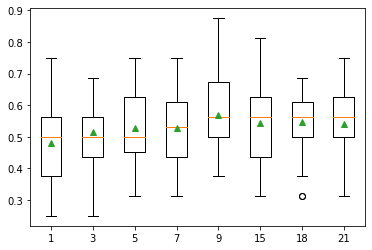

In [ ]:

from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]
for s in strategies:
	# create the modeling pipeline
	pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', RandomForestClassifier())])
	# evaluate the model
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
	scores = cross_val_score(pipeline, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1)
	# store results
	results.append(scores)
	print('>%s %.3f (%.3f)' % (s, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

# define imputer
imputer = KNNImputer(n_neighbors=9, weights='uniform', metric='nan_euclidean')

imputer.fit(X_train)

# transform the dataset
X_train = imputer.transform(X_train)

# print total missing
print('Missing: %d' % sum(isnan(X_train).flatten()))


Missing: 0


In [ ]:
X_test=imputer.transform(X_test)


In [ ]:
print('Missing: %d' % sum(isnan(X_test).flatten()))


Missing: 0


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


std_all2 = preprocessing.StandardScaler().fit(X_train)
X_std_train2 = std_all2.transform(X_train) #Tendriamos todas las características estandarizadas
X_std_test2 = std_all2.transform(X_test)

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_std_train2, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))






Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.547


A continuación, ya construimos nuestro modelo con los parámetros obtenidos a partir de validación cruzada y es con un valor de alpha de 0.0001 y un modelo ridge. Así obtenemos los resultados obtenidos en el conjunto de test:

In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_std_train2, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_std_test2)




A continuación, vamos a calcular diferentes figuras de mérito para ver que resultados obtenemos en test. Comenzamos con la matriz de confusión:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[ 9 14]
 [10  8]]
tn: 9, fp:14, fn:10, tp:8
Accuracy: 0.4146341463414634
                  precision    recall  f1-score   support

Paciente control       0.47      0.39      0.43        23
   Paciente caso       0.36      0.44      0.40        18

        accuracy                           0.41        41
       macro avg       0.42      0.42      0.41        41
    weighted avg       0.43      0.41      0.42        41

Sensibilidad: 0.4444444444444444


Calculamos la ROC y la AUC:

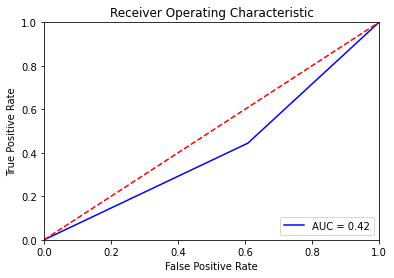

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy=[]
res_recall=[]
res_f1=[]
res_roc=[]

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4146341463414634
La matriz de confusión obtenida: [[ 9 14]
 [10  8]]
El valor de f1_score obtenido: 0.39999999999999997
El valor de recall es 0.4444444444444444


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

Obtenemos un valor de AUC muy cercano a la curva ROC, por lo que no está haciendo una buena clasificación de los pacientes

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,41,2)}
  k_grid = np.array(range(1,41,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_std_train2, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

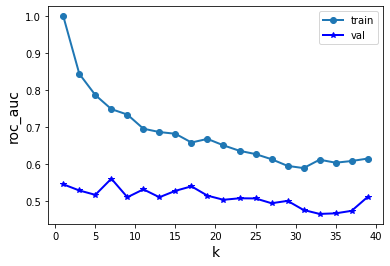

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.560
Valor correspondiente para el hiperparámetro: {'n_neighbors': 7}


In [ ]:
knn('roc_auc')

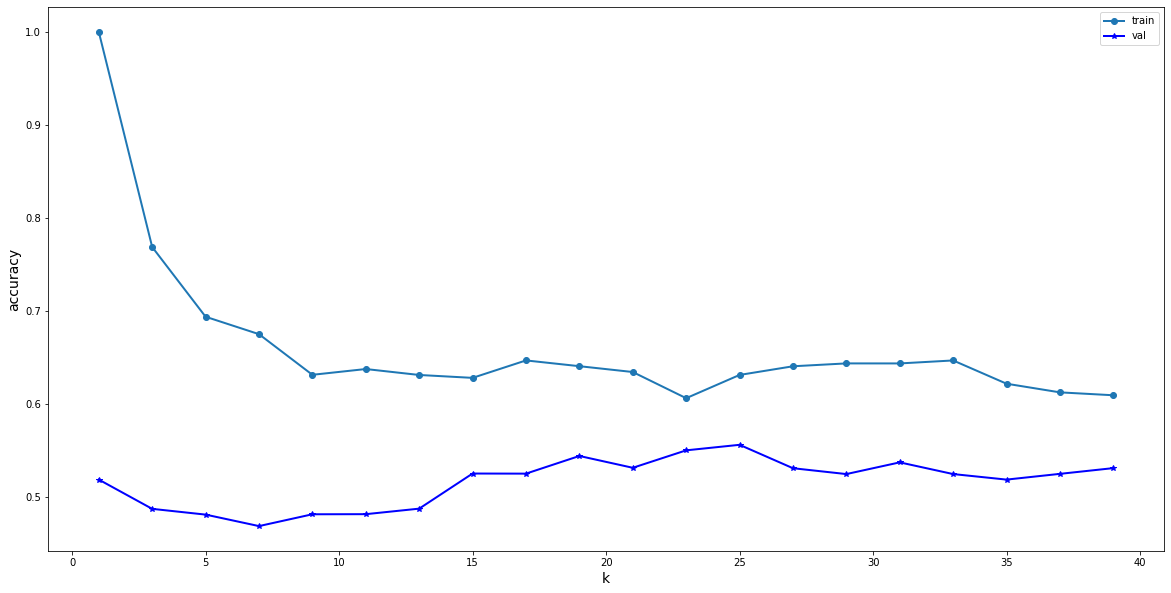

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.556
Valor correspondiente para el hiperparámetro: {'n_neighbors': 25}


In [ ]:
knn('accuracy')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 7)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_std_train2, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_std_test2)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
MSE1_score = mean_squared_error(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)
# print("El error cuadrático medio", MSE1_score) 

El valor de accuracy obtenido: 0.6585365853658537
La matriz de confusión obtenida: [[15  8]
 [ 6 12]]
El valor de f1_score obtenido: 0.631578947368421
El valor de recall es 0.6666666666666666


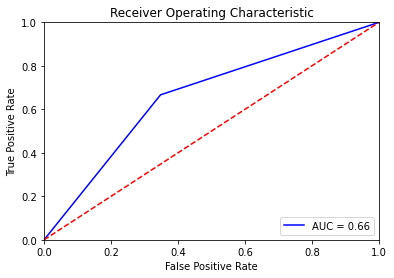

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.6585365853658537
La matriz de confusión obtenida: [[15  8]
 [ 6 12]]
El valor de f1_score obtenido: 0.631578947368421
El valor de recall es 0.6666666666666666


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

Para los árboles no hace falta la normalización

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,9)}
  profundidad_grid = np.array(range(1,9))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 2}


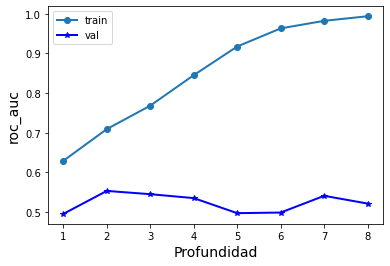

Mejor valor de la figura de mérito en validación cruzada: 0.554
Mejor valor del hiperparámetro: {'max_depth': 2}


In [ ]:
arbol('roc_auc')

{'max_depth': 2}


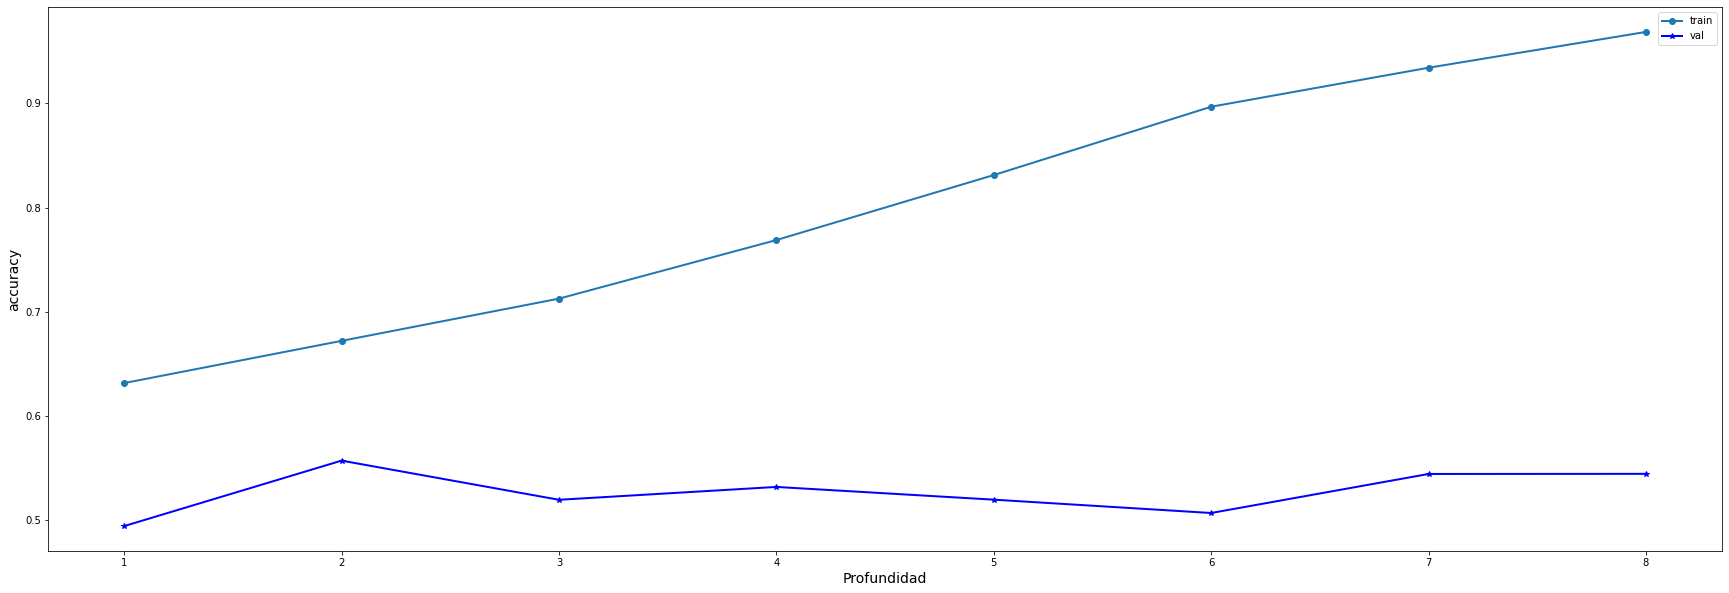

Mejor valor de la figura de mérito en validación cruzada: 0.557
Mejor valor del hiperparámetro: {'max_depth': 2}


In [ ]:
arbol('accuracy')

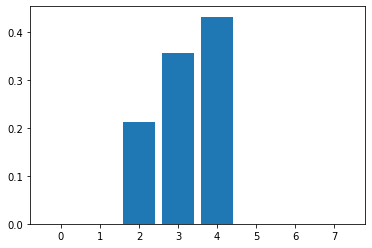

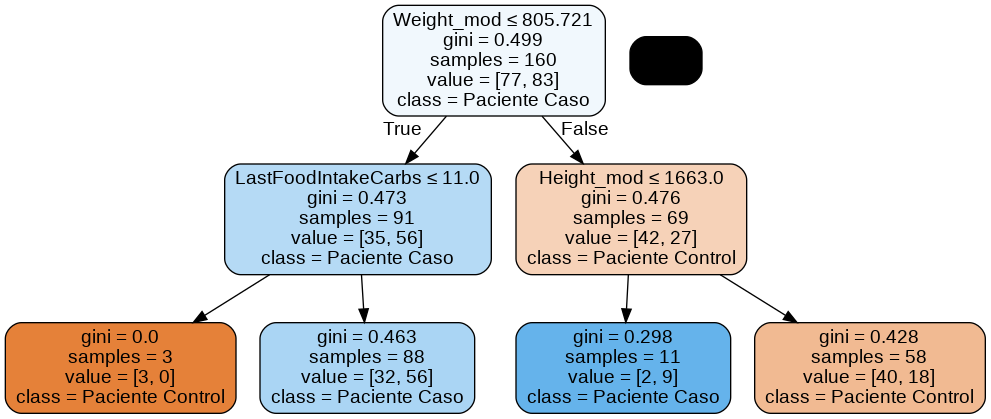

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=2)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[1:],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de accuracy obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de recall es", recall_score(Y_test, y_output_arbol))
# print("El error cuadrático medio", mean_squared_error(Y_test, y_output_arbol)) 

# A_results.append(accuracy_score(Y_test2, y_output_arbol))
# f1_results.append(f1_score(Y_test2, y_output_arbol))
# S_results.append(recall_score(Y_test2, y_output_arbol))
# MSE_results.append(mean_squared_error(Y_test2, y_output_arbol))

El valor de accuracy obtenido: 0.4146341463414634
La matriz de confusión obtenida: [[ 8 15]
 [ 9  9]]
El valor de f1_score obtenido: 0.42857142857142855
El valor de recall es 0.5


In [ ]:

A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4146341463414634
La matriz de confusión obtenida: [[ 8 15]
 [ 9  9]]
El valor de f1_score obtenido: 0.42857142857142855
El valor de recall es 0.5


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
from sklearn.svm import SVC


In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_std_train2, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.579


In [ ]:


svc=SVC(C=0.001,kernel='rbf',gamma=0.0001,decision_function_shape='ovo')
svc.fit(X_std_train2,Y_train)
y_test_pred=svc.predict(X_std_test2)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[ 0 23]
 [ 0 18]]
El valor de f1_score obtenido: 0.6101694915254238
El valor de recall es 1.0


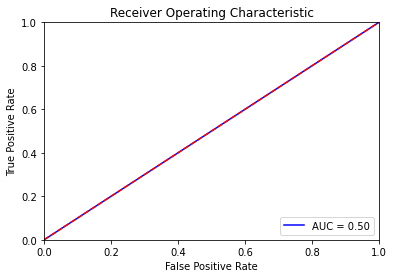

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

In [ ]:
results = pd.DataFrame()

results["Accuracy"]=res_accuracy
results["Recall"]=res_recall
results["F1-score"]=res_f1
results["Auc"]=res_roc

#results
results["Modelos"] = ["Regresión logística", "Knn","Árbol","SVC"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc
Modelos                                                    
Regresión logística  0.414634  0.444444  0.400000  0.417874
Knn                  0.658537  0.666667  0.631579  0.659420
Árbol                0.414634  0.500000  0.428571  0.423913
SVC                  0.439024  1.000000  0.610169  0.500000

# **MÉTODO ENSEMBLE** no lo uso

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest(figura):
  # 1. Extracción de las dos características de interés para realizar el diseño

  param_grid = {'n_estimators': [10, 20, 30, 40, 50, 100]}
  arboles_grid=[10, 20, 30, 40, 50, 100]

  CV_rfc = GridSearchCV(RandomForestClassifier(max_features= 'sqrt'), param_grid=param_grid, cv= 5, n_jobs=-1, scoring=figura, return_train_score=True)
  CV_rfc.fit(X_std_train2, Y_train)
  print(CV_rfc.best_params_)

  perf_train_rfc = np.array(CV_rfc.cv_results_['mean_train_score'])
  perf_val_rfc = np.array(CV_rfc.cv_results_['mean_test_score'])

  plt.plot(arboles_grid,perf_train_rfc,'-o',label="train", linewidth=2)
  plt.plot(arboles_grid,perf_val_rfc,'-*b',label="val", linewidth=2)
  plt.xlabel('Arboles',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()


  print("Mejor MSE en validación cruzada: {:.3f}".format(CV_rfc.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(CV_rfc.best_params_))


{'n_estimators': 50}


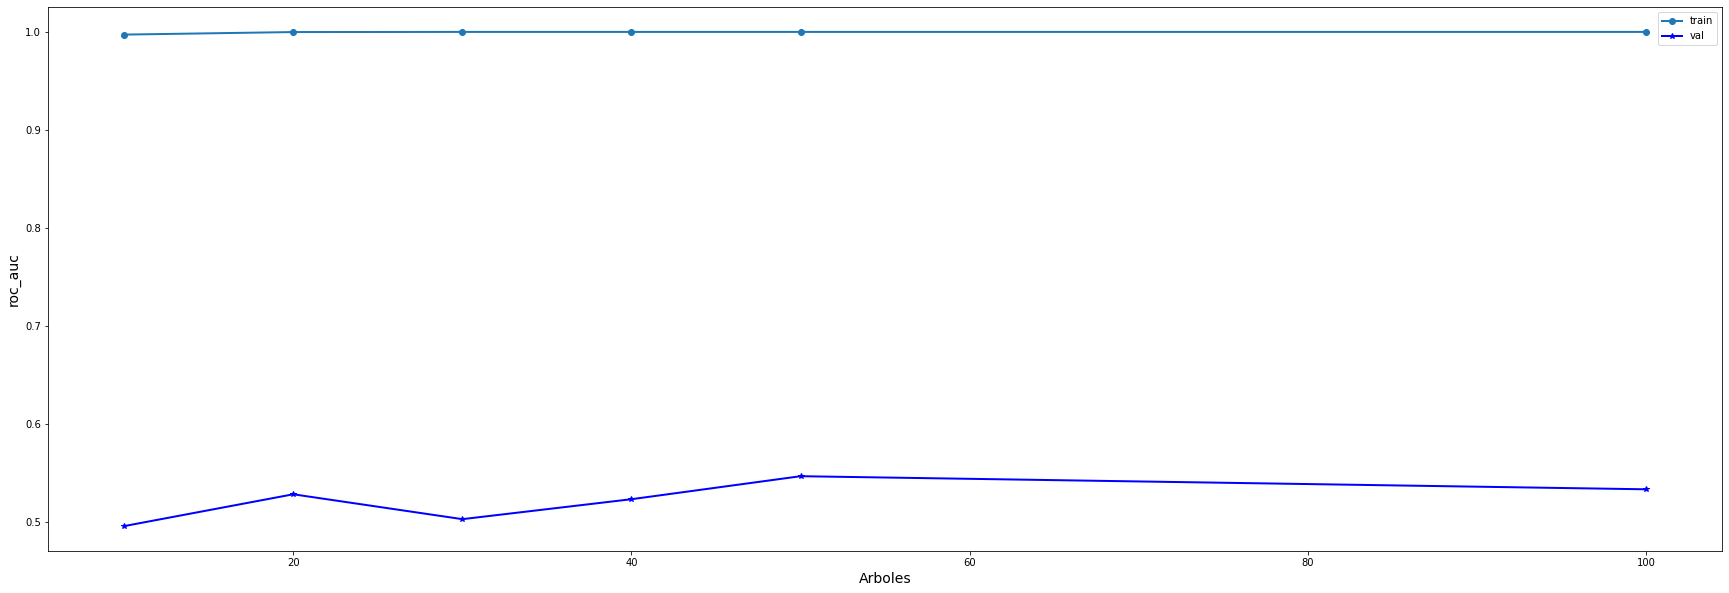

Mejor MSE en validación cruzada: 0.547
Mejor valor del hiperparámetro: {'n_estimators': 50}


In [ ]:
RandomForest('roc_auc')

{'n_estimators': 10}


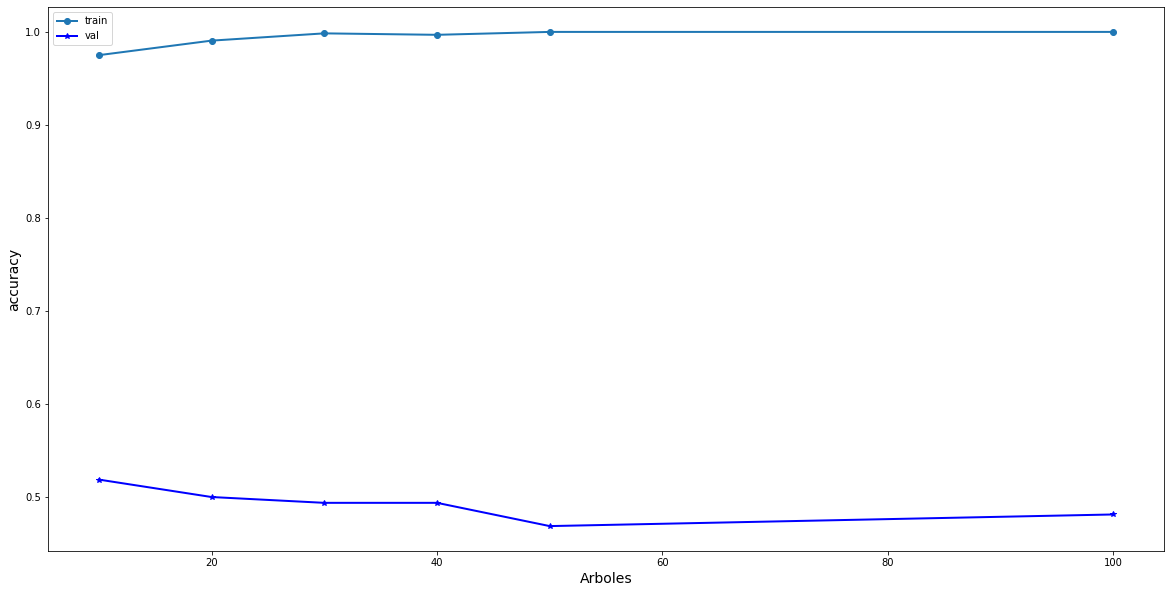

Mejor MSE en validación cruzada: 0.519
Mejor valor del hiperparámetro: {'n_estimators': 10}


In [ ]:
RandomForest('accuracy')

In [ ]:
RF_clasif_all = RandomForestClassifier(n_estimators=50)
modelo_RF_clasif2 = RF_clasif_all.fit(X_std_train2, Y_train) 
y_output_RF = modelo_RF_clasif2.predict(X_std_test2)
print(accuracy_score(Y_test, y_output_RF))
print(confusion_matrix(Y_test, y_output_RF))
print(f1_score(Y_test, y_output_RF))
print(recall_score(Y_test, y_output_RF))

# A_results.append(accuracy_score(Y_test2, y_output_RF))
# f1_results.append(f1_score(Y_test2, y_output_RF))
# S_results.append(recall_score(Y_test2, y_output_RF))
# MSE_results.append(mean_squared_error(Y_test2, y_output_RF))

0.4878048780487805
[[11 12]
 [ 9  9]]
0.4615384615384615
0.5


# **REEMPLAZO DE VALORES CON MODA,MEDIA**

Antes de convertir esa variable categórica a partir de one-hot encoding, tenemos que tratar esos valores nulos, y para ello sacaremos la moda de X_train en la variable MoCAPtEff, y a continuación, aplicaremos esa moda a los valores nulos de todo el dataset, y posteriormente aplicaremos one hot encoding, y volveremos a dividir en entrenamiento y test.

In [ ]:
from statistics import mode
data["LastFoodIntakeHrs"].replace(np.nan, mode(X_train["LastFoodIntakeHrs"]), inplace=True)


In [ ]:
data.isna().sum()

BCaseControlStatus        0
VisitDaysFromEnroll       0
NumMeterCheckDayMeter    98
LastFoodIntakeHrs         0
LastFoodIntakeCarbs      49
Weight_mod                1
Height_mod                4
dtype: int64

Entonces, a continuación, aplicamos one-hot encoding:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def var_categ(variable):
  global data
  enc = OneHotEncoder(handle_unknown='ignore')
  enc_data = pd.DataFrame(enc.fit_transform(data[[variable]]).toarray())
  data[variable].value_counts() # Identifity categories
  enc_data.describe()
  #Solo incluye categorías que tengan datos
  #aunque no tengan datos
  data = pd.concat([data,pd.get_dummies(data[variable], prefix=variable)],axis=1)

In [ ]:
var_categ("LastFoodIntakeHrs")

In [ ]:
data.head()

BCaseControlStatus  VisitDaysFromEnroll  NumMeterCheckDayMeter  \
0                   1                    7                    NaN   
1                   0                    0                    NaN   
2                   1                    0                    NaN   
3                   0                    0                    NaN   
4                   1                   11                    NaN   

  LastFoodIntakeHrs  LastFoodIntakeCarbs  Weight_mod  Height_mod  \
0  0-<4 hours prior                 36.0  807.256236     1630.00   
1  0-<4 hours prior                  NaN  824.489796     1803.40   
2  0-<4 hours prior                  NaN  988.662132     1889.76   
3  0-<4 hours prior                  NaN  991.383220     1840.00   
4  0-<4 hours prior                  NaN  957.823129     1889.76   

   LastFoodIntakeHrs_0-<4 hours prior  LastFoodIntakeHrs_4-<8 hours prior  \
0                                   1                                   0   
1                                   1                                   0   
2                                   1                                   0   
3                                   1                                   0   
4                                   1                                   0   

   LastFoodIntakeHrs_8 or more hours prior  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0

In [ ]:
data.drop(['LastFoodIntakeHrs'], axis=1, inplace=True)


In [ ]:
data.head()

BCaseControlStatus  VisitDaysFromEnroll  NumMeterCheckDayMeter  \
0                   1                    7                    NaN   
1                   0                    0                    NaN   
2                   1                    0                    NaN   
3                   0                    0                    NaN   
4                   1                   11                    NaN   

   LastFoodIntakeCarbs  Weight_mod  Height_mod  \
0                 36.0  807.256236     1630.00   
1                  NaN  824.489796     1803.40   
2                  NaN  988.662132     1889.76   
3                  NaN  991.383220     1840.00   
4                  NaN  957.823129     1889.76   

   LastFoodIntakeHrs_0-<4 hours prior  LastFoodIntakeHrs_4-<8 hours prior  \
0                                   1                                   0   
1                                   1                                   0   
2                                   1                                   0   
3                                   1                                   0   
4                                   1                                   0   

   LastFoodIntakeHrs_8 or more hours prior  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0

Ahora, ya volvemos a dividir en entrenamiento y test:

In [ ]:
X = data.loc[:, data.columns != 'BCaseControlStatus']
Y= data["BCaseControlStatus"]

X.shape, Y.shape

((201, 8), (201,))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

A continuación, trataremos los valores nulos del resto de variables, que ya no son categóricas, a partir de la media y moda del conjunto de entrenamiento y aplicándolo tanto al conjunto de entrenamiento como al conjunto de test:

In [ ]:
X_train.isna().sum()

VisitDaysFromEnroll                         0
NumMeterCheckDayMeter                      75
LastFoodIntakeCarbs                        41
Weight_mod                                  1
Height_mod                                  4
LastFoodIntakeHrs_0-<4 hours prior          0
LastFoodIntakeHrs_4-<8 hours prior          0
LastFoodIntakeHrs_8 or more hours prior     0
dtype: int64

In [ ]:
X_test.isna().sum()

VisitDaysFromEnroll                         0
NumMeterCheckDayMeter                      23
LastFoodIntakeCarbs                         8
Weight_mod                                  0
Height_mod                                  0
LastFoodIntakeHrs_0-<4 hours prior          0
LastFoodIntakeHrs_4-<8 hours prior          0
LastFoodIntakeHrs_8 or more hours prior     0
dtype: int64

In [ ]:
X_train["NumMeterCheckDayMeter"].replace(np.nan, mode(X_train["NumMeterCheckDayMeter"]), inplace=True)
X_train["LastFoodIntakeCarbs"].replace(np.nan, mode(X_train["LastFoodIntakeCarbs"]), inplace=True)
X_train["Weight_mod"].replace(np.nan, X_train["Weight_mod"].mean(), inplace=True)
X_train["Height_mod"].replace(np.nan, X_train["Height_mod"].mean(), inplace=True)

X_test["NumMeterCheckDayMeter"].replace(np.nan, mode(X_train["NumMeterCheckDayMeter"]), inplace=True)
X_test["LastFoodIntakeCarbs"].replace(np.nan, mode(X_train["LastFoodIntakeCarbs"]), inplace=True)
X_test["Weight_mod"].replace(np.nan, X_train["Weight_mod"].mean(), inplace=True)
X_test["Height_mod"].replace(np.nan, X_train["Height_mod"].mean(), inplace=True)

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


std_all2 = preprocessing.StandardScaler().fit(X_train)
X_std_train2 = std_all2.transform(X_train) #Tendriamos todas las características estandarizadas
X_std_test2 = std_all2.transform(X_test)

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_std_train2, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))






Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.547


A continuación, ya construimos nuestro modelo con los parámetros obtenidos a partir de validación cruzada y es con un valor de alpha de 0.0001 y un modelo ridge. Así obtenemos los resultados obtenidos en el conjunto de test:

In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_std_train2, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_std_test2)




A continuación, vamos a calcular diferentes figuras de mérito para ver que resultados obtenemos en test. Comenzamos con la matriz de confusión:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[ 9 14]
 [12  6]]
tn: 9, fp:14, fn:12, tp:6
Accuracy: 0.36585365853658536
                  precision    recall  f1-score   support

Paciente control       0.43      0.39      0.41        23
   Paciente caso       0.30      0.33      0.32        18

        accuracy                           0.37        41
       macro avg       0.36      0.36      0.36        41
    weighted avg       0.37      0.37      0.37        41

Sensibilidad: 0.3333333333333333


Calculamos la ROC y la AUC:

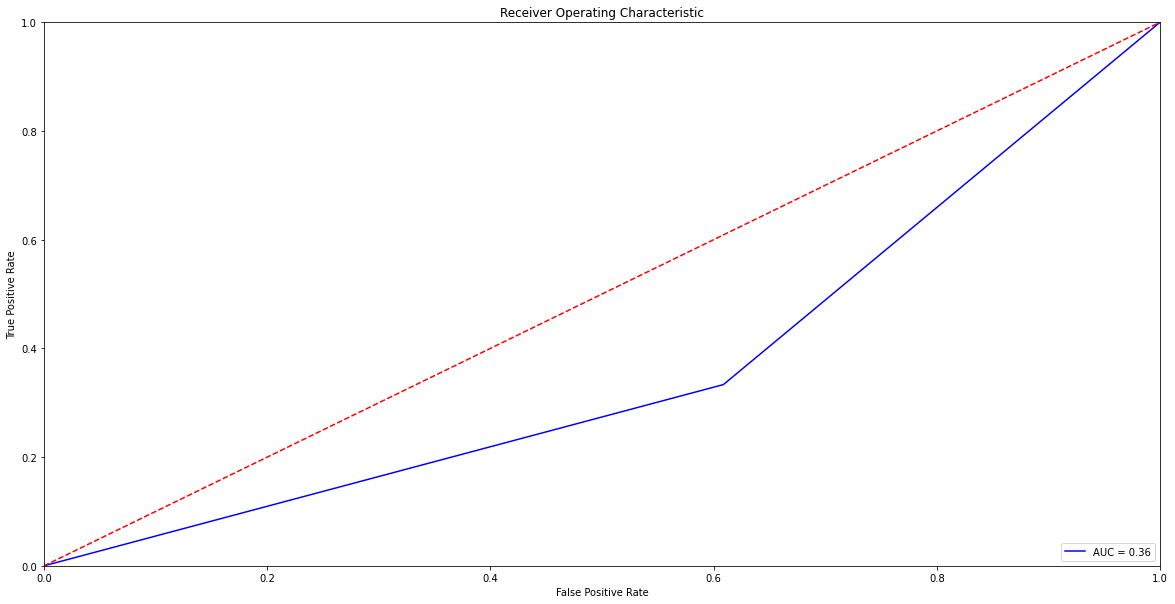

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Obtenemos un valor de AUC muy cercano a la curva ROC, por lo que no está haciendo una buena clasificación de los pacientes

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,41,2)}
  k_grid = np.array(range(1,41,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_std_train2, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

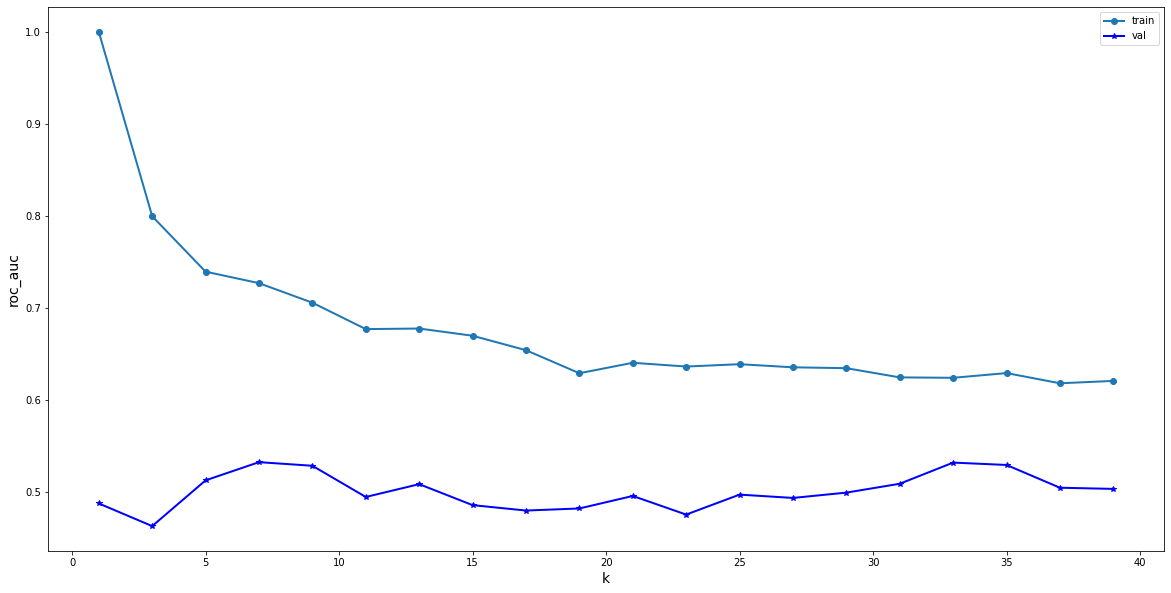

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.532
Valor correspondiente para el hiperparámetro: {'n_neighbors': 7}


In [ ]:
knn('roc_auc')

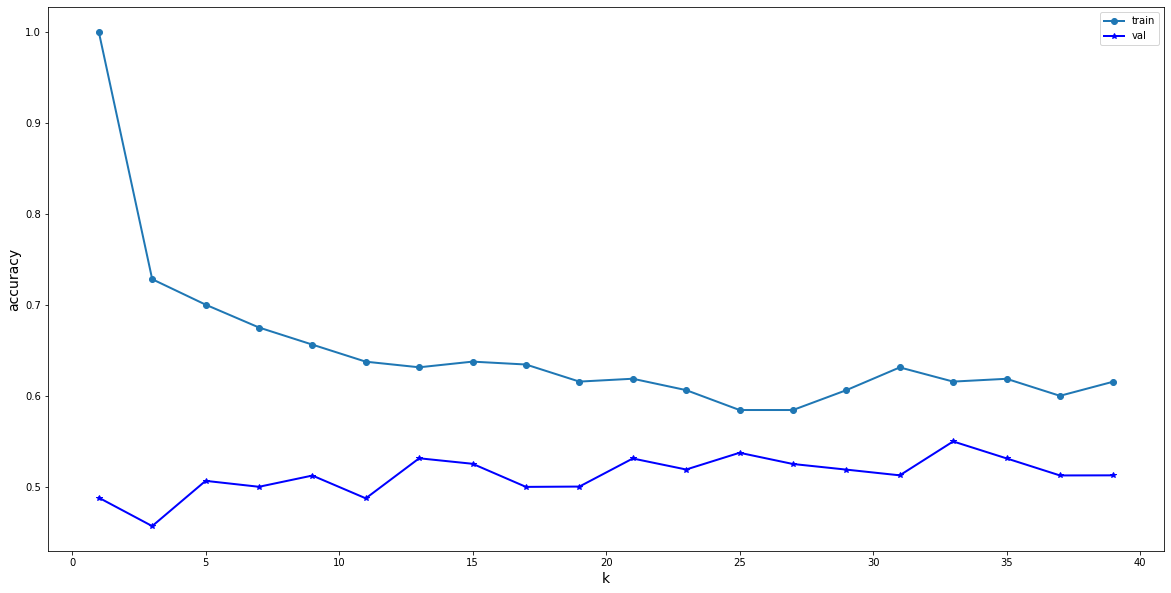

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.550
Valor correspondiente para el hiperparámetro: {'n_neighbors': 33}


In [ ]:
knn('accuracy')

Podemos observar según la curva de validación que podríamos elegir unnúmero de vecinos igual a 6, ya que el resultado será parecido al obtenido con 35 vecinos, por lo que así conseguiremos construir un modelo más sencillo.

Con este valor elegido de k, vamos a determinar  los valores de 5 figuras de mérito para estimar las prestaciones sobre un conjunto de test independiente del utilizado en el diseño:


In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 7)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_std_train2, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_std_test2)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5609756097560976
La matriz de confusión obtenida: [[15  8]
 [10  8]]
El valor de f1_score obtenido: 0.47058823529411764
El valor de recall es 0.4444444444444444


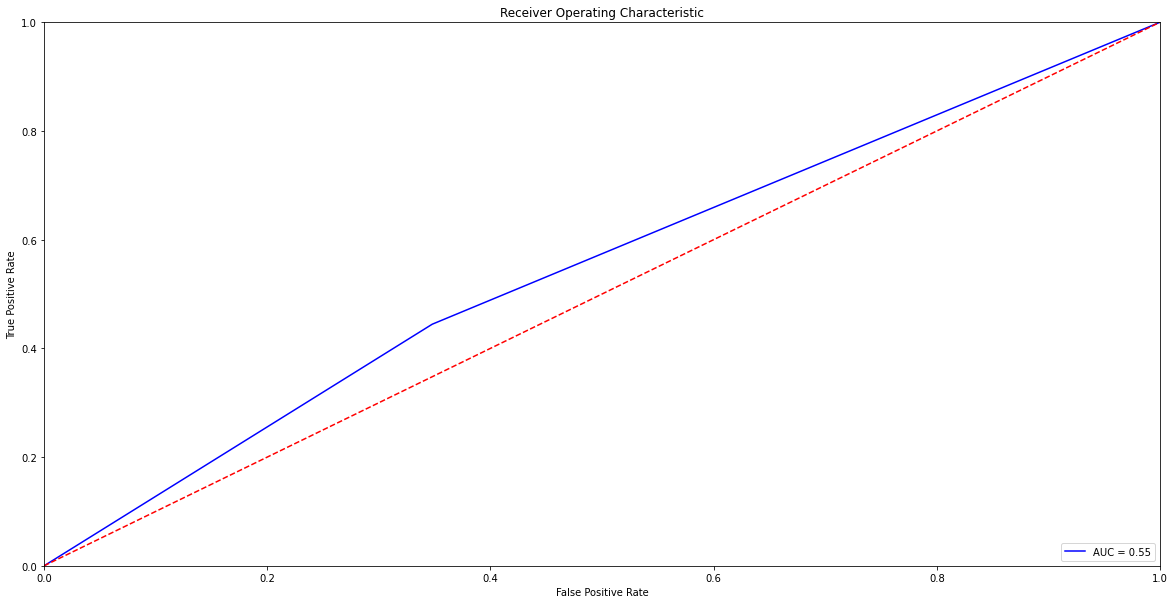

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# ***ÁRBOLES***

Para los árboles no hace falta la normalización

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,9)}
  profundidad_grid = np.array(range(1,9))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 8}


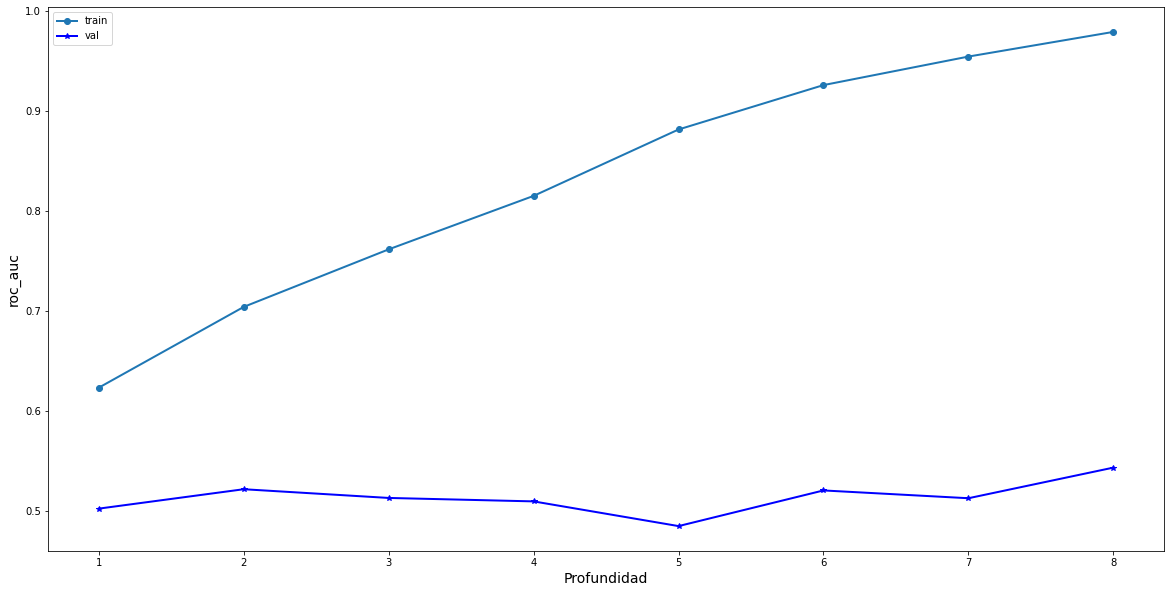

Mejor valor de la figura de mérito en validación cruzada: 0.544
Mejor valor del hiperparámetro: {'max_depth': 8}


In [ ]:
arbol('roc_auc')

{'max_depth': 8}


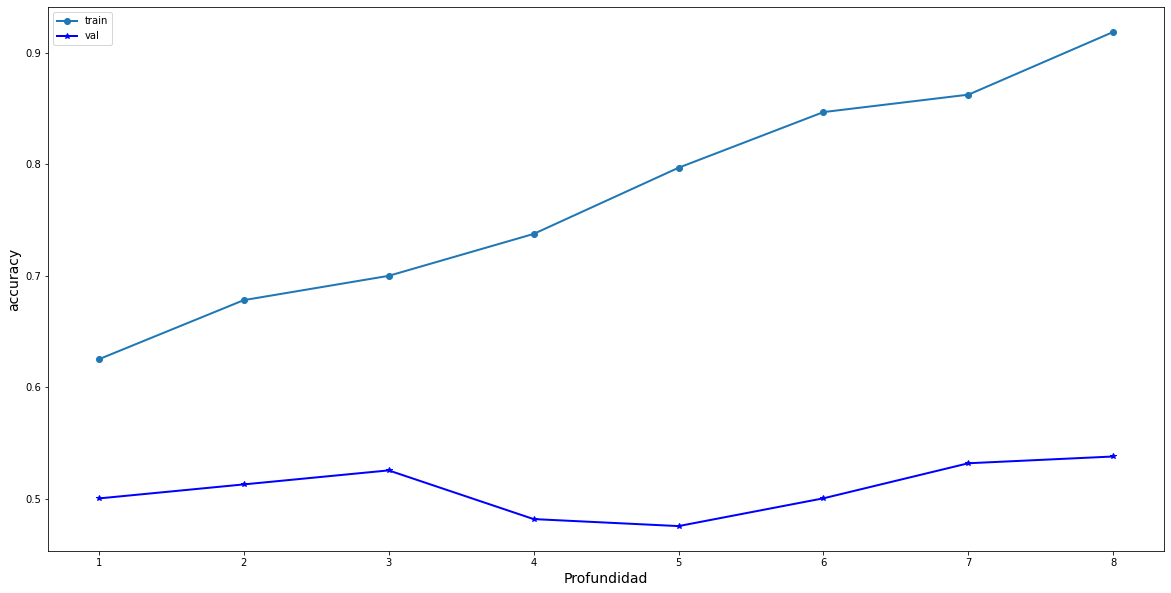

Mejor valor de la figura de mérito en validación cruzada: 0.538
Mejor valor del hiperparámetro: {'max_depth': 8}


In [ ]:
arbol('accuracy')

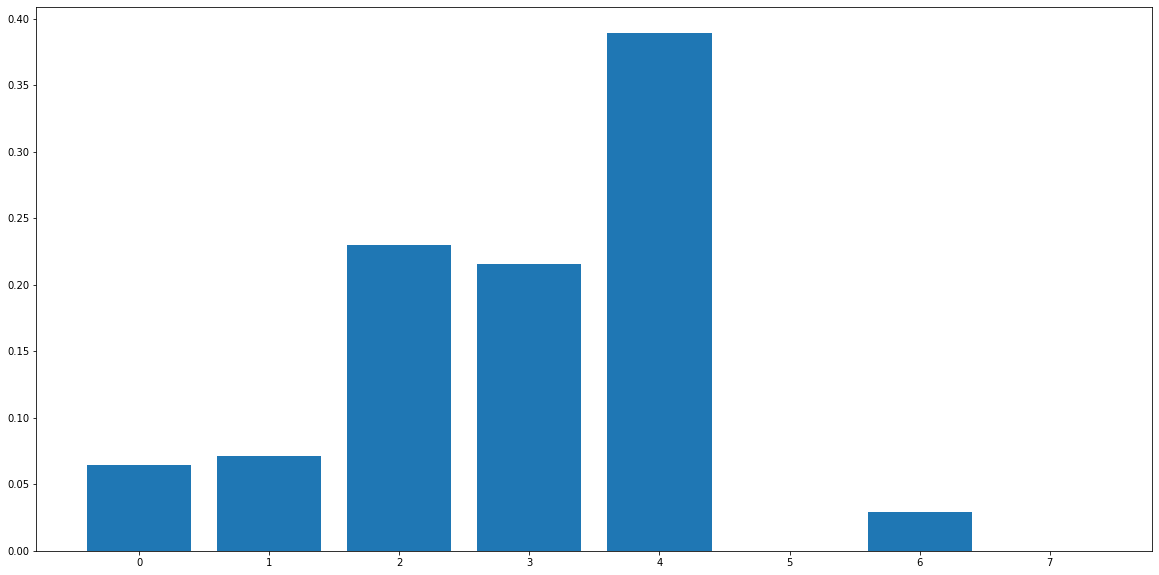

55 [label=<LastFoodIntakeHrs_4-<8 hours prior &le; 0.5<br/>gini = 0.153<br/>samples = 12<br/>value = [11, 1]<br/>class = Paciente Control>, fillcolor="#e78c4b"] ;
   ^
Expected '}', found '['  (at char 7796), (line:113, col:4)


AttributeError: ignored

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=8)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[1:],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de accuracy obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de recall es", recall_score(Y_test, y_output_arbol))

# A_results.append(accuracy_score(Y_test2, y_output_arbol))
# f1_results.append(f1_score(Y_test2, y_output_arbol))
# S_results.append(recall_score(Y_test2, y_output_arbol))
# MSE_results.append(mean_squared_error(Y_test2, y_output_arbol))

El valor de accuracy obtenido: 0.5853658536585366
La matriz de confusión obtenida: [[14  9]
 [ 8 10]]
El valor de f1_score obtenido: 0.5405405405405405
El valor de recall es 0.5555555555555556


# **MÉTODO ENSEMBLE**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest(figura):
  # 1. Extracción de las dos características de interés para realizar el diseño

  param_grid = {'n_estimators': [10, 20, 30, 40, 50, 100]}
  arboles_grid=[10, 20, 30, 40, 50, 100]

  CV_rfc = GridSearchCV(RandomForestClassifier(max_features= 'sqrt'), param_grid=param_grid, cv= 5, n_jobs=-1, scoring=figura, return_train_score=True)
  CV_rfc.fit(X_std_train2, Y_train)
  print(CV_rfc.best_params_)

  perf_train_rfc = np.array(CV_rfc.cv_results_['mean_train_score'])
  perf_val_rfc = np.array(CV_rfc.cv_results_['mean_test_score'])

  plt.plot(arboles_grid,perf_train_rfc,'-o',label="train", linewidth=2)
  plt.plot(arboles_grid,perf_val_rfc,'-*b',label="val", linewidth=2)
  plt.xlabel('Arboles',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()


  print("Mejor MSE en validación cruzada: {:.3f}".format(CV_rfc.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(CV_rfc.best_params_))


{'n_estimators': 100}


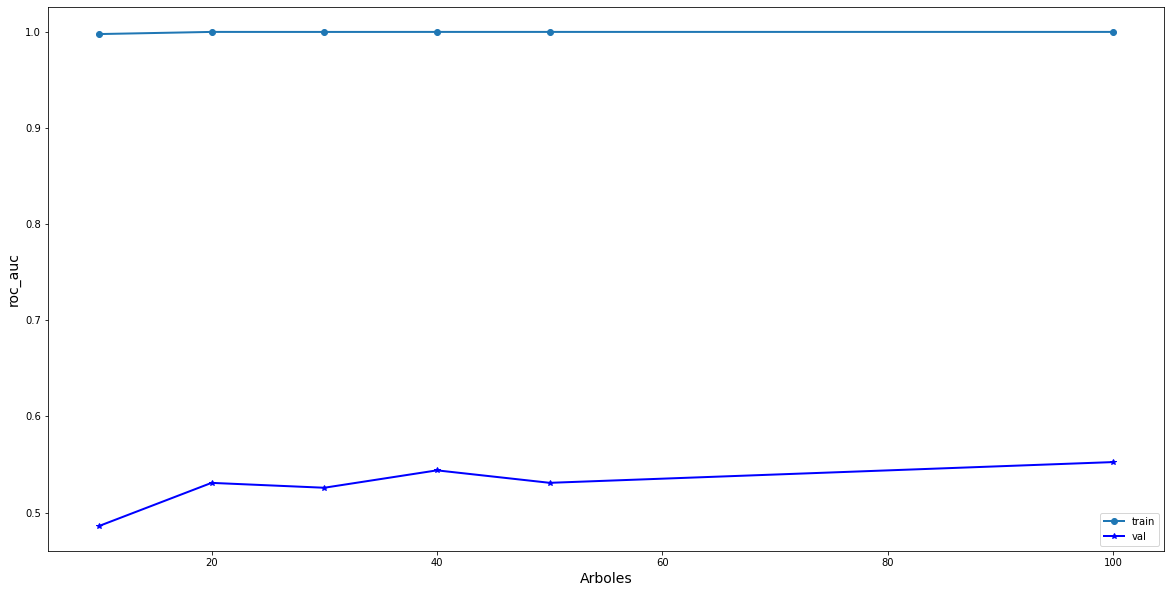

Mejor MSE en validación cruzada: 0.553
Mejor valor del hiperparámetro: {'n_estimators': 100}


In [ ]:
RandomForest('roc_auc')

{'n_estimators': 10}


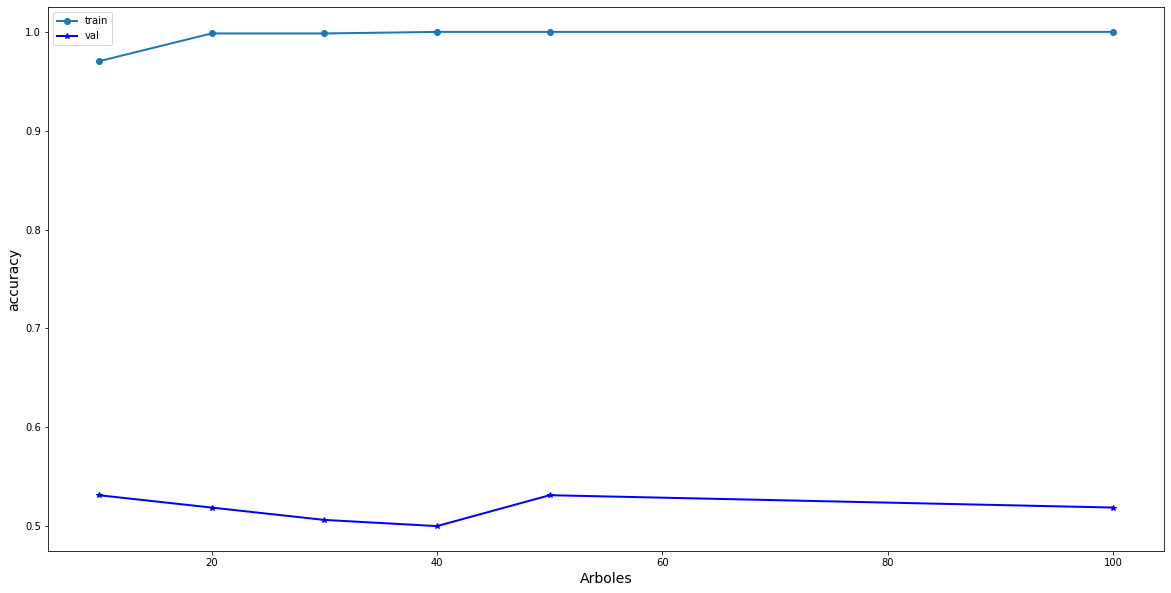

Mejor MSE en validación cruzada: 0.531
Mejor valor del hiperparámetro: {'n_estimators': 10}


In [ ]:
RandomForest('accuracy')

In [ ]:
RF_clasif_all = RandomForestClassifier(n_estimators=50)
modelo_RF_clasif2 = RF_clasif_all.fit(X_std_train2, Y_train) 
y_output_RF = modelo_RF_clasif2.predict(X_std_test2)
print(accuracy_score(Y_test, y_output_RF))
print(confusion_matrix(Y_test, y_output_RF))
print(f1_score(Y_test, y_output_RF))
print(recall_score(Y_test, y_output_RF))

# A_results.append(accuracy_score(Y_test2, y_output_RF))
# f1_results.append(f1_score(Y_test2, y_output_RF))
# S_results.append(recall_score(Y_test2, y_output_RF))
# MSE_results.append(mean_squared_error(Y_test2, y_output_RF))

0.4878048780487805
[[12 11]
 [10  8]]
0.43243243243243246
0.4444444444444444


# ***SELECCIÓN DE CARACTERÍSTICAS***

# ***Métodos *embedded****

Ranking de Características:
1. Característica 4 (0.272902)
2. Característica 3 (0.256507)
3. Característica 2 (0.210574)
4. Característica 1 (0.150642)
5. Característica 0 (0.066433)
6. Característica 5 (0.016520)
7. Característica 6 (0.014410)
8. Característica 7 (0.012013)


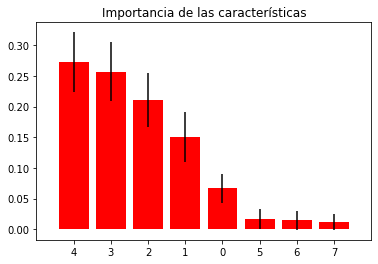

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Creamos un bosque aleatorio de árboles de clasificación
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

# Como en árboles, no es necesario que las características estén normalizadas
# Trabajamos, por tanto, con X_train y X_test (no con las versiones estandarizadas)

forest.fit(X_train_std_all0, Y_train_0)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Muestra el ranking en el ordenamiento
print("Ranking de Características:")

for f in range(X_train_std_all0.shape[1]):
    print("%d. Característica %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Importancia de las características")
plt.bar(range(X_train_std_all0.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_std_all0.shape[1]), indices)
plt.xlim([-1, X_train_std_all0.shape[1]])
plt.show()

In [ ]:
X.head()

VisitDaysFromEnroll  NumMeterCheckDayMeter  LastFoodIntakeCarbs  \
0                    7                    NaN                 36.0   
1                    0                    NaN                  NaN   
2                    0                    NaN                  NaN   
3                    0                    NaN                  NaN   
4                   11                    NaN                  NaN   

   Weight_mod  Height_mod  LastFoodIntakeHrs_0-<4 hours prior  \
0  807.256236     1630.00                                   1   
1  824.489796     1803.40                                   1   
2  988.662132     1889.76                                   1   
3  991.383220     1840.00                                   1   
4  957.823129     1889.76                                   1   

   LastFoodIntakeHrs_4-<8 hours prior  LastFoodIntakeHrs_8 or more hours prior  
0                                   0                                        0  
1                                   0                                        0  
2                                   0                                        0  
3                                   0                                        0  
4                                   0                                        0

CARACTERÍSTICAS MÁS IMPORTANTES:

* NumMeterCheckDayMeter	
* LastFoodIntakeCarbs	
* Weight_mod	
* Height_mod

Nos da la influencia de cada característica. 
En este caso, elegiremos hasta la característica 6 y a continuación lo evaluaremos en un esquema knn para hacer comparaciones con los otros métodos para la selección de características:

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train_emb = X_train_std_all0[:,[1,2,3,4]]
X_test_emb = X_test_std_all0[:,[1,2,3,4]]

# # Diseñamos el clasificador KNN con el máximo valor de SFS
# k_selec = 9
# knn = KNeighborsClassifier(n_neighbors = k_selec)

# # Entrenamos el modelo
# knn.fit(X_train_emb, Y_train)

# ## Predecimos usando X_test
# print('FS con SFS. Accuracy en test con k= '+ str(k_selec) + ':', knn.score(X_test_emb, Y_test))

# from sklearn.metrics import accuracy_score
# y_pred=knn.predict(X_test_emb)
# print(accuracy_score(Y_test, y_pred))

# ***Regresión logíticas***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_emb, Y_train_0) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))






Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.618


A continuación, ya construimos nuestro modelo con los parámetros obtenidos a partir de validación cruzada y es con un valor de alpha de 0.0001 y un modelo ridge. Así obtenemos los resultados obtenidos en el conjunto de test:

In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_train_emb, Y_train_0)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_test_emb)




A continuación, vamos a calcular diferentes figuras de mérito para ver que resultados obtenemos en test. Comenzamos con la matriz de confusión:

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test_0, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test_0, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test_0, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test_0, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test_0, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[ 8 12]
 [12  9]]
tn: 8, fp:12, fn:12, tp:9
Accuracy: 0.4146341463414634
                  precision    recall  f1-score   support

Paciente control       0.40      0.40      0.40        20
   Paciente caso       0.43      0.43      0.43        21

        accuracy                           0.41        41
       macro avg       0.41      0.41      0.41        41
    weighted avg       0.41      0.41      0.41        41

Sensibilidad: 0.42857142857142855


Calculamos la ROC y la AUC:

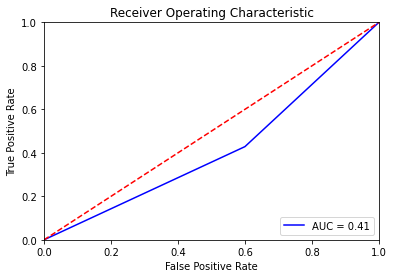

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test_0, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Obtenemos un valor de AUC muy cercano a la curva ROC, por lo que no está haciendo una buena clasificación de los pacientes

In [ ]:
res_accuracy=[]
res_recall=[]
res_f1=[]
res_roc=[]

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[ 9 14]
 [ 9  9]]
El valor de f1_score obtenido: 0.4390243902439025
El valor de recall es 0.5


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,41,2)}
  k_grid = np.array(range(1,41,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_emb, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

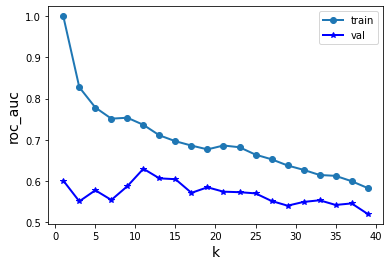

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.630
Valor correspondiente para el hiperparámetro: {'n_neighbors': 11}


In [ ]:
knn('roc_auc')

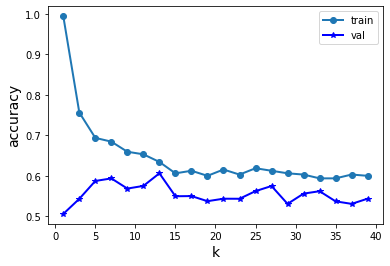

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.606
Valor correspondiente para el hiperparámetro: {'n_neighbors': 13}


In [ ]:
knn('accuracy')

Podemos observar según la curva de validación que podríamos elegir unnúmero de vecinos igual a 6, ya que el resultado será parecido al obtenido con 35 vecinos, por lo que así conseguiremos construir un modelo más sencillo.

Con este valor elegido de k, vamos a determinar  los valores de 5 figuras de mérito para estimar las prestaciones sobre un conjunto de test independiente del utilizado en el diseño:


In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 11)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_train_emb, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_test_emb)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5121951219512195
La matriz de confusión obtenida: [[12 11]
 [ 9  9]]
El valor de f1_score obtenido: 0.4736842105263158
El valor de recall es 0.5


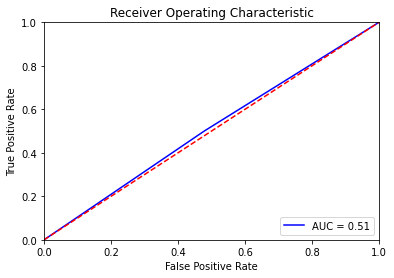

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5121951219512195
La matriz de confusión obtenida: [[12 11]
 [ 9  9]]
El valor de f1_score obtenido: 0.4736842105263158
El valor de recall es 0.5


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

Para los árboles no hace falta la normalización

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,5)}
  profundidad_grid = np.array(range(1,5))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train_emb, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 3}


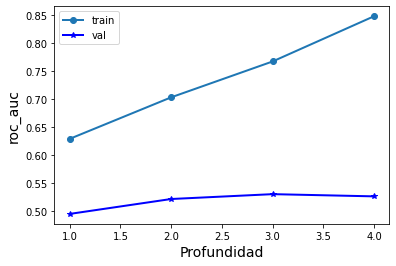

Mejor valor de la figura de mérito en validación cruzada: 0.531
Mejor valor del hiperparámetro: {'max_depth': 3}


In [ ]:
arbol('roc_auc')

{'max_depth': 2}


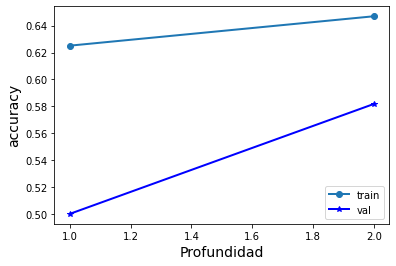

Mejor valor de la figura de mérito en validación cruzada: 0.582
Mejor valor del hiperparámetro: {'max_depth': 2}


In [ ]:
arbol('accuracy')

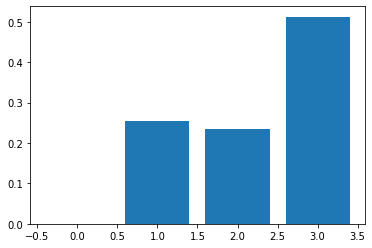

AttributeError: ignored

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=3)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train_emb, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test_emb)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train_emb.columns,class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de accuracy obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de recall es", recall_score(Y_test, y_output_arbol))

# A_results.append(accuracy_score(Y_test2, y_output_arbol))
# f1_results.append(f1_score(Y_test2, y_output_arbol))
# S_results.append(recall_score(Y_test2, y_output_arbol))
# MSE_results.append(mean_squared_error(Y_test2, y_output_arbol))

El valor de accuracy obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[ 8 15]
 [ 7 11]]
El valor de f1_score obtenido: 0.5
El valor de recall es 0.6111111111111112


In [ ]:

A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4634146341463415
La matriz de confusión obtenida: [[ 8 15]
 [ 7 11]]
El valor de f1_score obtenido: 0.5
El valor de recall es 0.6111111111111112


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5853658536585366
La matriz de confusión obtenida: [[15  8]
 [ 9  9]]
El valor de f1_score obtenido: 0.5142857142857143
El valor de recall es 0.5


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_train_emb, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.639


In [ ]:


svc=SVC(C=0.001,kernel='poly',gamma=0.01,decision_function_shape='ovo')
svc.fit(X_train_emb,Y_train)
y_test_pred=svc.predict(X_test_emb)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[ 0 23]
 [ 0 18]]
El valor de f1_score obtenido: 0.6101694915254238
El valor de recall es 1.0


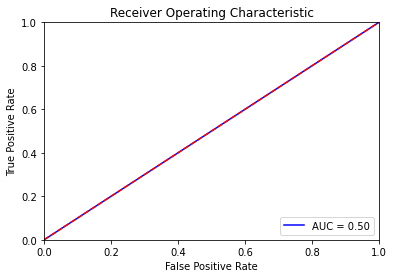

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***Método filter***

A continuación, a partir de validación cruzada con 3 folds, obtenemos el fold1, fold2 y fold3:

In [ ]:
# Convertimos el objeto dataframe en un array (mayor velocidad de cómputo)
# array = data.values
X_train=np.array(X_train)
X_text=np.array(X_test)
Y_train=(np.array(Y_train))
Y_test=np.array(Y_test)
# Separamos en variables de entrada al modelo (8 primeras) y de salida (1 variable) 
# X = array[:,1:59]
# Y = array[:,0]

names=[]
for i in range(8):
  names.append(str(i))
# names = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11','f12','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13','f13']
# names = data.columns[1:]
names

['0', '1', '2', '3', '4', '5', '6', '7']

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)  # In this case, k=3, 

for train, val in kf.split(X_train):
  # print("%s %s" % (train, val))
  # print(len(val))
  # print(val)
  if (len(val)==53) and (val[0]==107):
    fold3=list(val)
    print(len(fold3))
    print(fold3)
  if (len(val)==54):
    fold1=list(val)
    print(len(fold1))
    print(fold1)
  if (len(val)==53) and (val[0]==54):
    fold2=list(val)
    print(len(fold2))
    print(fold2)

54
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53]
53
[54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106]
53
[107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159]


# ***COMBINACIÓN PRIMERA***


En esta primera combinación utilizaremos fold1 y fold2 para entrenar, y fold3 para validar:

In [ ]:
X_entrenamiento=np.concatenate((X_train[fold1], X_train[fold2]))
Y_entrenamiento=np.concatenate((Y_train[fold1], Y_train[fold2]))
X_val=X_train[fold3]
Y_val=Y_train[fold3]

Text(0.5, 1.0, 'Chi2 considerando subconjunto X train')

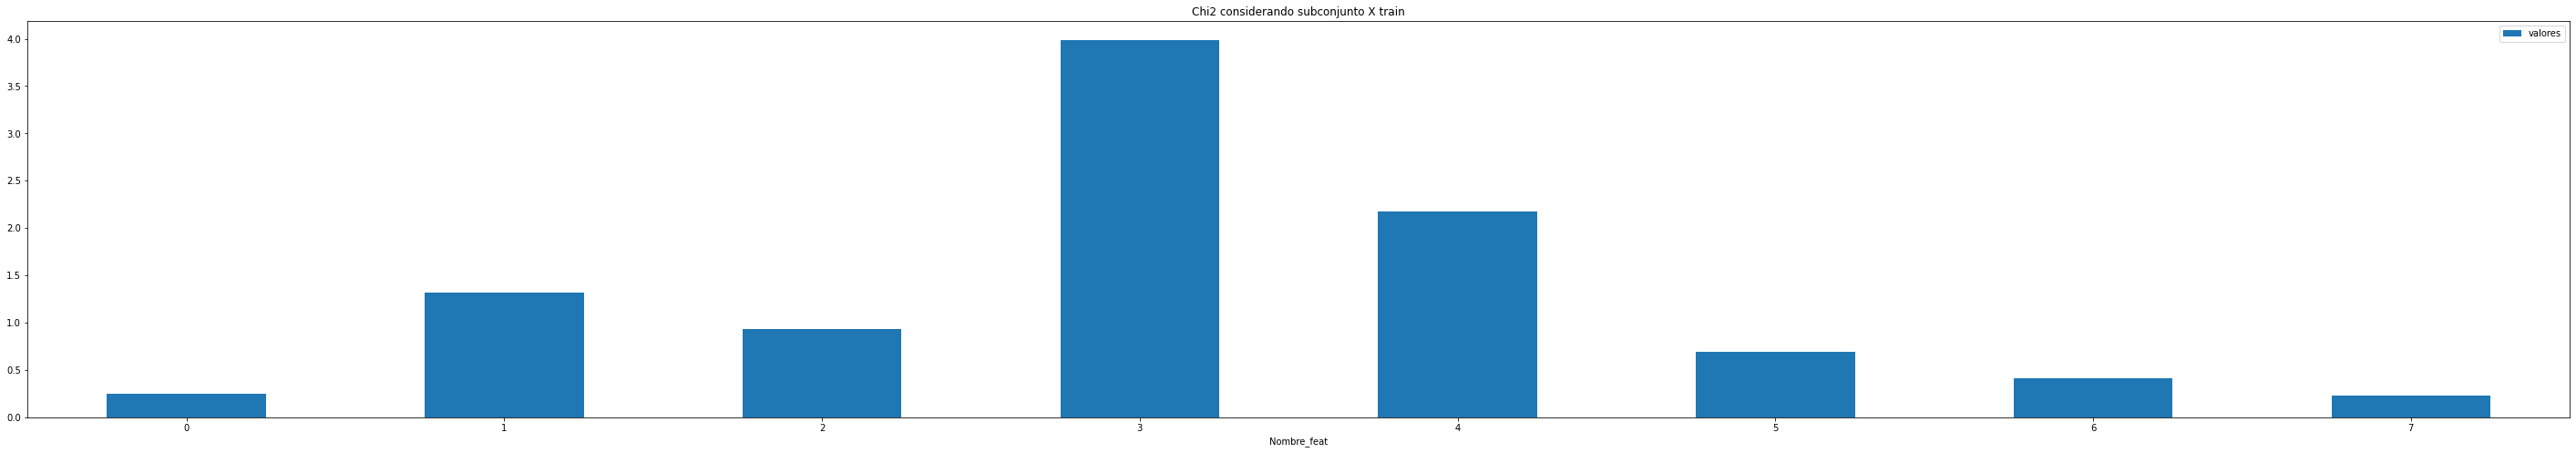

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

bestfeatures_Chi2 = SelectKBest(score_func=f_classif, k=8)
fit_Chi2 = bestfeatures_Chi2.fit(X_entrenamiento, Y_entrenamiento)

# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(50,8))
# df, ax = plt.subplots(figsize=(50, 8))
plt.title("Chi2 considerando subconjunto X train")

In [ ]:
X_val=X_val[:, [3,4]] 
print(len(X_val), len(Y_val))

53 53


In [ ]:
X_entrenamiento=X_entrenamiento[:, [3,4]]

Ahora con esas características elegidas, entrenaremos nuestro modelo knn y además también haremos validación para así obtener el mejor valor de k a partir de una figura de mérico que en este caso será el accuracy:

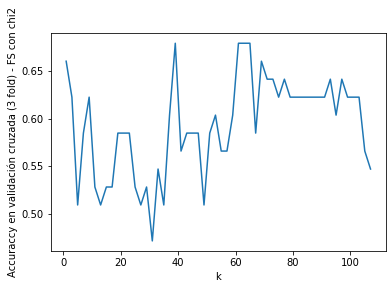

0.5471698113207547


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
k_range = range(1, 109, 2)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_entrenamiento, Y_entrenamiento)
    scores.append(knn.score(X_val, Y_val))
plt.plot(k_range, scores)
plt.xlabel('k')
plt.ylabel('Accuraccy en validación cruzada (3 fold) - FS con chi2')
plt.show()
print(knn.score(X_val, Y_val))

El valor de k será 11, ya que es dónde mayor accuracy obtenemos, y además se empieza a estabilizar

# ***COMBINACIÓN 2***

En esta combinación usaremos fold1 y fold3 para entrenar y usaremos fold 2 para validar:

In [ ]:
X_entrenamiento2=np.concatenate((X_train[fold1], X_train[fold3]))
Y_entrenamiento2=np.concatenate((Y_train[fold1], Y_train[fold3]))
X_val2=X_train[fold2]
Y_val2=Y_train[fold2]

Text(0.5, 1.0, 'Estadístico chi cuadrado considerando subconjunto X train')

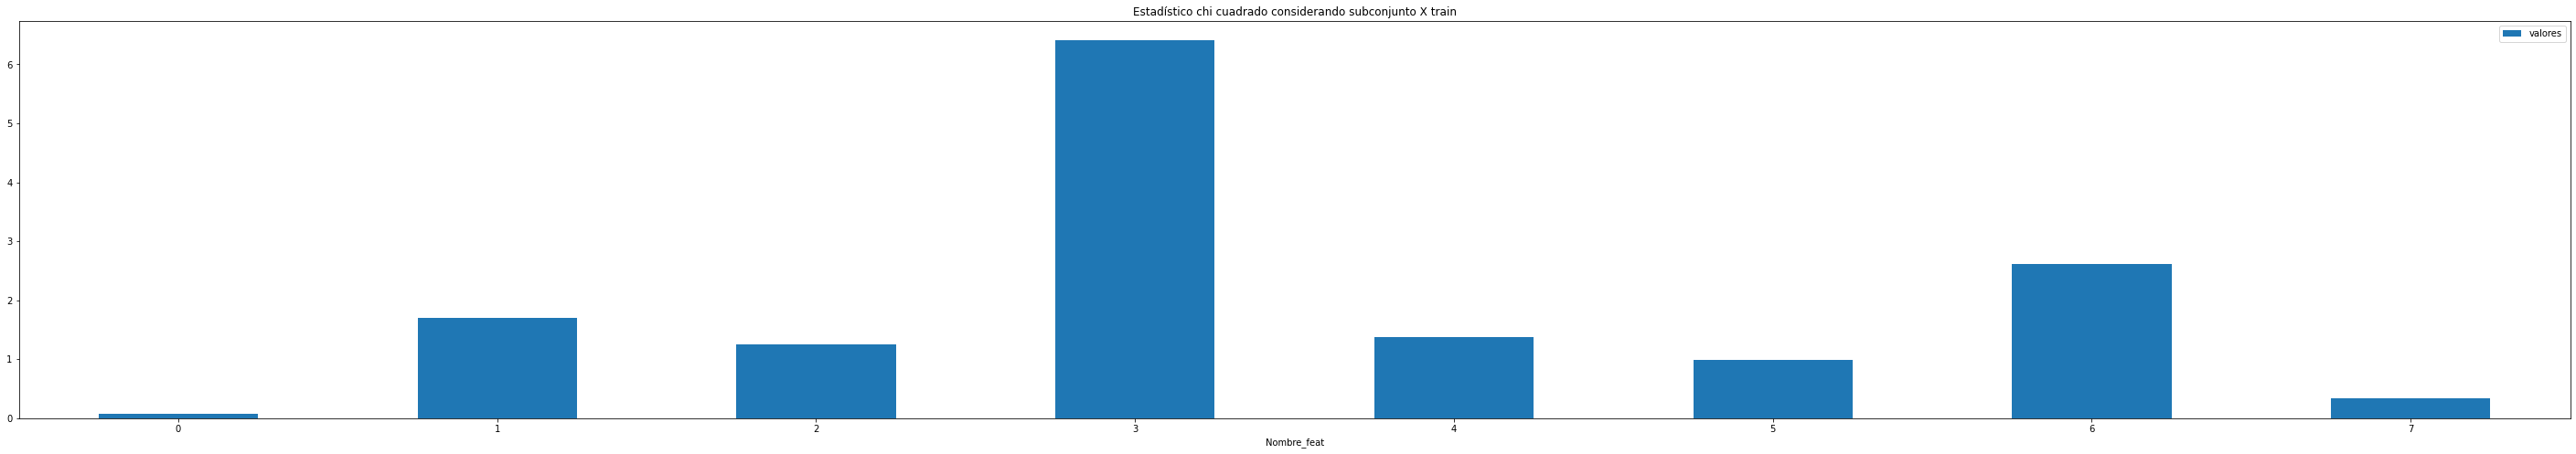

In [ ]:
bestfeatures_Chi2_2 = SelectKBest(score_func=f_classif, k=8)
fit_Chi2_2 = bestfeatures_Chi2_2.fit(X_entrenamiento2, Y_entrenamiento2)

# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2_2.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0,figsize=(50,8))
plt.title("Estadístico chi cuadrado considerando subconjunto X train")

Escogemos de nuestra X de validación y de nuestra X de train únicamente las características:

In [ ]:
X_val2=X_val2[:, [3]] 
X_entrenamiento2=X_entrenamiento2[:, [3]]

Ahora igual que antes, entrenamos nuestro modelo knn y elegimos el valor de k a partir de validación:

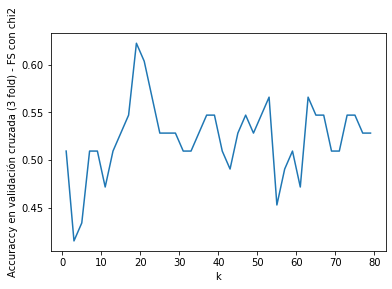

0.5283018867924528


In [ ]:
k_range = range(1, 81, 2)
scores2 = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    
    knn.fit(X_entrenamiento2, Y_entrenamiento2)
    scores2.append(knn.score(X_val2, Y_val2))
plt.plot(k_range, scores2)
plt.xlabel('k')
plt.ylabel('Accuraccy en validación cruzada (3 fold) - FS con chi2')
plt.show()
print(knn.score(X_val2, Y_val2))

# ***COMBINACIÓN 3***

En este último caso, utilizaremos el fold 2 y fold3 para entrenar y el fold 1 para validar:

In [ ]:
X_entrenamiento3=np.concatenate((X_train[fold2], X_train[fold3]))
Y_entrenamiento3=np.concatenate((Y_train[fold2], Y_train[fold3]))
X_val3=X_train[fold1]
Y_val3=Y_train[fold1]

Text(0.5, 1.0, 'Estadístico chi cuadrado considerando subconjunto X train')

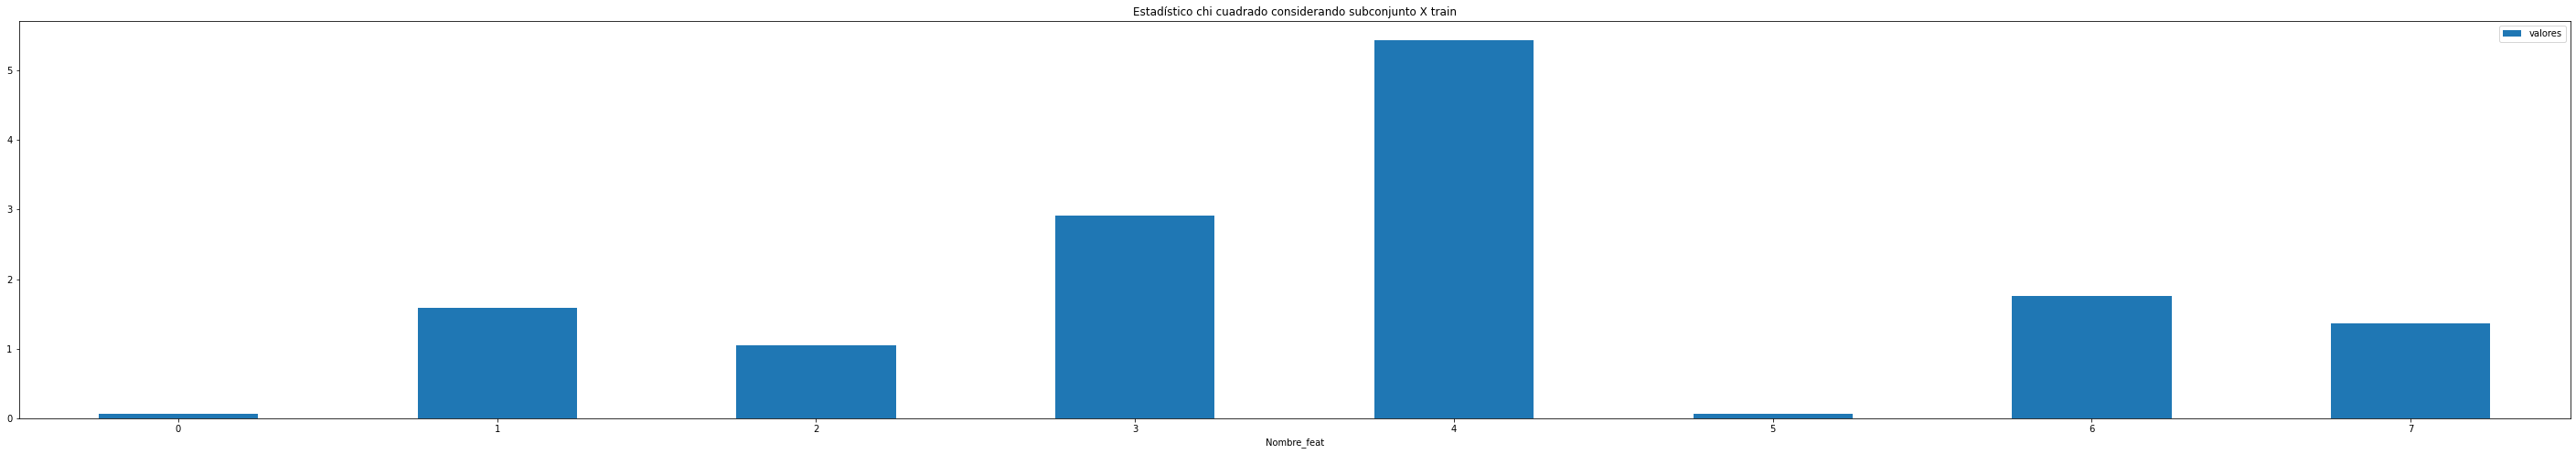

In [ ]:
bestfeatures_Chi2_3 = SelectKBest(score_func=f_classif, k=8)
fit_Chi2_3 = bestfeatures_Chi2_3.fit(X_entrenamiento3, Y_entrenamiento3)

# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':names, 'valores':fit_Chi2_3.scores_})
ax = df.plot.bar(x='Nombre_feat', y='valores', rot=0, figsize=(50,8))
plt.title("Estadístico chi cuadrado considerando subconjunto X train")

In [ ]:
X_val3=X_val3[:, [3,4]] 
X_entrenamiento3=X_entrenamiento3[:, [3,4]]

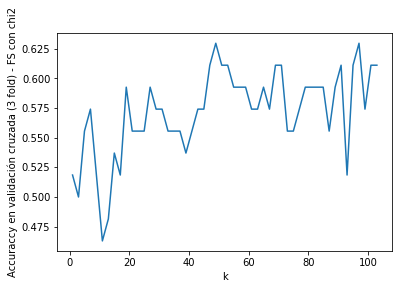

0.6111111111111112


In [ ]:
k_range = range(1, 105, 2)
scores3 = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_entrenamiento3, Y_entrenamiento3)
    scores3.append(knn.score(X_val3, Y_val3))
plt.plot(k_range, scores3)
plt.xlabel('k')
plt.ylabel('Accuraccy en validación cruzada (3 fold) - FS con chi2')
plt.show()
print(knn.score(X_val3, Y_val3))

In [ ]:

X_train_filt = X_std_train2[:,[3,4]]
X_test_filt = X_std_test2[:,[3,4]]


# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_filt, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 1e-08, 'penalty': 'l2'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.616


In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l2', C=1e-08)
modelo_rid_log=logridge.fit(X_train_filt, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_test_filt)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[ 9 14]
 [10  8]]
tn: 9, fp:14, fn:10, tp:8
Accuracy: 0.4146341463414634
                  precision    recall  f1-score   support

Paciente control       0.47      0.39      0.43        23
   Paciente caso       0.36      0.44      0.40        18

        accuracy                           0.41        41
       macro avg       0.42      0.42      0.41        41
    weighted avg       0.43      0.41      0.42        41

Sensibilidad: 0.4444444444444444


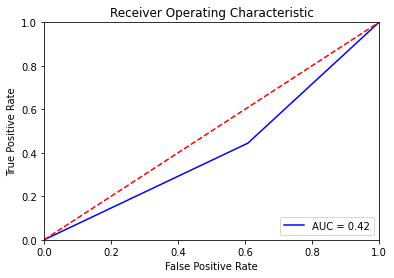

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4146341463414634
La matriz de confusión obtenida: [[ 9 14]
 [10  8]]
El valor de f1_score obtenido: 0.39999999999999997
El valor de recall es 0.4444444444444444


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_filt, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

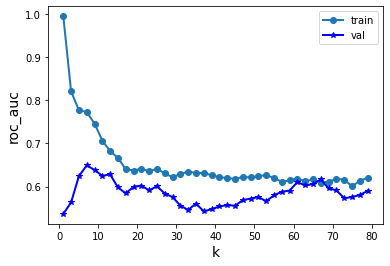

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.649
Valor correspondiente para el hiperparámetro: {'n_neighbors': 7}


In [ ]:
knn('roc_auc')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 7)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_train_filt, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_test_filt)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4146341463414634
La matriz de confusión obtenida: [[11 12]
 [12  6]]
El valor de f1_score obtenido: 0.3333333333333333
El valor de recall es 0.3333333333333333


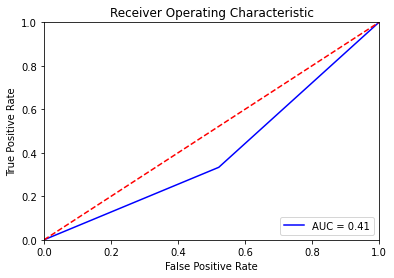

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4146341463414634
La matriz de confusión obtenida: [[11 12]
 [12  6]]
El valor de f1_score obtenido: 0.3333333333333333
El valor de recall es 0.3333333333333333


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,3)}
  profundidad_grid = np.array(range(1,3))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train_filt, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 2}


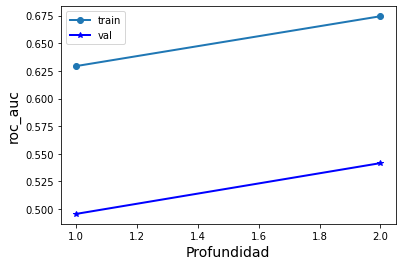

Mejor valor de la figura de mérito en validación cruzada: 0.542
Mejor valor del hiperparámetro: {'max_depth': 2}


In [ ]:
arbol('roc_auc')

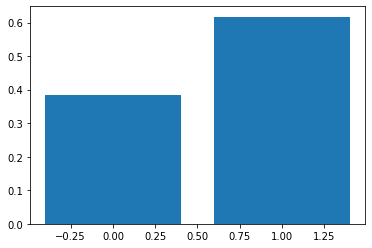

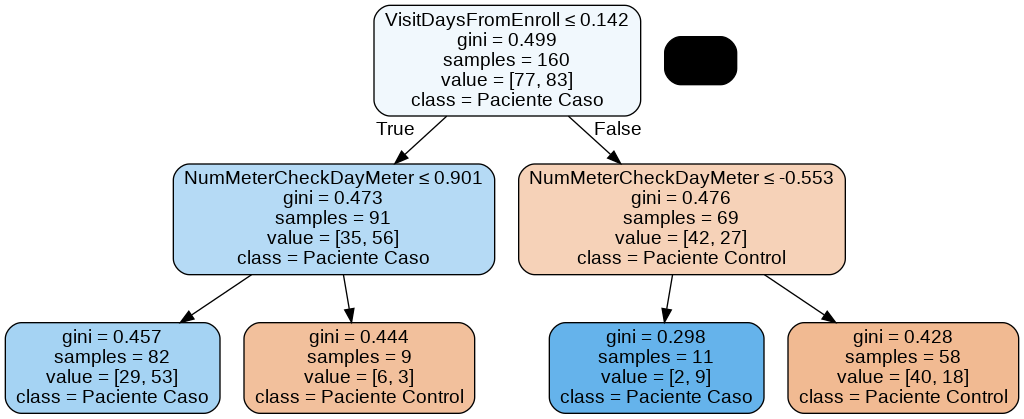

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=2)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train_filt, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test_filt)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[[1,2]],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de precisión obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de sensibilidad es", recall_score(Y_test, y_output_arbol))

El valor de precisión obtenido: 0.4146341463414634
La matriz de confusión obtenida: [[ 8 15]
 [ 9  9]]
El valor de f1_score obtenido: 0.42857142857142855
El valor de sensibilidad es 0.5


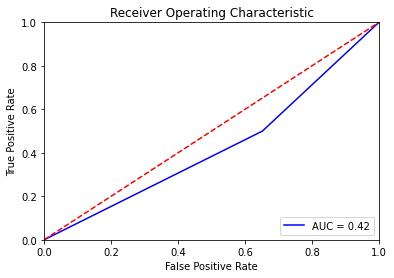

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4146341463414634
La matriz de confusión obtenida: [[ 8 15]
 [ 9  9]]
El valor de f1_score obtenido: 0.42857142857142855
El valor de recall es 0.5


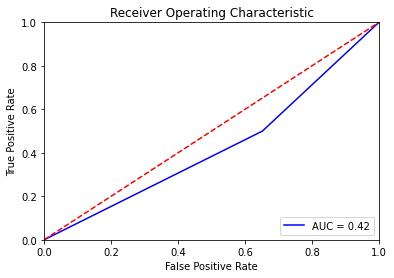

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_train_filt, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 10, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.626


In [ ]:


svc=SVC(C=10,kernel='poly',gamma=0.01,decision_function_shape='ovo')
svc.fit(X_train_filt,Y_train)
y_test_pred=svc.predict(X_test_filt)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[ 0 23]
 [ 0 18]]
El valor de f1_score obtenido: 0.6101694915254238
El valor de recall es 1.0


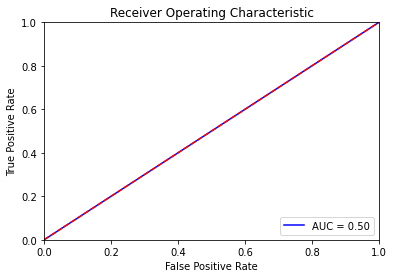

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Métodos wrapper con k-nn**

Con respecto al valor de k, elegiremos k=3, ya que es el valor obtenido al principio del proyecto con validación que nos daba mejores valores de figura de mérito.

# Sequential Forward Selection

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.neighbors import KNeighborsClassifier

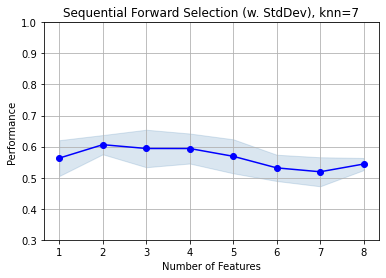

feature_idx  \
1                      (4,)   
2                    (1, 4)   
3                 (1, 4, 5)   
4              (1, 4, 5, 6)   
5           (1, 4, 5, 6, 7)   
6        (0, 1, 4, 5, 6, 7)   
7     (0, 1, 3, 4, 5, 6, 7)   
8  (0, 1, 2, 3, 4, 5, 6, 7)   

                                           cv_scores avg_score  \
1  [0.48148148148148145, 0.6037735849056604, 0.60...   0.56301   
2  [0.6111111111111112, 0.5660377358490566, 0.641...  0.606219   
3  [0.5555555555555556, 0.5471698113207547, 0.679...   0.59399   
4  [0.5740740740740741, 0.5471698113207547, 0.660...  0.593874   
5  [0.5555555555555556, 0.5094339622641509, 0.641...  0.568833   
6  [0.48148148148148145, 0.5283018867924528, 0.58...  0.531563   
7  [0.48148148148148145, 0.49056603773584906, 0.5...  0.518984   
8  [0.5185185185185185, 0.5471698113207547, 0.566...  0.543909   

              feature_names  ci_bound   std_dev   std_err  
1                      (4,)  0.129729  0.057649  0.040764  
2                    (1, 4)  0.069771  0.031005  0.021924  
3                 (1, 4, 5)  0.135878  0.060382  0.042696  
4              (1, 4, 5, 6)   0.10867  0.048291  0.034147  
5           (1, 4, 5, 6, 7)  0.123162  0.054731  0.038701  
6        (0, 1, 4, 5, 6, 7)  0.095157  0.042286    0.0299  
7     (0, 1, 3, 4, 5, 6, 7)  0.105227  0.046761  0.033065  
8  (0, 1, 2, 3, 4, 5, 6, 7)  0.043963  0.019536  0.013814

In [ ]:
valor_k = 7
knn = KNeighborsClassifier(n_neighbors=valor_k)
sfs = SFS(knn, 
           k_features=8, #Queremos llegar a 30 caracteristicas
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=3)

sfs = sfs.fit(X_std_train2, Y_train)

# Representar los resultados
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim([0.3, 1])
plt.title('Sequential Forward Selection (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sfs.get_metric_dict()).T


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# Según SFS, escogería f0, f1, f5 y f7 
X_train_norm_SFS = X_std_train2[:,[1,4]]
X_test_norm_SFS = X_std_test2[:,[1,4]]


# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_norm_SFS, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.601


In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l1', C=10)
modelo_rid_log=logridge.fit(X_train_norm_SFS, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_test_norm_SFS)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[ 8 15]
 [ 6 12]]
tn: 8, fp:15, fn:6, tp:12
Accuracy: 0.4878048780487805
                  precision    recall  f1-score   support

Paciente control       0.57      0.35      0.43        23
   Paciente caso       0.44      0.67      0.53        18

        accuracy                           0.49        41
       macro avg       0.51      0.51      0.48        41
    weighted avg       0.52      0.49      0.48        41

Sensibilidad: 0.6666666666666666


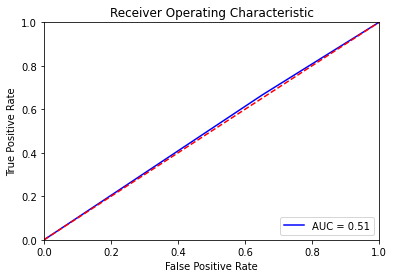

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4878048780487805
La matriz de confusión obtenida: [[ 8 15]
 [ 6 12]]
El valor de f1_score obtenido: 0.5333333333333333
El valor de recall es 0.6666666666666666


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_norm_SFS, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

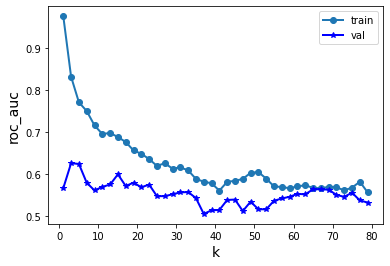

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.626
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}


In [ ]:
knn('roc_auc')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 3)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_train_norm_SFS, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_test_norm_SFS)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4878048780487805
La matriz de confusión obtenida: [[ 9 14]
 [ 7 11]]
El valor de f1_score obtenido: 0.5116279069767442
El valor de recall es 0.6111111111111112


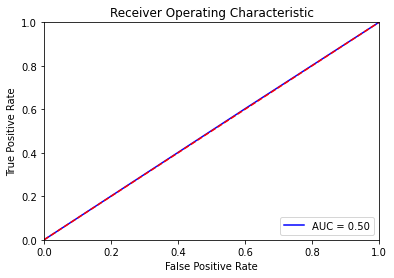

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4878048780487805
La matriz de confusión obtenida: [[ 9 14]
 [ 7 11]]
El valor de f1_score obtenido: 0.5116279069767442
El valor de recall es 0.6111111111111112


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,3)}
  profundidad_grid = np.array(range(1,3))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train_norm_SFS, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 2}


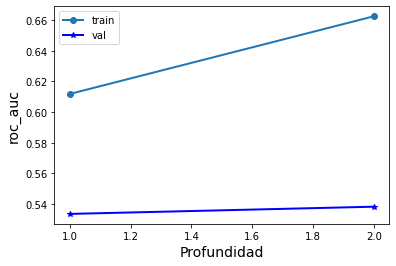

Mejor valor de la figura de mérito en validación cruzada: 0.538
Mejor valor del hiperparámetro: {'max_depth': 2}


In [ ]:
arbol('roc_auc')

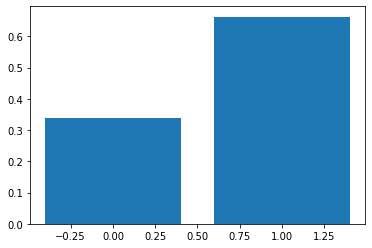

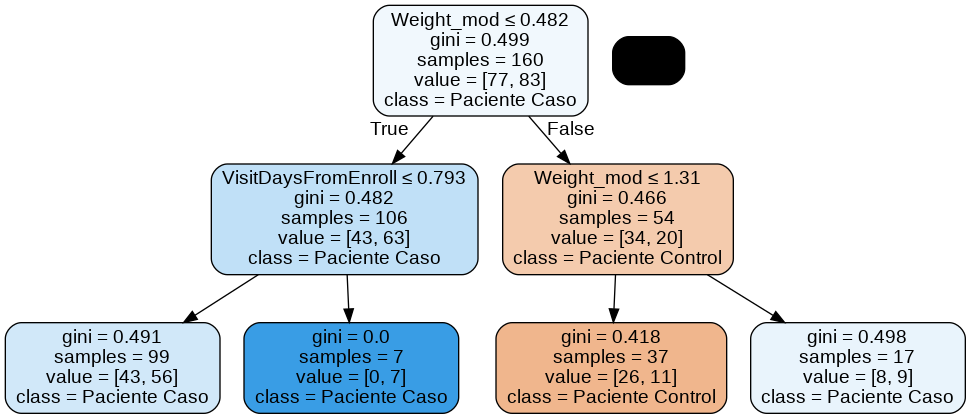

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=2)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train_norm_SFS, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test_norm_SFS)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[[1,4]],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de precisión obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de sensibilidad es", recall_score(Y_test, y_output_arbol))

El valor de precisión obtenido: 0.5121951219512195
La matriz de confusión obtenida: [[ 6 17]
 [ 3 15]]
El valor de f1_score obtenido: 0.6
El valor de sensibilidad es 0.8333333333333334


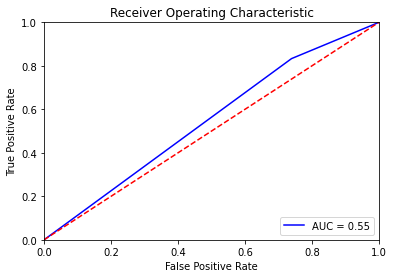

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5121951219512195
La matriz de confusión obtenida: [[ 6 17]
 [ 3 15]]
El valor de f1_score obtenido: 0.6
El valor de recall es 0.8333333333333334


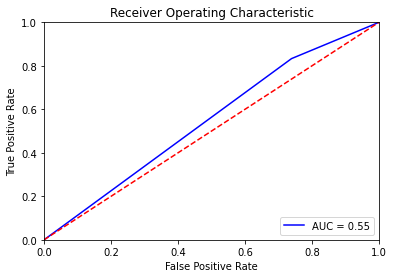

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_train_norm_SFS, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.621


In [ ]:


svc=SVC(C=0.001,kernel='poly',gamma=0.01,decision_function_shape='ovo')
svc.fit(X_train_norm_SFS,Y_train)
y_test_pred=svc.predict(X_test_norm_SFS)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[ 0 23]
 [ 0 18]]
El valor de f1_score obtenido: 0.6101694915254238
El valor de recall es 1.0


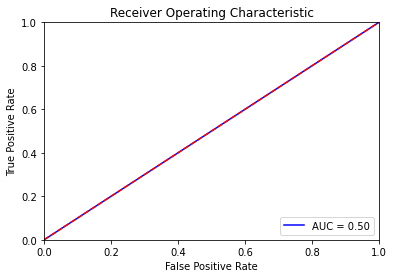

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# Sequential Backward Elimination

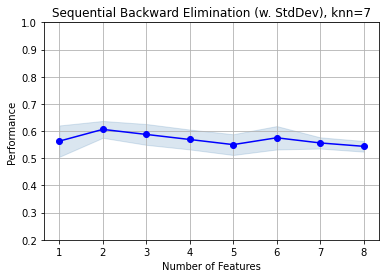

feature_idx  \
8  (0, 1, 2, 3, 4, 5, 6, 7)   
7     (0, 1, 2, 3, 4, 6, 7)   
6        (0, 1, 2, 3, 4, 6)   
5           (0, 1, 3, 4, 6)   
4              (0, 1, 4, 6)   
3                 (1, 4, 6)   
2                    (1, 4)   
1                      (4,)   

                                           cv_scores avg_score  \
8  [0.5185185185185185, 0.5471698113207547, 0.566...  0.543909   
7  [0.5370370370370371, 0.5471698113207547, 0.584...  0.556371   
6  [0.5185185185185185, 0.5849056603773585, 0.622...  0.575355   
5  [0.5185185185185185, 0.5283018867924528, 0.603...  0.550198   
4  [0.5185185185185185, 0.6037735849056604, 0.584...  0.569066   
3  [0.5555555555555556, 0.5660377358490566, 0.641...  0.587701   
2  [0.6111111111111112, 0.5660377358490566, 0.641...  0.606219   
1  [0.48148148148148145, 0.6037735849056604, 0.60...   0.56301   

              feature_names  ci_bound   std_dev   std_err  
8  (0, 1, 2, 3, 4, 5, 6, 7)  0.043963  0.019536  0.013814  
7     (0, 1, 2, 3, 4, 6, 7)   0.04635  0.020597  0.014564  
6        (0, 1, 2, 3, 4, 6)  0.096857  0.043041  0.030435  
5           (0, 1, 3, 4, 6)  0.085723  0.038094  0.026936  
4              (0, 1, 4, 6)  0.082279  0.036563  0.025854  
3                 (1, 4, 6)  0.086161  0.038288  0.027074  
2                    (1, 4)  0.069771  0.031005  0.021924  
1                      (4,)  0.129729  0.057649  0.040764

In [ ]:
# Sequential Backward Selection
valor_k = 7
knn = KNeighborsClassifier(n_neighbors=valor_k)

sbs = SFS(knn, 
          k_features=1, 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=3)
sbs = sbs.fit(X_std_train2, Y_train)



# Plotting the results
fig4 = plot_sfs(sbs.get_metric_dict(), kind='std_dev')
plt.ylim([0.2, 1])
plt.title('Sequential Backward Elimination (w. StdDev), knn=' + str(valor_k))
plt.grid()
plt.show()

pd.DataFrame.from_dict(sbs.get_metric_dict()).T

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

# Según SFS, escogería f0, f1, f5 y f7 
X_train_SFS = X_std_train2[:,[1,4]]
X_test_SFS = X_std_test2[:,[1,4]]


# ***Regresión logística con regularización***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

logreg= LogisticRegression(solver='liblinear')
parameters = {"C":[1e-8,1e-4,10,100],"penalty":["l1","l2"]}# l1 lasso l2 ridge
valor_C=np.array([1e-8,1e-4,10,100])
log_regression=GridSearchCV(logreg, parameters, scoring='roc_auc', cv=5, return_train_score=True)

log_regression.fit(X_train_SFS, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(log_regression.cv_results_['mean_train_score']) 
roc_loc_val = np.array(log_regression.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(log_regression.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(log_regression.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 10, 'penalty': 'l1'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.601


In [ ]:
from sklearn.linear_model import Lasso

logridge=LogisticRegression(solver='liblinear', penalty='l1', C=10)
modelo_rid_log=logridge.fit(X_train_SFS, Y_train)

# Obtenemos la salida predicha
y_pred_ridlog = modelo_rid_log.predict(X_test_SFS)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

#  Calculamos la matriz de confusión
cm = confusion_matrix(Y_test, y_pred_ridlog)
print(cm)

tn, fp, fn, tp = confusion_matrix(Y_test, y_pred_ridlog).ravel()
print(f'tn: {tn}, fp:{fp}, fn:{fn}, tp:{tp}')

# Calcumos accuracy_score
Accuracy=accuracy_score(Y_test, y_pred_ridlog)
print(f'Accuracy: {Accuracy}')

target_names = ['Paciente control', 'Paciente caso']
print(classification_report(Y_test, y_pred_ridlog, target_names=target_names))
              
#Sensibilidad
Sensibilidad_3 = recall_score(Y_test, y_pred_ridlog)
# S_results.append(Sensibilidad_3)
print(f'Sensibilidad: {Sensibilidad_3}')

[[ 8 15]
 [ 6 12]]
tn: 8, fp:15, fn:6, tp:12
Accuracy: 0.4878048780487805
                  precision    recall  f1-score   support

Paciente control       0.57      0.35      0.43        23
   Paciente caso       0.44      0.67      0.53        18

        accuracy                           0.49        41
       macro avg       0.51      0.51      0.48        41
    weighted avg       0.52      0.49      0.48        41

Sensibilidad: 0.6666666666666666


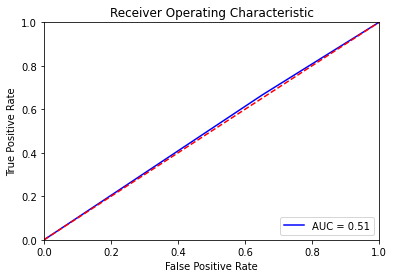

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_pred_ridlog)
f11_score = f1_score(Y_test, y_pred_ridlog)
r1_score = recall_score(Y_test, y_pred_ridlog)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_ridlog)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_pred_ridlog))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4878048780487805
La matriz de confusión obtenida: [[ 8 15]
 [ 6 12]]
El valor de f1_score obtenido: 0.5333333333333333
El valor de recall es 0.6666666666666666


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# **Knn por votación**

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
#from mlxtend.plotting import plot_learning_curves

In [ ]:
def knn (figura):
  # 5. Selección del hiper-parámetro haciendo uso del conjunto de diseño con características estandarizadas. 

  param_grid = {'n_neighbors': range(1,81,2)}
  k_grid = np.array(range(1,81,2))
  grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  grid_knn.fit(X_train_SFS, Y_train) 

  #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
  
  auc_knn_all_train = np.array(grid_knn.cv_results_['mean_train_score'])
  auc_knn_all_val = np.array(grid_knn.cv_results_['mean_test_score'])


  plt.plot(k_grid,auc_knn_all_train,'-o',label="train", linewidth=2)
  plt.plot(k_grid,auc_knn_all_val,'-*b',label="val", linewidth=2)
  plt.xlabel('k',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(grid_knn.best_score_))
  print("Valor correspondiente para el hiperparámetro: {}".format(grid_knn.best_params_))

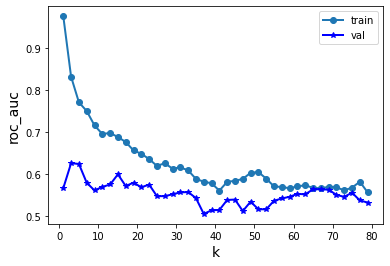

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.626
Valor correspondiente para el hiperparámetro: {'n_neighbors': 3}


In [ ]:
knn('roc_auc')

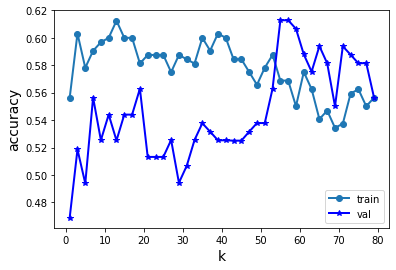

Mayor valor de la figura de mérito en validación con características estandarizadas: 0.613
Valor correspondiente para el hiperparámetro: {'n_neighbors': 55}


In [ ]:
knn('accuracy')

In [ ]:
kNN_clasif_all = KNeighborsClassifier(n_neighbors = 3)
modelo_knn_clasif2 = kNN_clasif_all.fit(X_train_SFS, Y_train) 
y_output_knn2 = modelo_knn_clasif2.predict(X_test_SFS)
A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4878048780487805
La matriz de confusión obtenida: [[ 9 14]
 [ 7 11]]
El valor de f1_score obtenido: 0.5116279069767442
El valor de recall es 0.6111111111111112


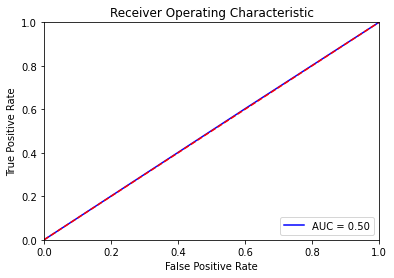

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

A1_score = accuracy_score(Y_test, y_output_knn2)
f11_score = f1_score(Y_test, y_output_knn2)
r1_score = recall_score(Y_test, y_output_knn2)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_knn2)
roc_auc_1 = metrics.auc(fpr, tpr)
print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_knn2))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.4878048780487805
La matriz de confusión obtenida: [[ 9 14]
 [ 7 11]]
El valor de f1_score obtenido: 0.5116279069767442
El valor de recall es 0.6111111111111112


In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***ÁRBOLES***

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def arbol(figura):
  # 1. Selección de hiper-parámetros del árbol. En principio, consideraremos sólo la profundidad máxima
  param_grid = {'max_depth': range(1,3)}
  profundidad_grid = np.array(range(1,3))


  grid_arbol_clasif = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid = param_grid, scoring = figura, cv=3, return_train_score=True)
  modelo_arbol_clasif = grid_arbol_clasif.fit(X_train_SFS, Y_train)
  print(grid_arbol_clasif.best_params_)

  perf_train_arbol = np.array(grid_arbol_clasif.cv_results_['mean_train_score'])
  perf_val_arbol = np.array(grid_arbol_clasif.cv_results_['mean_test_score'])

  plt.plot(profundidad_grid,perf_train_arbol,'-o',label="train", linewidth=2)
  plt.plot(profundidad_grid,perf_val_arbol,'-*b',label="val", linewidth=2)
  plt.xlabel('Profundidad',fontsize=14)
  plt.ylabel(figura,fontsize=14)
  plt.legend()
  plt.show()

  print("Mejor valor de la figura de mérito en validación cruzada: {:.3f}".format(grid_arbol_clasif.best_score_))
  print("Mejor valor del hiperparámetro: {}".format(grid_arbol_clasif.best_params_))


{'max_depth': 2}


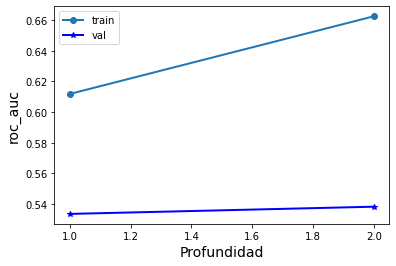

Mejor valor de la figura de mérito en validación cruzada: 0.538
Mejor valor del hiperparámetro: {'max_depth': 2}


In [ ]:
arbol('roc_auc')

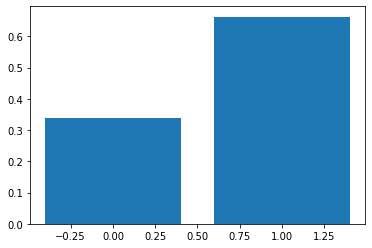

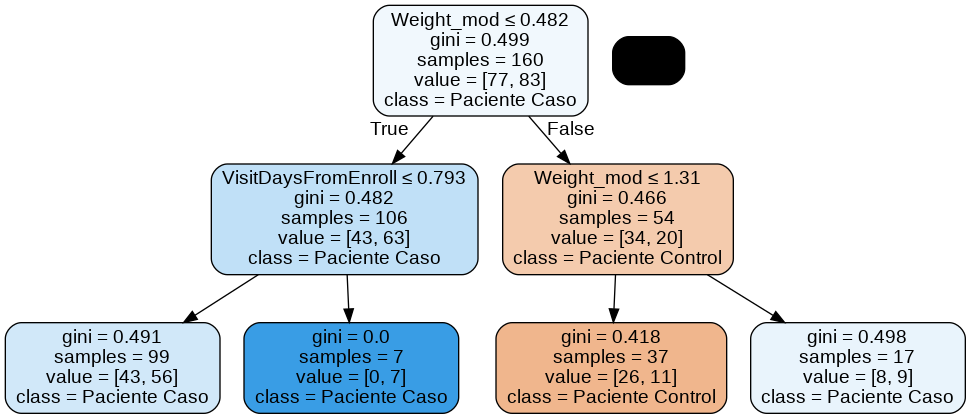

In [ ]:
# 4. Se representa la importancia de cada característica para el árbol diseñado
from matplotlib import pyplot
Arbol_clasif_all = DecisionTreeClassifier(max_depth=2)
modelo_arbol_clasif = Arbol_clasif_all.fit(X_train_SFS, Y_train)
y_output_arbol = modelo_arbol_clasif.predict(X_test_SFS)
importance_arbol = modelo_arbol_clasif.feature_importances_
pyplot.bar([x for x in range(len(importance_arbol))], importance_arbol)
pyplot.show()

# 5. Se representa gráficamente el modelo de clasificación
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()

export_graphviz(modelo_arbol_clasif, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data.columns[[1,4]],class_names=['Paciente Control','Paciente Caso'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Tree_Clasif_all.png')
Image(graph.create_png())

In [ ]:
print("El valor de precisión obtenido:", accuracy_score(Y_test, y_output_arbol))
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f1_score(Y_test, y_output_arbol))
print("El valor de sensibilidad es", recall_score(Y_test, y_output_arbol))

El valor de precisión obtenido: 0.5121951219512195
La matriz de confusión obtenida: [[ 6 17]
 [ 3 15]]
El valor de f1_score obtenido: 0.6
El valor de sensibilidad es 0.8333333333333334


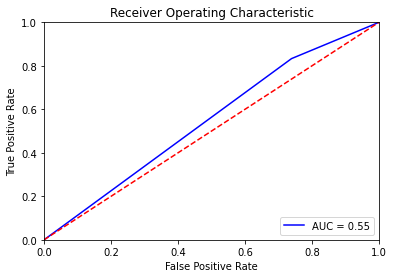

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
A1_score = accuracy_score(Y_test, y_output_arbol)
f11_score = f1_score(Y_test, y_output_arbol)
r1_score = recall_score(Y_test, y_output_arbol)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_output_arbol))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.5121951219512195
La matriz de confusión obtenida: [[ 6 17]
 [ 3 15]]
El valor de f1_score obtenido: 0.6
El valor de recall es 0.8333333333333334


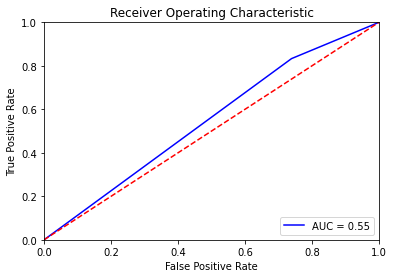

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_output_arbol)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

# ***SVC***

In [ ]:
# Regresión logística con regularización 
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection   
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

svc=SVC(decision_function_shape='ovo')

# logreg= LogisticRegression(solver='liblinear')
parameters = {'kernel': ['rbf','poly'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}# l1 lasso l2 ridge
# valor_C=np.array([1e-8,1e-4,1,10,100])
svc=GridSearchCV(svc, parameters, scoring='roc_auc', cv=5, return_train_score=True)

svc.fit(X_train_SFS, Y_train) #Entrenamos

# #Evaluamos las prestaciones para el conjunto de entrenamiento, de validación y representamos
roc_log_train = np.array(svc.cv_results_['mean_train_score']) 
roc_loc_val = np.array(svc.cv_results_['mean_test_score'])

# #Pintamos la evolución de nuestro modelo tanto en train como en validación para ver cuál es el mejor hiperparámetro para generalizar
# plt.plot(valor_C,roc_log_train,'-o',label="train", linewidth=2)
# plt.plot(valor_C,roc_loc_val,'-*b',label="val", linewidth=2)
# plt.xlabel('C',fontsize=14)
# plt.ylabel('Roc_auc',fontsize=14)
# plt.legend()
# plt.show()

# Mostramos el mejor valor del parámetro y el score
print("Valor correspondiente para el hiperparámetro: {}".format(svc.best_params_))
print("Mayor valor de la figura de mérito en validación con características estandarizadas: {:.3f}".format(svc.best_score_))


Valor correspondiente para el hiperparámetro: {'C': 0.001, 'gamma': 0.01, 'kernel': 'poly'}
Mayor valor de la figura de mérito en validación con características estandarizadas: 0.621


In [ ]:


svc=SVC(C=0.001,kernel='poly',gamma=0.01,decision_function_shape='ovo')
svc.fit(X_train_SFS,Y_train)
y_test_pred=svc.predict(X_test_SFS)

In [ ]:
A1_score = accuracy_score(Y_test, y_test_pred)
f11_score = f1_score(Y_test, y_test_pred)
r1_score = recall_score(Y_test, y_test_pred)

print("El valor de accuracy obtenido:", A1_score)
print("La matriz de confusión obtenida:", confusion_matrix(Y_test, y_test_pred))
print("El valor de f1_score obtenido:", f11_score)
print("El valor de recall es", r1_score)

El valor de accuracy obtenido: 0.43902439024390244
La matriz de confusión obtenida: [[ 0 23]
 [ 0 18]]
El valor de f1_score obtenido: 0.6101694915254238
El valor de recall es 1.0


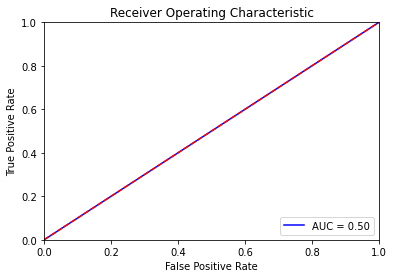

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_test_pred)
roc_auc_1 = metrics.auc(fpr, tpr)
# AUC_results.append(roc_auc_1)

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
res_accuracy.append(A1_score)
res_recall.append(r1_score)
res_f1.append(f11_score)
res_roc.append(roc_auc_1)

In [ ]:
results = pd.DataFrame()

results["Accuracy"]=res_accuracy
results["Recall"]=res_recall
results["F1-score"]=res_f1
results["Auc"]=res_roc

#results
results["Modelos"] = ["Regresión logística-árbol", "Knn-árbol","Árbol-arbol","SVC-árbol","Regresión logística-chi2", "Knn-chi2","Árbol-chi2","SVC-chi2","Regresión logística-SFS-knn", "Knn-SFS-knn","Árbol-SFS-knn","SVC-SFS-knn","Regresión logística-SBE-knn", "Knn-SBE-knn","Árbol-SBE-knn","SVC-SBE-knn"]
results.set_index("Modelos", inplace = True)

In [ ]:
results

Accuracy    Recall  F1-score       Auc
Modelos                                                            
Regresión logística-árbol    0.439024  0.500000  0.439024  0.445652
Knn-árbol                    0.512195  0.500000  0.473684  0.510870
Árbol-arbol                  0.463415  0.611111  0.500000  0.479469
SVC-árbol                    0.439024  1.000000  0.610169  0.500000
Regresión logística-chi2     0.414634  0.444444  0.400000  0.417874
Knn-chi2                     0.414634  0.333333  0.333333  0.405797
Árbol-chi2                   0.414634  0.500000  0.428571  0.423913
SVC-chi2                     0.439024  1.000000  0.610169  0.500000
Regresión logística-SFS-knn  0.487805  0.666667  0.533333  0.507246
Knn-SFS-knn                  0.487805  0.611111  0.511628  0.501208
Árbol-SFS-knn                0.512195  0.833333  0.600000  0.547101
SVC-SFS-knn                  0.439024  1.000000  0.610169  0.500000
Regresión logística-SBE-knn  0.487805  0.666667  0.533333  0.507246
Knn-SBE-knn                  0.487805  0.611111  0.511628  0.501208
Árbol-SBE-knn                0.512195  0.833333  0.600000  0.547101
SVC-SBE-knn                  0.439024  1.000000  0.610169  0.500000